# Introducción

En el presente práctico, se importa el dataset realizado en el práctico anterior, y se procede a la curación del mismo. Fundamentalmente, se hace un subset del mismo, filtrando sólo para Argentina y desde el año 1990 a 2018. Luego, se analiza de a un Feature por vez para analizar la presencia dee valores nulos, la distribución de la variable y la progresión temporal de sus valores. A continuación, se imputan los valores nulos mediante justificaciones metodológicas en cada caso. Finalmente, el dataset final es exportado en formato csv para futuros análisis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Setear el path de su drive personal donde se encuentran los datasets
# BASE_DIR = '/content/drive/My Drive/Mentoria/datasets/' # path de Nico
# BASE_DIR = '/content/drive/My Drive/Mentoria/datasets/' # path de Pablo
# BASE_DIR = '/content/drive/My Drive/DiploDatos/Mentoria/datasets/' # path de Matt

# Habilitar el siguiente path si se corre localmente
# BASE_DIR = '/data/'

In [ ]:
import pandas as pd
import numpy as np
#Visualización
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Parte I: Limpieza

In [ ]:
# Para que pandas no trunque aquellas celdas con contenido muy largo (como textos)
# pd.set_option('display.max_colwidth', -1)
# Para que pandas no trunque la vista de todas las columnas
pd.set_option('display.max_columns', None, "display.max_rows", 10)

In [ ]:
# Carga de tabla con todos los países, años y los 15 Features con menor proporción de valores nulos
full_dataset = pd.read_csv(BASE_DIR + 'full_dataset.csv')
df_ic = pd.read_csv(BASE_DIR + "df_ic.csv")

A continuación, se modificará el dataset importado del práctico anterior. Particularmente, se eliminan y se agregan otros Features de interés en gran parte de los Indicadors. Las razones para hacerlo en cada caso fueron algunas de las siguientes:

- El feature se encontraba repetido en más de un indicador. En estos casos, fue eliminado de uno de los Indicadores, y reemplazado con uno nuevo de interés.
- El feature tenía demasiados valores nulos. Este fue el caso del Feature con código "SI.POV.NAHC". En este caso, dado que es un Feature de Pobreza, no pudo ser reemplazado con otro ya que no existen más que los aquí analizados.
- El feature no tenía sentido de ser analizado. Este fue el caso para un par de Features de Ambiente (por ejemplo, Superficie de tierra totales, la cual obviamente no varía). En estos casos fueron reemplazados con nuevos Features.

In [ ]:
# Features a eliminar
to_del = {
    'Education': ['SE.SEC.DURS', 'SE.SEC.AGES', 'SE.PRM.DURS', 'SE.PRM.AGES', 'SL.TLF.TOTL.FE.ZS'],
    'Environment': ['AG.SRF.TOTL.K2', 'AG.LND.TOTL.K2'],
    'Gender': ['SE.PRM.ENRR.MA', 'SE.PRM.ENRR.FE', 'SE.PRM.ENRL.FE.ZS', 'SE.ENR.PRIM.FM.ZS'],
    'Health': ['SP.POP.1564.TO.ZS'],
    'Poverty': ['SI.POV.NAHC'],
    'Social_protection': [],
}

# Features a añadir
to_add = {
    'Education': ['SL.TLF.TOTL.FE.ZS', 'SL.TLF.TOTL.IN', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.FE.ZS', 'SE.PRM.CMPT.ZS'],
    'Environment': ['NY.GDP.PETR.RT.ZS', 'NY.GDP.NGAS.RT.ZS'],
    'Gender': ['SL.TLF.TOTL.FE.ZS', 'SL.FAM.WORK.FE.ZS', 'SL.EMP.1524.SP.FE.ZS', 'SL.AGR.EMPL.FE.ZS'],
    'Health': ['SP.DYN.CDRT.IN'],
    'Poverty': [],
    'Social_protection': [],
}

feat_15 = {}
for item in df_ic.Indi.unique():
    feat_15[item] = list(df_ic[df_ic.Indi == item].sort_values('sum_NA').head(15).ICod.unique())
    feat_15[item].extend(to_add[item])
    for jj in to_del[item]:
        feat_15[item].remove(jj)

In [ ]:
df_15_feat = pd.DataFrame()
for item in full_dataset.Indi.unique():
    df_15_feat = df_15_feat.append(full_dataset[(full_dataset.Indi == item) & (full_dataset.ICod.isin(feat_15[item]))], ignore_index = True)

In [ ]:
dataset = pd.melt(
    df_15_feat,
    id_vars = df_15_feat.columns[:5],
    value_vars= df_15_feat.columns[5:],
    var_name='Year',
    value_name='Value',
)
dataset['Year'] = dataset['Year'].astype('int')

In [ ]:
# Se filtra por Argentina y desde 1990 hasta 2018
data_ARG = dataset[(dataset.Year > 1989) & (dataset.Year < 2019) & (dataset.CCod == "ARG")]

In [ ]:
# Chequeamos por las dudas, si no hay features repetidos

# Features repetidos?
for ii in data_ARG.ICod.unique():
    indicators = data_ARG[data_ARG.ICod == ii].Indi.unique()
    if len(indicators) > 1:
        print(ii)
        print(indicators, "\n")
    else:
      print("- Feature único: ", ii)

- Feature único:  SP.POP.1564.TO.ZS
- Feature único:  SP.POP.0014.TO.ZS
- Feature único:  SL.UEM.TOTL.MA.ZS
- Feature único:  SL.UEM.TOTL.FE.ZS
- Feature único:  SL.TLF.TOTL.IN
- Feature único:  SE.SEC.ENRL.GC
- Feature único:  SE.SEC.ENRL
- Feature único:  SE.PRM.ENRR.MA
- Feature único:  SE.PRM.ENRR.FE
- Feature único:  SE.PRM.ENRR
- Feature único:  SE.PRM.ENRL.FE.ZS
- Feature único:  SE.PRM.ENRL
- Feature único:  SE.PRM.CMPT.ZS
- Feature único:  SE.PRE.ENRR
- Feature único:  SE.ENR.PRIM.FM.ZS
- Feature único:  SP.DYN.TO65.MA.ZS
- Feature único:  SP.DYN.TO65.FE.ZS
- Feature único:  SP.DYN.TFRT.IN
- Feature único:  SP.DYN.LE00.MA.IN
- Feature único:  SP.DYN.LE00.FE.IN
- Feature único:  SP.DYN.AMRT.MA
- Feature único:  SP.DYN.AMRT.FE
- Feature único:  SP.ADO.TFRT
- Feature único:  SL.TLF.TOTL.FE.ZS
- Feature único:  SL.FAM.WORK.FE.ZS
- Feature único:  SL.EMP.1524.SP.FE.ZS
- Feature único:  SL.AGR.EMPL.FE.ZS
- Feature único:  SE.SEC.ENRL.GC.FE.ZS
- Feature único:  SE.PRE.ENRR.MA
- Featu

A continuación, se muestran los Features a analizar:

In [ ]:
data_ARG.Feat.unique()

array(['Población entre 15 y 64 años de edad (% del total)',
       'Población entre 0 y 14 años de edad (% del total)',
       'Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)',
       'Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)',
       'Población activa, total',
       'Educación de nivel secundario, alumnos en programas de educación general',
       'Educación de nivel secundario, alumnos',
       'Inscripción escolar, nivel primario, varones (% bruto)',
       'Inscripción escolar, nivel primario, mujeres (% bruto)',
       'Inscripción escolar, nivel primario (% bruto)',
       'Educación de nivel primario, alumnos (% de mujeres)',
       'Educación de nivel primario, alumnos',
       'Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)',
       'Inscripción escolar, nivel preprimario (% bruto)',
       'Proporción de inscripciones de mujeres con respecto a varon

Una lectura detallada de los mismos indica que el análisis de todos ellos tienen sentido dentro del contexto argentino, por lo que, en principio, no habría una razón para eliminar alguno en particular.

# Parte II: Análisis y Curación

## 1. Detección y análisis de valores nulos

Para cada uno de los datasets resultantes del punto anterior responder a las siguientes preguntas:

* ¿Qué proporción de valores nulos presenta cada feature?
* ¿Los mismos se presentan aislados o agrupados por intervalos de tiempo?
* ¿Cómo es la distribución de valores nulos por columna (es decir, para cada año)?
* ¿La presencia de ciertos valores nulos podría estar justificada por algún contexto social-político-económico a nivel nacional, regional o global?.

Identificar los mismos de la manera más precisa posible.


### Proporción de valores nulos

A continuación, de los Features elegidos, se calcula la proporción de valores nulos en toda la línea temporal.

In [ ]:
# Se arma una lista con todos los features de Argentina, y la proporción de valores nulos de cada uno,
# ordenadas de mayor a menos
lista = []
for feat in dataset.Feat.unique():
 a= data_ARG[data_ARG.Feat == feat].Value.isnull().sum()/len(data_ARG[data_ARG.Feat == feat].Value)
 lista.append([feat, a])

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)
pd.DataFrame(lista).sort_values(1,ascending=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


0  \
27  Educación de nivel secundario, alumnos en programas de educación general (% de mujeres)                                        
5   Educación de nivel secundario, alumnos en programas de educación general                                                       
29  Inscripción escolar, nivel preprimario, mujeres (% bruto)                                                                      
28  Inscripción escolar, nivel preprimario, varones (% bruto)                                                                      
12  Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)                             
10  Educación de nivel primario, alumnos (% de mujeres)                                                                            
7   Inscripción escolar, nivel primario, varones (% bruto)                                                                         
8   Inscripción escolar, nivel primario, mujeres (% bruto)                                                                         
13  Inscripción escolar, nivel preprimario (% bruto)                                                                               
14  Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)                                     
6   Educación de nivel secundario, alumnos                                                                                         
9   Inscripción escolar, nivel primario (% bruto)                                                                                  
11  Educación de nivel primario, alumnos                                                                                           
75  Desempleo, varones (% de participación masculina en la fuerza laboral) (estimación nacional)                                   
76  Desempleo, mujeres (% de participación femenina en la fuerza laboral) (estimación nacional)                                    
74  Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)                                         
44  Tierras agrícolas (% del área de tierra)                                                                                       
72  Participación en el ingreso del tercer quintilo (20%) de la población en orden decreciente de remuneraciones                   
77  Tasa de participación en la fuerza laboral, total (% de la población total mayor de 15 años) (estimación nacional)             
43  Tierras cultivables (% del área de tierra)                                                                                     
73  Participación en el ingreso del segundo quintilo (20%) de la población en orden decreciente de remuneraciones                  
66  Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)                                
71  Participación en el ingreso del cuarto quintilo (20%) de la población en orden decreciente de remuneraciones                   
70  Participación en el ingreso del 20% mejor remunerado de la población                                                           
69  Participación en el ingreso del 10% mejor remunerado de la población                                                           
68  Participación en el ingreso del 10% peor remunerado de la población                                                            
67  Participación en el ingreso del 20% peor remunerado de la población                                                            
41  Producción pesquera total (toneladas métricas)                                                                                 
65  Brecha de pobreza a $1,90 por día (2011 PPA) (%)                                                                               
64  Índice de Gini                                                                                                                 
63  Poverty headcount ratio at $3.2

### Mapas de calor

Para estudiar la distribución de los valores nulos de cada Feature a través de los años, realizamos mapas de calor. Los mismos describen la presencia o ausencia de valor nulo para cada Feature (cada fila del gráfico) por año. El color rojo indica presencia de dato nulo, y el azul indica presencia de dato. Para una visualización más cómoda, realizamos un mapa de calor por Indicador.

In [ ]:
#Función para realizar los gráficos por Indicador. El gráfico es un mapa de calor que representa la proporción de NA de cada Feature para cada año. 
def plot_indicator_heatmap(indicator, figsize):
    f = plt.figure(figsize=figsize)
    ax = f.add_subplot(111)
    ax.yaxis.tick_right()
    sns.heatmap(data = data_ARG[data_ARG.Indi == indicator].pivot(index='Feat', columns='Year', values='Value').transform(lambda x: x.isnull()),linewidths=.5, vmin=0, vmax=1, cmap="coolwarm", cbar=False)
    plt.title('Distribución de valores nulos por año para los Features del indicador '+indicator+'\n')
    plt.xlabel("\nAños")
    plt.ylabel("")
    plt.xticks(rotation=45)

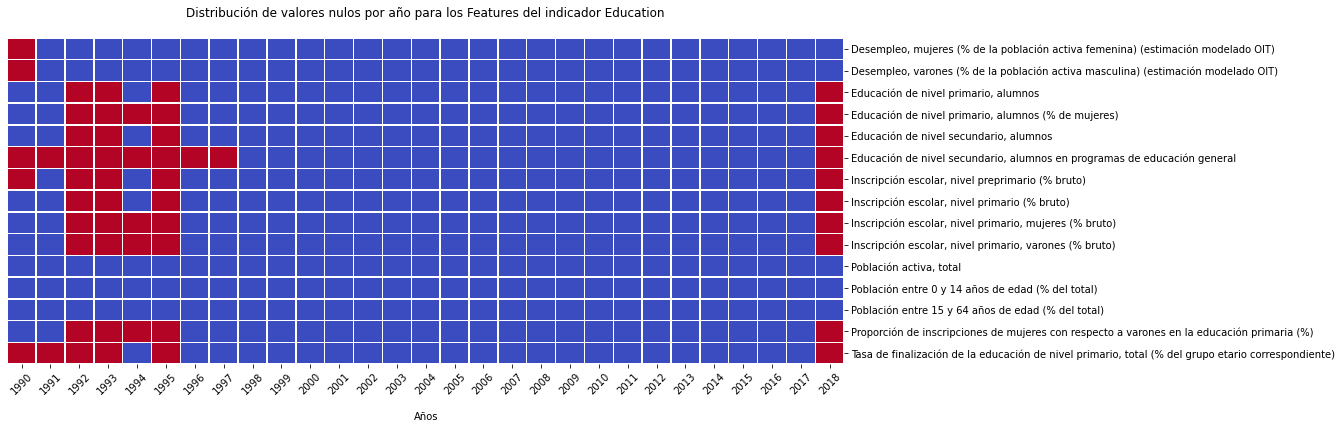

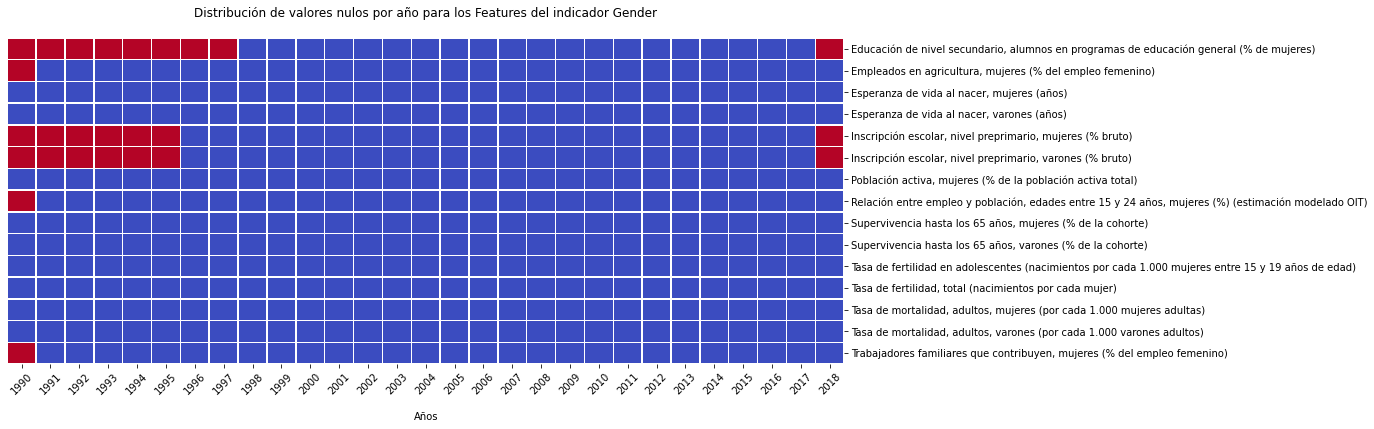

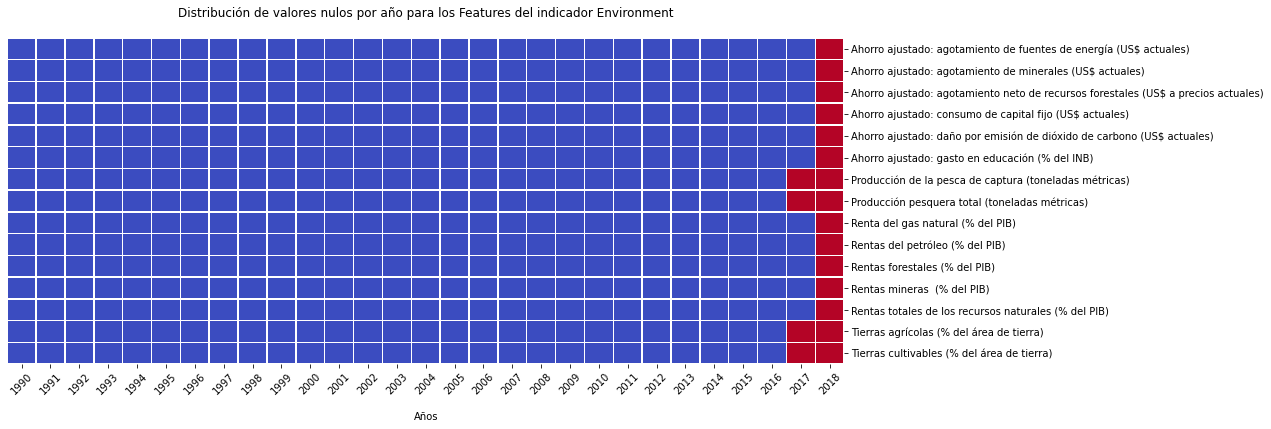

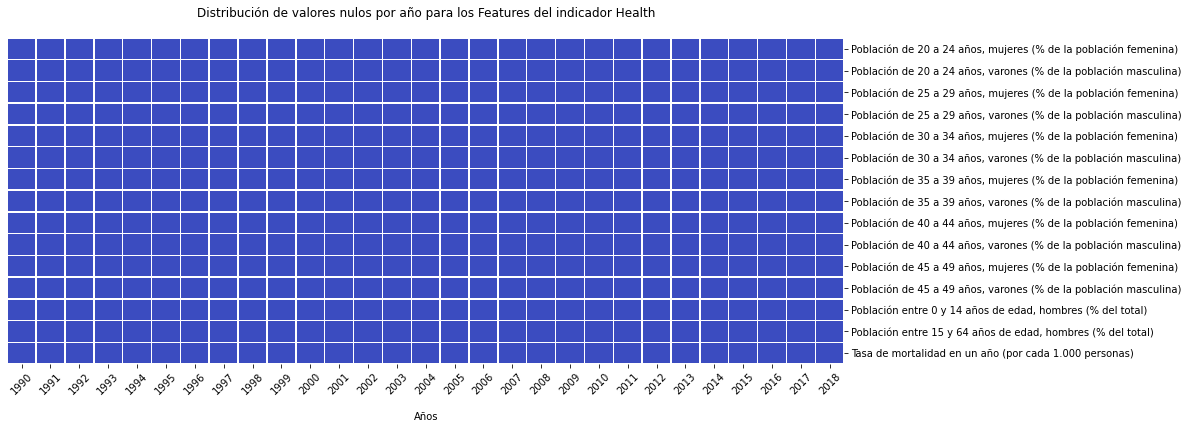

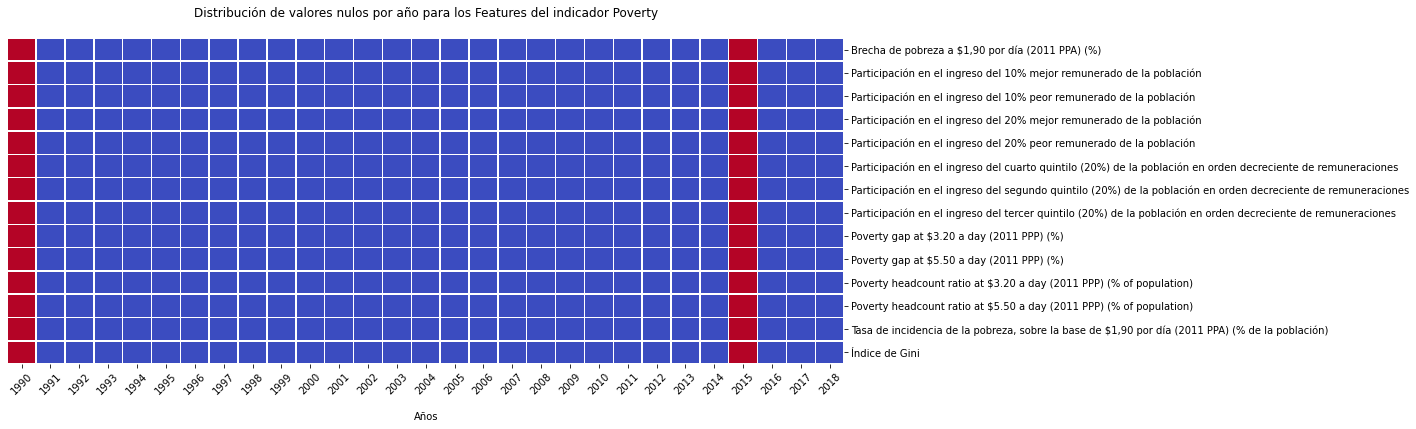

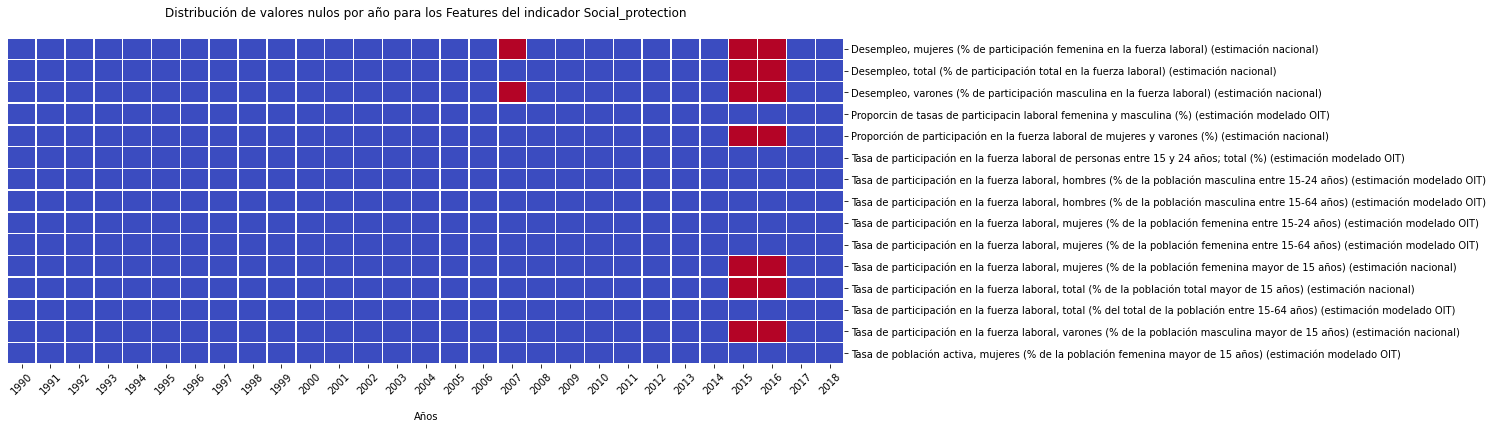

In [ ]:
for ind in data_ARG.Indi.unique():
 plot_indicator_heatmap(ind,(15,6))

Se pueden distinguir los siguientes patrones:
*  Presencia de valores nulos para varios Features de Educación y Género entre los años 1990 y 1996, aproximadamente. Estos años coinciden con la presidencia de Carlos Menem.
*  Presencia de valores nulos para prácticamente todos los Features de todos los Indicadores en el año 2019, y 2018 en algunos casos. Esto puede deberse a una demora en la carga de los últimos datos.
*  Para los indicadores de Pobreza y Protección social, se observan valores nulos en gran parte de los Features en los años 2015-2016. Esto puede deberse a que esos años se corresponden con un cambio de gobierno. El gobierno previo al año 2015 fue particularmente muy criticado por la forma de cálculo de las estadísticas referidas a Pobreza (a través del INDEC). La falta de datos para esos años puede entonces deberse a que el nuevo gobierno consideró poco realistas las cifras obtenidas para esos años.
*  Particularmente, el Feature "Tasa de incidencia de la pobreza, sobre la base de la línea de pobreza nacional (% de la población)" del indicador Pobreza, se observa que prácticamente la mayoría de los años presenta valores nulos. Corresponderá entonces eliminar dicho Feature para los análisis futuros.

## 2. Cálculo de estadísticos y distribuciones


#### a) Obtener la media, mediana, moda, desviación estándar, varianza, valor máximo y mínimo, percentiles y cualquier otro estadístico que les resulte importante de cada uno de los features de cada Indicador.

In [ ]:
def describir(indicator):
  df = data_ARG[data_ARG.Indi == indicator].pivot(index='Feat', columns='Year', values='Value')
  df = df.apply(pd.DataFrame.describe, axis=1)
  return df

##### Género

In [ ]:
describir("Gender")

count  \
Feat                                                                                                         
Educación de nivel secundario, alumnos en programas de educación general (% de mujeres)              20.0    
Empleados en agricultura, mujeres (% del empleo femenino)                                            28.0    
Esperanza de vida al nacer, mujeres (años)                                                           29.0    
Esperanza de vida al nacer, varones (años)                                                           29.0    
Inscripción escolar, nivel preprimario, mujeres (% bruto)                                            22.0    
Inscripción escolar, nivel preprimario, varones (% bruto)                                            22.0    
Población activa, mujeres (% de la población activa total)                                           29.0    
Relación entre empleo y población, edades entre 15 y 24 años, mujeres (%) (estimación modelado OIT)  28.0    
Supervivencia hasta los 65 años, mujeres (% de la cohorte)                                           29.0    
Supervivencia hasta los 65 años, varones (% de la cohorte)                                           29.0    
Tasa de fertilidad en adolescentes (nacimientos por cada 1.000 mujeres entre 15 y 19 años de edad)   29.0    
Tasa de fertilidad, total (nacimientos por cada mujer)                                               29.0    
Tasa de mortalidad, adultos, mujeres (por cada 1.000 mujeres adultas)                                29.0    
Tasa de mortalidad, adultos, varones (por cada 1.000 varones adultos)                                29.0    
Trabajadores familiares que contribuyen, mujeres (% del empleo femenino)                             28.0    

                                                                                                           mean  \
Feat                                                                                                              
Educación de nivel secundario, alumnos en programas de educación general (% de mujeres)              51.238615    
Empleados en agricultura, mujeres (% del empleo femenino)                                            0.327643     
Esperanza de vida al nacer, mujeres (años)                                                           77.609103    
Esperanza de vida al nacer, varones (años)                                                           70.761862    
Inscripción escolar, nivel preprimario, mujeres (% bruto)                                            65.336251    
Inscripción escolar, nivel preprimario, varones (% bruto)                                            64.154092    
Población activa, mujeres (% de la población activa total)                                           41.562969    
Relación entre empleo y población, edades entre 15 y 24 años, mujeres (%) (estimación modelado OIT)  25.043250    
Supervivencia hasta los 65 años, mujeres (% de la cohorte)                                           84.614979    
Supervivencia hasta los 65 años, varones (% de la cohorte)                                           72.767556    
Tasa de fertilidad en adolescentes (nacimientos por cada 1.000 mujeres entre 15 y 19 años de edad)   66.221152    
Tasa de fertilidad, total (nacimientos por cada mujer)                                               2.519724     
Tasa de mortalidad, adultos, mujeres (por cada 1.000 mujeres adultas)                                93.367000    
Tasa de mortalidad, adultos, varones (por cada 1.000 varones adultos)                                173.944069   
Trabajadores familiares que contribuyen, mujeres (% del empleo femenino)                             1.617250     

                                                                                                           std  \
Feat                                                                                                             
Educación de nivel secundario, alumnos en prog

##### Educación

In [ ]:
describir("Education")

count  \
Feat                                                                                                        
Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)                    28.0    
Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)                   28.0    
Educación de nivel primario, alumnos                                                                25.0    
Educación de nivel primario, alumnos (% de mujeres)                                                 24.0    
Educación de nivel secundario, alumnos                                                              25.0    
Educación de nivel secundario, alumnos en programas de educación general                            20.0    
Inscripción escolar, nivel preprimario (% bruto)                                                    24.0    
Inscripción escolar, nivel primario (% bruto)                                                       25.0    
Inscripción escolar, nivel primario, mujeres (% bruto)                                              24.0    
Inscripción escolar, nivel primario, varones (% bruto)                                              24.0    
Población activa, total                                                                             29.0    
Población entre 0 y 14 años de edad (% del total)                                                   29.0    
Población entre 15 y 64 años de edad (% del total)                                                  29.0    
Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)          24.0    
Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)  23.0    

                                                                                                            mean  \
Feat                                                                                                               
Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)                    1.250907e+01   
Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)                   9.932536e+00   
Educación de nivel primario, alumnos                                                                4.921440e+06   
Educación de nivel primario, alumnos (% de mujeres)                                                 4.901454e+01   
Educación de nivel secundario, alumnos                                                              3.729409e+06   
Educación de nivel secundario, alumnos en programas de educación general                            4.046372e+06   
Inscripción escolar, nivel preprimario (% bruto)                                                    6.335214e+01   
Inscripción escolar, nivel primario (% bruto)                                                       1.135358e+02   
Inscripción escolar, nivel primario, mujeres (% bruto)                                              1.131869e+02   
Inscripción escolar, nivel primario, varones (% bruto)                                              1.140850e+02   
Población activa, total                                                                             1.706123e+07   
Población entre 0 y 14 años de edad (% del total)                                                   2.758016e+01   
Población entre 15 y 64 años de edad (% del total)                                                  6.247949e+01   
Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)          9.921071e-01   
Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)  9.953488e+01   

                                                                                                             std  \
Feat                                                                                                               
Desempleo, mujeres (% de la población act

##### Pobreza

In [ ]:
describir("Poverty")

count  \
Feat                                                                                                                   
Brecha de pobreza a $1,90 por día (2011 PPA) (%)                                                               27.0    
Participación en el ingreso del 10% mejor remunerado de la población                                           27.0    
Participación en el ingreso del 10% peor remunerado de la población                                            27.0    
Participación en el ingreso del 20% mejor remunerado de la población                                           27.0    
Participación en el ingreso del 20% peor remunerado de la población                                            27.0    
Participación en el ingreso del cuarto quintilo (20%) de la población en orden decreciente de remuneraciones   27.0    
Participación en el ingreso del segundo quintilo (20%) de la población en orden decreciente de remuneraciones  27.0    
Participación en el ingreso del tercer quintilo (20%) de la población en orden decreciente de remuneraciones   27.0    
Poverty gap at $3.20 a day (2011 PPP) (%)                                                                      27.0    
Poverty gap at $5.50 a day (2011 PPP) (%)                                                                      27.0    
Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)                                            27.0    
Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)                                            27.0    
Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)                27.0    
Índice de Gini                                                                                                 27.0    

                                                                                                                    mean  \
Feat                                                                                                                       
Brecha de pobreza a $1,90 por día (2011 PPA) (%)                                                               1.618519    
Participación en el ingreso del 10% mejor remunerado de la población                                           34.192593   
Participación en el ingreso del 10% peor remunerado de la población                                            1.344444    
Participación en el ingreso del 20% mejor remunerado de la población                                           51.144444   
Participación en el ingreso del 20% peor remunerado de la población                                            4.059259    
Participación en el ingreso del cuarto quintilo (20%) de la población en orden decreciente de remuneraciones   22.055556   
Participación en el ingreso del segundo quintilo (20%) de la población en orden decreciente de remuneraciones  8.751852    
Participación en el ingreso del tercer quintilo (20%) de la población en orden decreciente de remuneraciones   14.000000   
Poverty gap at $3.20 a day (2011 PPP) (%)                                                                      3.185185    
Poverty gap at $5.50 a day (2011 PPP) (%)                                                                      7.125926    
Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)                                            7.792593    
Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)                                            17.896296   
Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)                3.455556    
Índice de Gini                                                                                                 46.507407   

                                                                                                                    std  \
Feat                                                                              

##### Ambiente

In [ ]:
describir("Environment")

count  \
Feat                                                                                       
Ahorro ajustado: agotamiento de fuentes de energía (US$ actuales)                  28.0    
Ahorro ajustado: agotamiento de minerales (US$ actuales)                           28.0    
Ahorro ajustado: agotamiento neto de recursos forestales (US$ a precios actuales)  28.0    
Ahorro ajustado: consumo de capital fijo (US$ actuales)                            28.0    
Ahorro ajustado: daño por emisión de dióxido de carbono (US$ actuales)             28.0    
Ahorro ajustado: gasto en educación (% del INB)                                    28.0    
Producción de la pesca de captura (toneladas métricas)                             27.0    
Producción pesquera total (toneladas métricas)                                     27.0    
Renta del gas natural (% del PIB)                                                  28.0    
Rentas del petróleo (% del PIB)                                                    28.0    
Rentas forestales (% del PIB)                                                      28.0    
Rentas mineras  (% del PIB)                                                        28.0    
Rentas totales de los recursos naturales (% del PIB)                               28.0    
Tierras agrícolas (% del área de tierra)                                           27.0    
Tierras cultivables (% del área de tierra)                                         27.0    

                                                                                           mean  \
Feat                                                                                              
Ahorro ajustado: agotamiento de fuentes de energía (US$ actuales)                  6.282846e+09   
Ahorro ajustado: agotamiento de minerales (US$ actuales)                           6.324099e+08   
Ahorro ajustado: agotamiento neto de recursos forestales (US$ a precios actuales)  8.073153e+07   
Ahorro ajustado: consumo de capital fijo (US$ actuales)                            3.077808e+10   
Ahorro ajustado: daño por emisión de dióxido de carbono (US$ actuales)             3.181990e+09   
Ahorro ajustado: gasto en educación (% del INB)                                    4.060710e+00   
Producción de la pesca de captura (toneladas métricas)                             9.352660e+05   
Producción pesquera total (toneladas métricas)                                     9.372571e+05   
Renta del gas natural (% del PIB)                                                  3.394213e-01   
Rentas del petróleo (% del PIB)                                                    2.192655e+00   
Rentas forestales (% del PIB)                                                      9.370202e-02   
Rentas mineras  (% del PIB)                                                        2.458031e-01   
Rentas totales de los recursos naturales (% del PIB)                               2.871948e+00   
Tierras agrícolas (% del área de tierra)                                           4.983445e+01   
Tierras cultivables (% del área de tierra)                                         1.164939e+01   

                                                                                            std  \
Feat                                                                                              
Ahorro ajustado: agotamiento de fuentes de energía (US$ actuales)                  4.157098e+09   
Ahorro ajustado: agotamiento de minerales (US$ actuales)                           7.460308e+08   
Ahorro ajustado: agotamiento neto de recursos forestales (US$ a precios actuales)  4.706571e+07   
Ahorro ajustado: consumo de capital fijo (US$ actuales)                            1.609101e+10   
Ahorro ajustado: daño por emisión de dióxido de carbono (US$ actuales)             1.831863e+09   
Ahorro ajustado: gasto en educación (% del INB)                                    9.982140e-01   
Producción de la pesca de captura (tonelad

##### Salud

In [ ]:
describir("Health")

count  \
Feat                                                                      
Población de 20 a 24 años, mujeres (% de la población femenina)   29.0    
Población de 20 a 24 años, varones (% de la población masculina)  29.0    
Población de 25 a 29 años, mujeres (% de la población femenina)   29.0    
Población de 25 a 29 años, varones (% de la población masculina)  29.0    
Población de 30 a 34 años, mujeres (% de la población femenina)   29.0    
Población de 30 a 34 años, varones (% de la población masculina)  29.0    
Población de 35 a 39 años, mujeres (% de la población femenina)   29.0    
Población de 35 a 39 años, varones (% de la población masculina)  29.0    
Población de 40 a 44 años, mujeres (% de la población femenina)   29.0    
Población de 40 a 44 años, varones (% de la población masculina)  29.0    
Población de 45 a 49 años, mujeres (% de la población femenina)   29.0    
Población de 45 a 49 años, varones (% de la población masculina)  29.0    
Población entre 0 y 14 años de edad, hombres (% del total)        29.0    
Población entre 15 y 64 años de edad, hombres (% del total)       29.0    
Tasa de mortalidad en un año (por cada 1.000 personas)            29.0    

                                                                       mean  \
Feat                                                                          
Población de 20 a 24 años, mujeres (% de la población femenina)   7.992058    
Población de 20 a 24 años, varones (% de la población masculina)  8.406692    
Población de 25 a 29 años, mujeres (% de la población femenina)   7.484734    
Población de 25 a 29 años, varones (% de la población masculina)  7.713949    
Población de 30 a 34 años, mujeres (% de la población femenina)   6.981433    
Población de 30 a 34 años, varones (% de la población masculina)  7.082440    
Población de 35 a 39 años, mujeres (% de la población femenina)   6.490584    
Población de 35 a 39 años, varones (% de la población masculina)  6.523929    
Población de 40 a 44 años, mujeres (% de la población femenina)   5.946674    
Población de 40 a 44 años, varones (% de la población masculina)  5.946126    
Población de 45 a 49 años, mujeres (% de la población femenina)   5.420237    
Población de 45 a 49 años, varones (% de la población masculina)  5.396478    
Población entre 0 y 14 años de edad, hombres (% del total)        28.795749   
Población entre 15 y 64 años de edad, hombres (% del total)       62.918170   
Tasa de mortalidad en un año (por cada 1.000 personas)            7.812069    

                                                                       std  \
Feat                                                                         
Población de 20 a 24 años, mujeres (% de la población femenina)   0.290130   
Población de 20 a 24 años, varones (% de la población masculina)  0.353561   
Población de 25 a 29 años, mujeres (% de la población femenina)   0.305459   
Población de 25 a 29 años, varones (% de la población masculina)  0.435179   
Población de 30 a 34 años, mujeres (% de la población femenina)   0.323609   
Población de 30 a 34 años, varones (% de la población masculina)  0.437556   
Población de 35 a 39 años, mujeres (% de la población femenina)   0.338063   
Población de 35 a 39 años, varones (% de la población masculina)  0.407204   
Población de 40 a 44 años, mujeres (% de la población femenina)   0.211401   
Población de 40 a 44 años, varones (% de la población masculina)  0.220961   
Población de 45 a 49 años, mujeres (% de la población femenina)   0.151311   
Población de 45 a 49 años, varones (% de la población masculina)  0.091337   
Población entre 0 y 14 años de edad, hombres (% del total)        1.953664   
Población entre 15 y 64 años de edad, hombres (% del total)       1.496007   
Tasa de mortalidad en un año (por cada 1.000 personas)            0.152208   

                                                                        min  \
Feat                                    

##### Social Protection

In [ ]:
describir("Social_protection")

count  \
Feat                                                                                                                                  
Desempleo, mujeres (% de participación femenina en la fuerza laboral) (estimación nacional)                                   26.0    
Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)                                        27.0    
Desempleo, varones (% de participación masculina en la fuerza laboral) (estimación nacional)                                  26.0    
Proporcin de tasas de participacin laboral femenina y masculina (%) (estimación modelado OIT)                                 29.0    
Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional)                               27.0    
Tasa de participación en la fuerza laboral de personas entre 15 y 24 años; total (%) (estimación modelado OIT)                29.0    
Tasa de participación en la fuerza laboral, hombres (% de la población masculina entre 15-24 años) (estimación modelado OIT)  29.0    
Tasa de participación en la fuerza laboral, hombres (% de la población masculina entre 15-64 años) (estimación modelado OIT)  29.0    
Tasa de participación en la fuerza laboral, mujeres (% de la población femenina entre 15-24 años) (estimación modelado OIT)   29.0    
Tasa de participación en la fuerza laboral, mujeres (% de la población femenina entre 15-64 años) (estimación modelado OIT)   29.0    
Tasa de participación en la fuerza laboral, mujeres (% de la población femenina mayor de 15 años) (estimación nacional)       27.0    
Tasa de participación en la fuerza laboral, total (% de la población total mayor de 15 años) (estimación nacional)            27.0    
Tasa de participación en la fuerza laboral, total (% del total de la población entre 15-64 años) (estimación modelado OIT)    29.0    
Tasa de participación en la fuerza laboral, varones (% de la población masculina mayor de 15 años) (estimación nacional)      27.0    
Tasa de población activa, mujeres (% de la población femenina mayor de 15 años) (estimación modelado OIT)                     29.0    

                                                                                                                                   mean  \
Feat                                                                                                                                      
Desempleo, mujeres (% de participación femenina en la fuerza laboral) (estimación nacional)                                   12.661165   
Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)                                        11.093456   
Desempleo, varones (% de participación masculina en la fuerza laboral) (estimación nacional)                                  10.175281   
Proporcin de tasas de participacin laboral femenina y masculina (%) (estimación modelado OIT)                                 65.216429   
Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional)                               61.321286   
Tasa de participación en la fuerza laboral de personas entre 15 y 24 años; total (%) (estimación modelado OIT)                43.773069   
Tasa de participación en la fuerza laboral, hombres (% de la población masculina entre 15-24 años) (estimación modelado OIT)  51.752241   
Tasa de participación en la fuerza laboral, hombres (% de la población masculina entre 15-64 años) (estimación modelado OIT)  81.110999   
Tasa de participación en la fuerza laboral, mujeres (% de la población femenina entre 15-24 años) (estimación modelado OIT)   35.744034   
Tasa de participación en la fuerza laboral, mujeres (% de la población femenina entre 15-64 años) (estimación modelado OIT)   55.899449   
Tasa de participación en la fuerza laboral, mujeres (% de la población femenina mayor de 15 años) (estimación nacional)       45.086626   
Tasa de participación e

#### b) Realizar nuevamente los histogramas ó boxplots (el que considere más pertinente) de las 15 features para cada Indicador.

In [ ]:
def plot_indi_15feat_boxplots(indicator):
  fig = plt.figure(figsize=(20,25))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)
  i = 1
  datos = data_ARG[data_ARG.Indi == indicator]
  for ii in datos.Feat.unique():
     ax = fig.add_subplot(5, 3, i)
     ax.title.set_text('\n'.join(wrap(ii, 50)))
     sns.boxplot(x = "Value", data = datos[datos.Feat == ii],orient = "v", ax = ax)
     i = i + 1
  plt.show()

##### Género

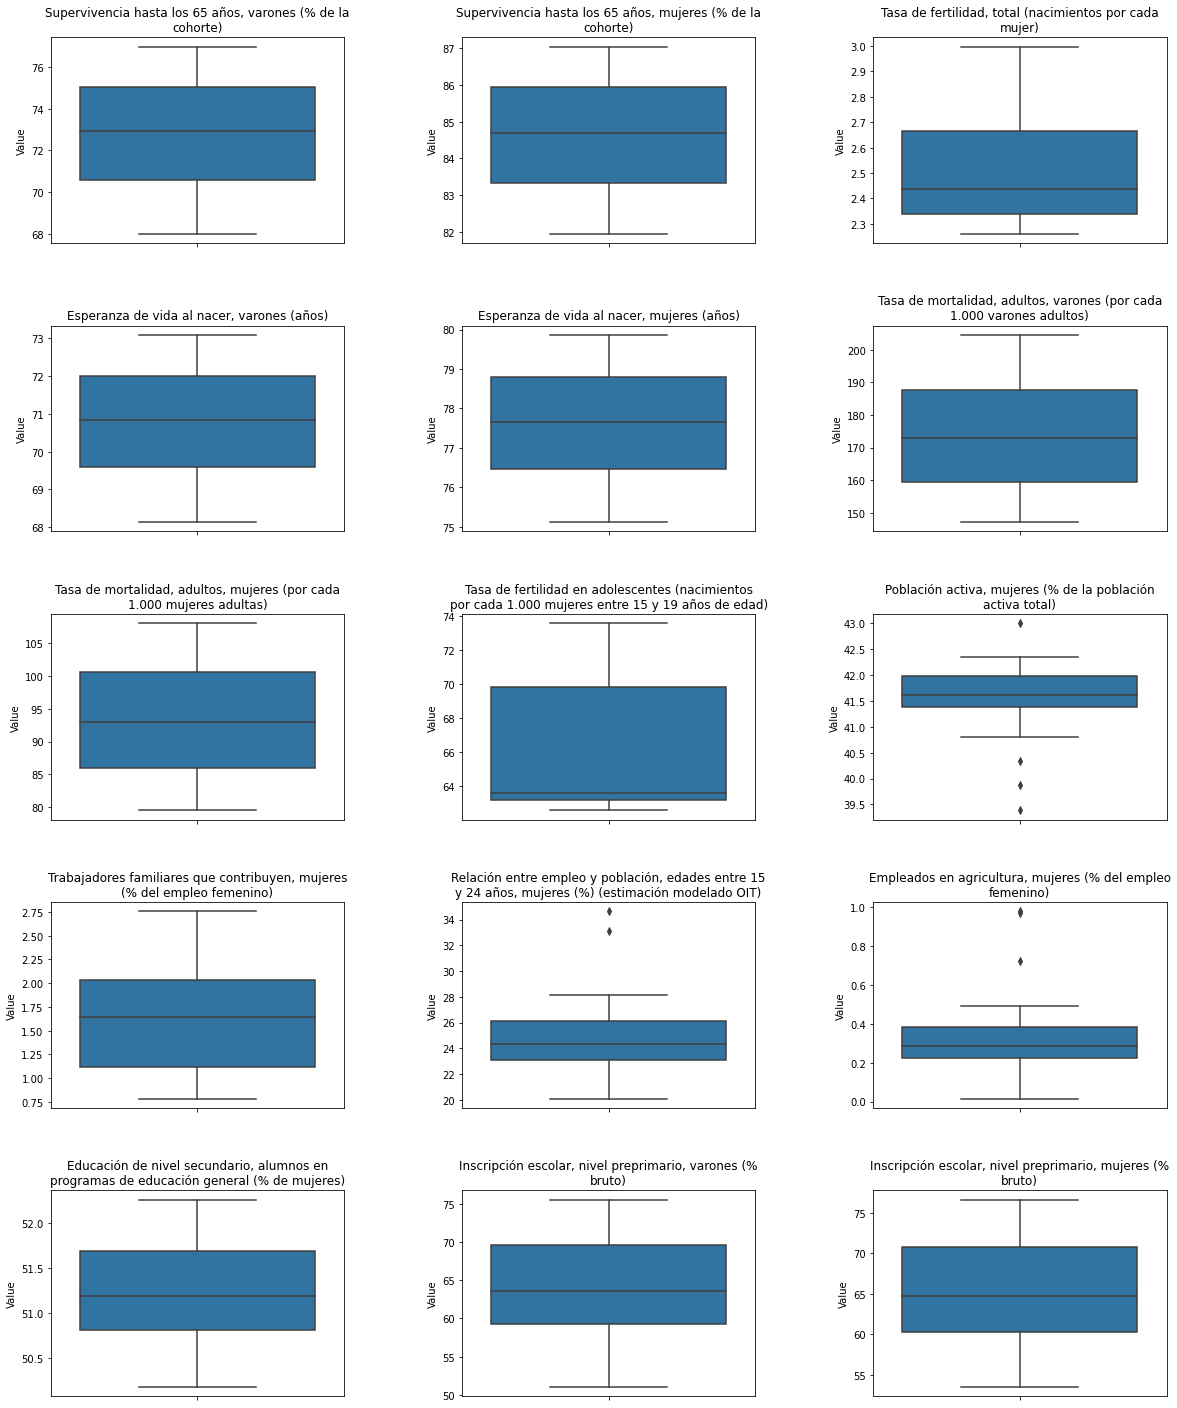

In [ ]:
plot_indi_15feat_boxplots("Gender")

##### Educación

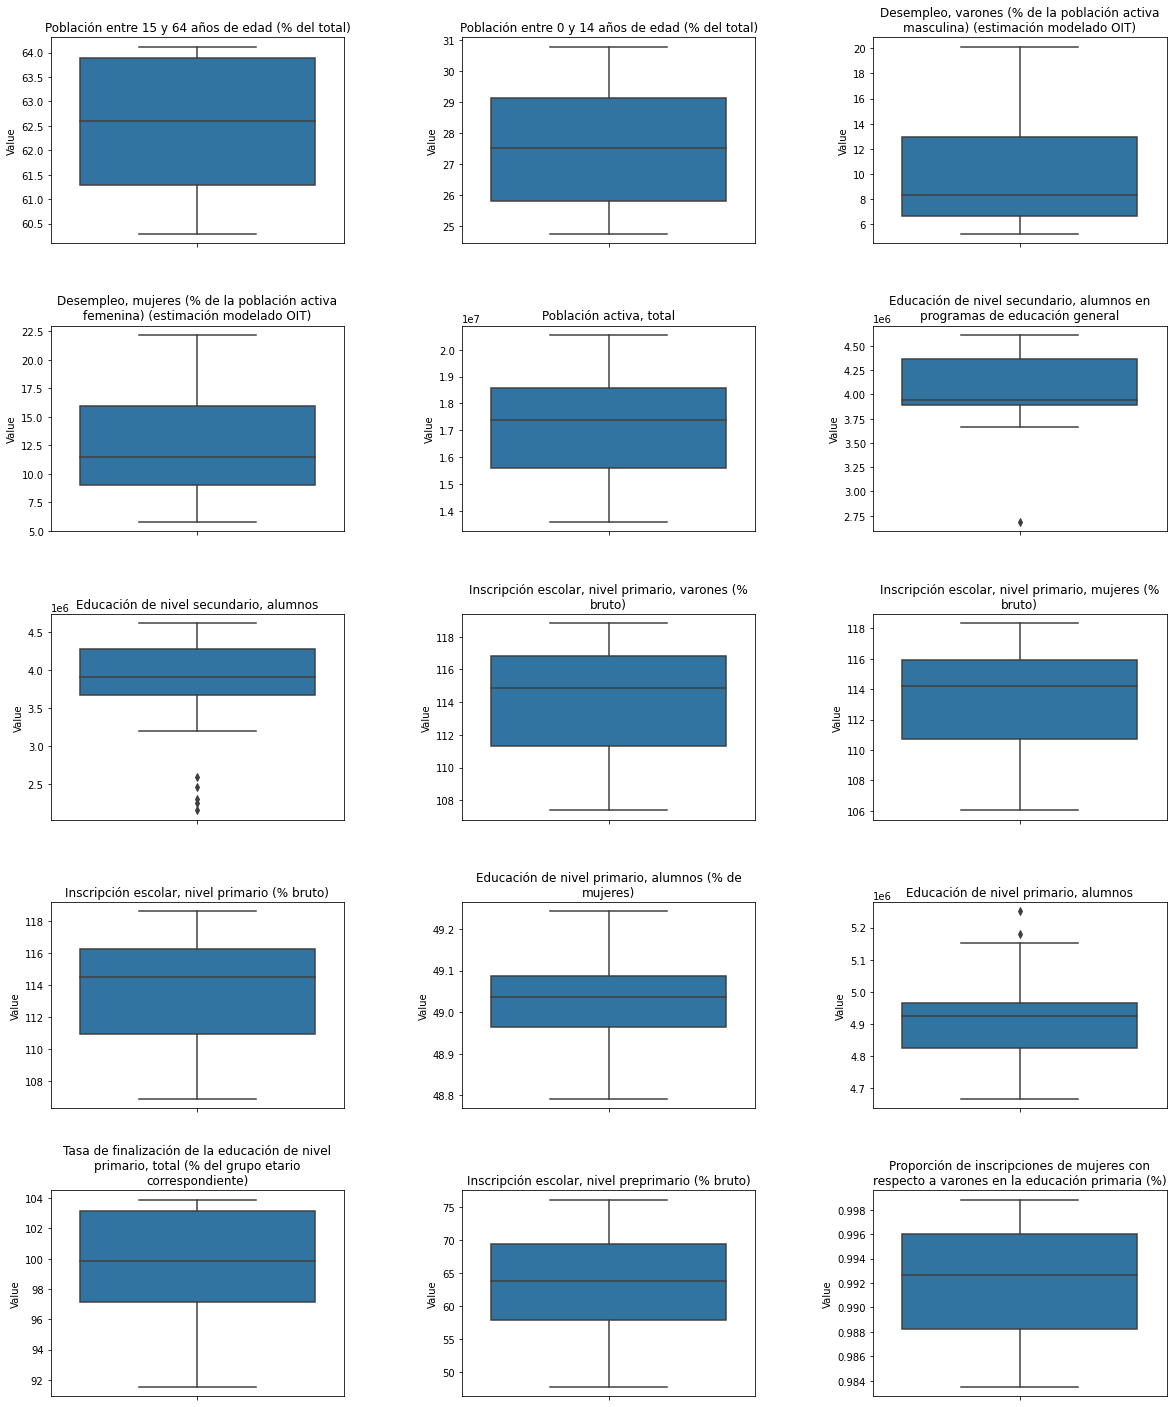

In [ ]:
plot_indi_15feat_boxplots("Education")

##### Pobreza

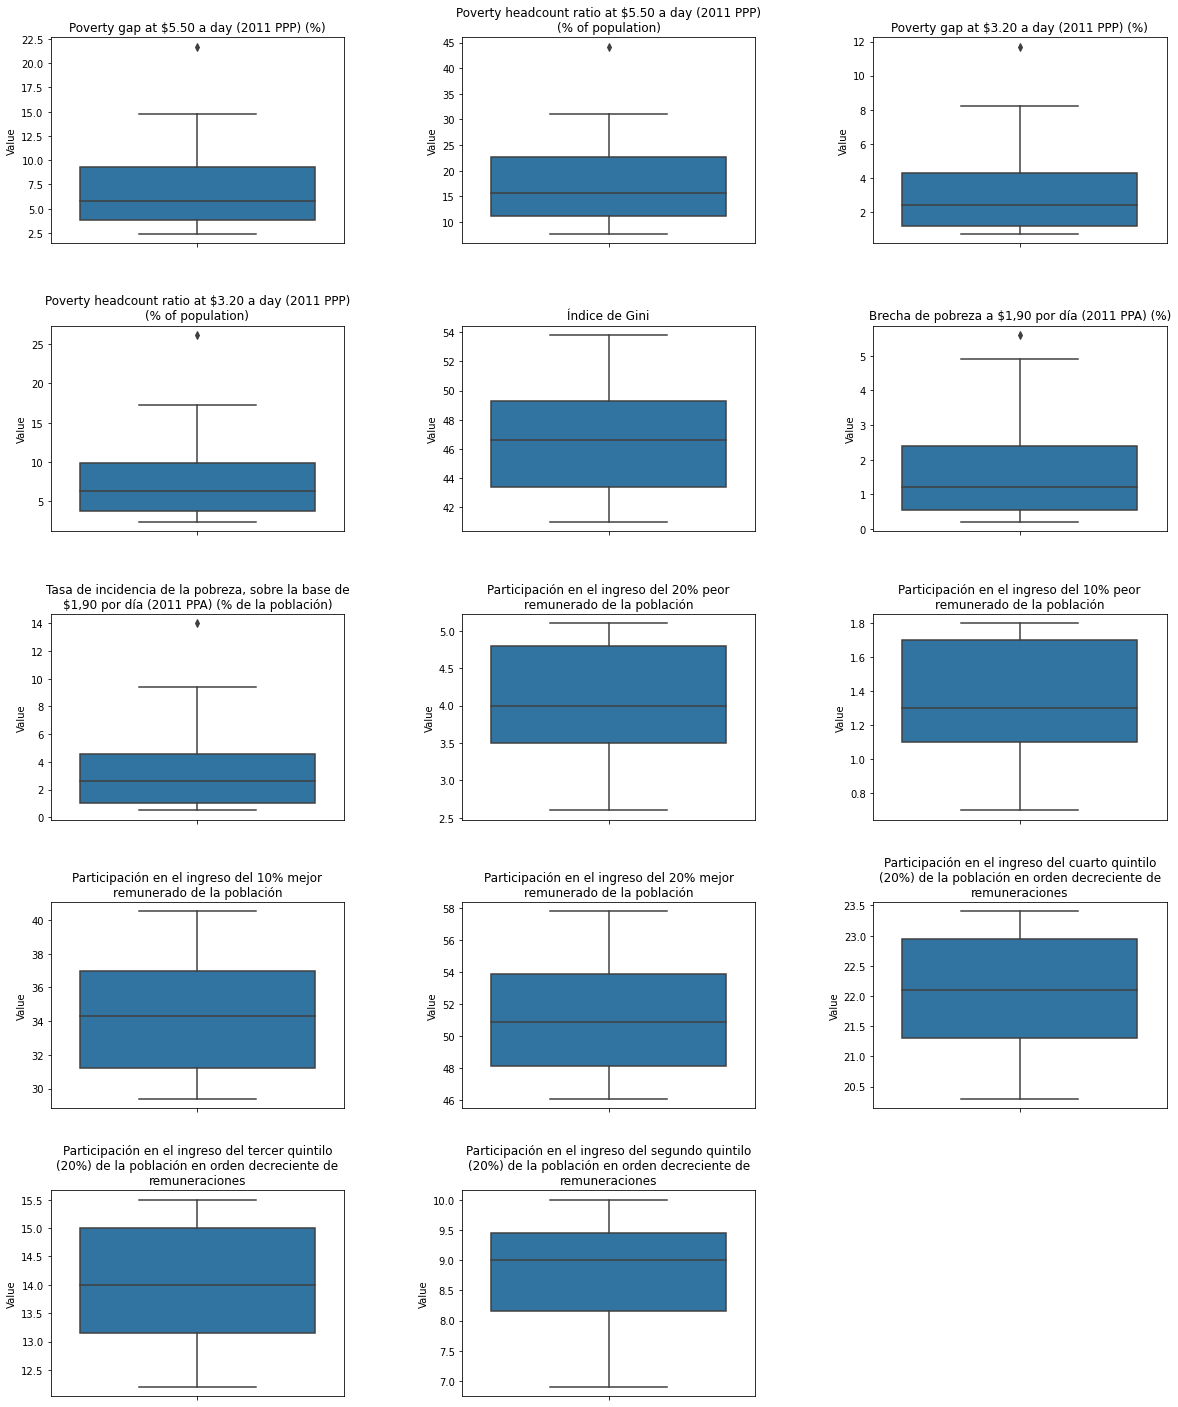

In [ ]:
plot_indi_15feat_boxplots("Poverty")

##### Ambiente

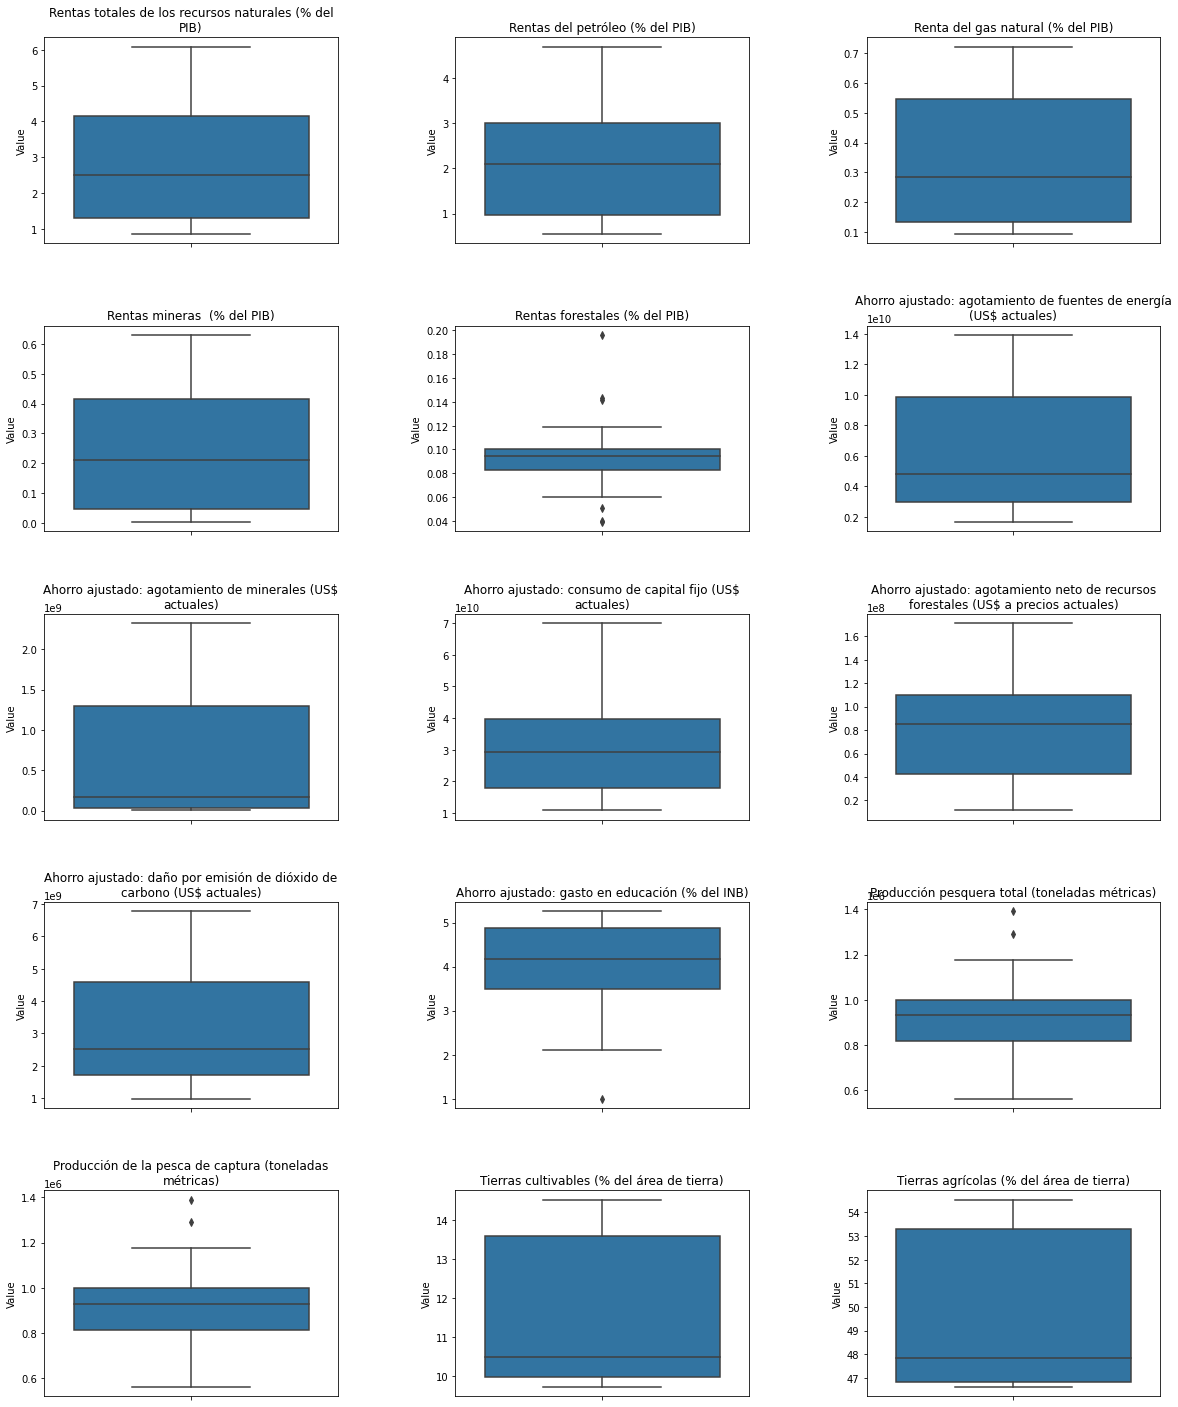

In [ ]:
plot_indi_15feat_boxplots("Environment")

##### Salud

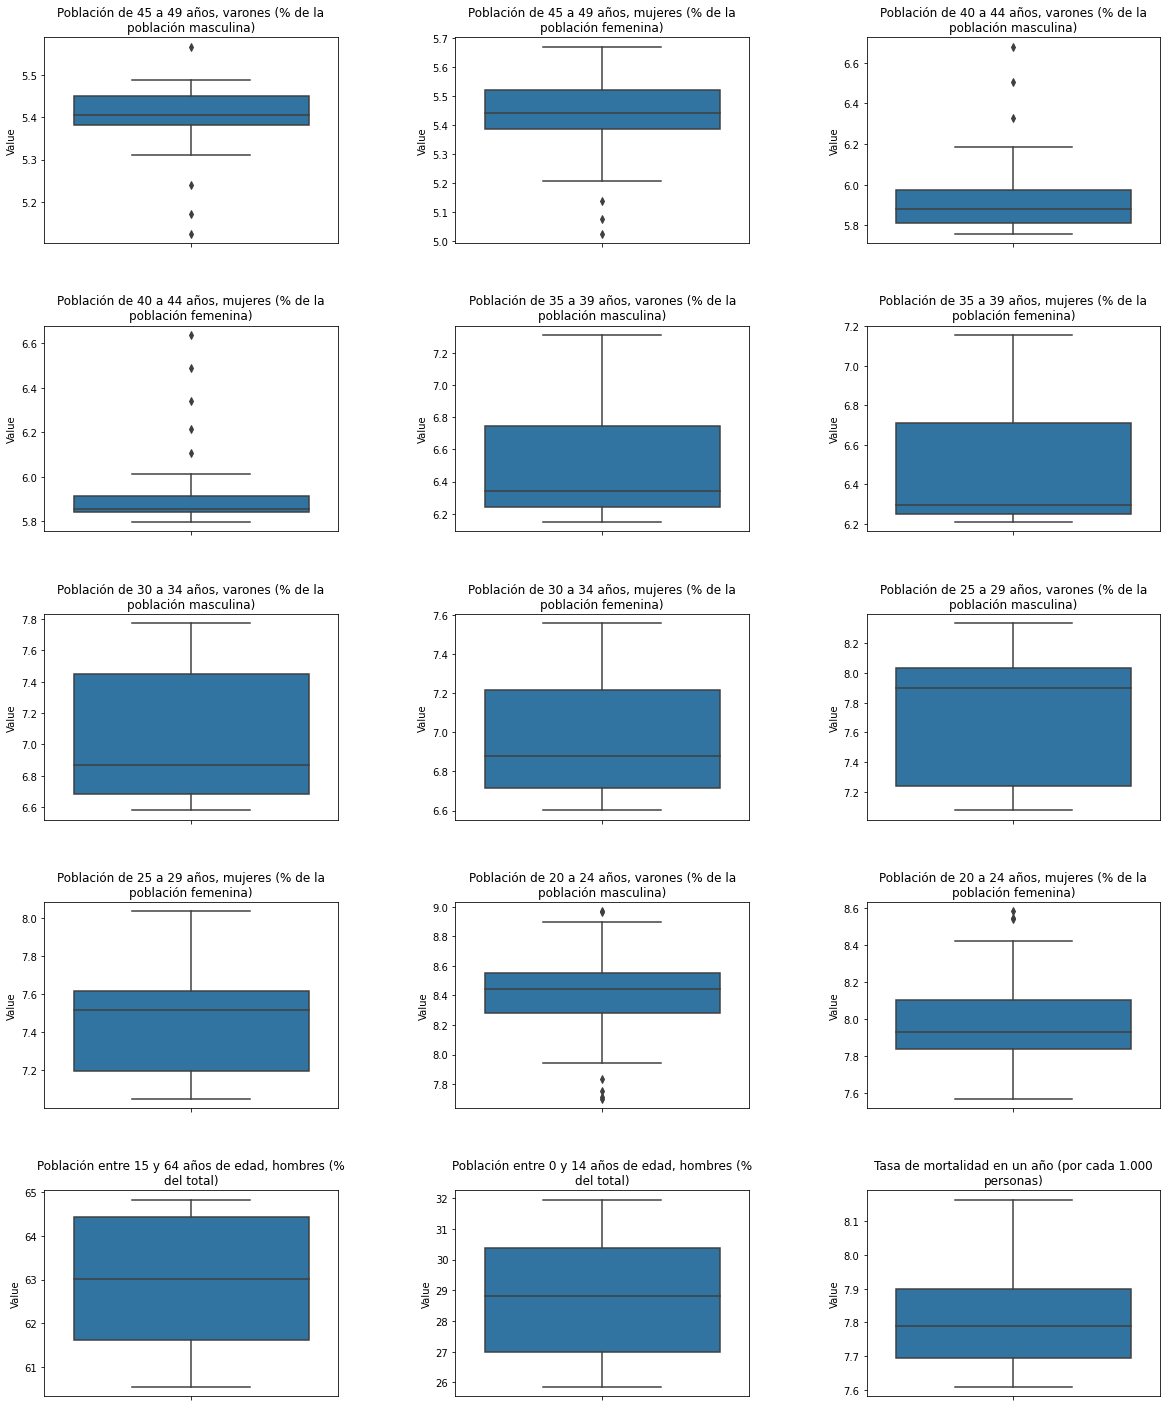

In [ ]:
plot_indi_15feat_boxplots("Health")

##### Social Protection

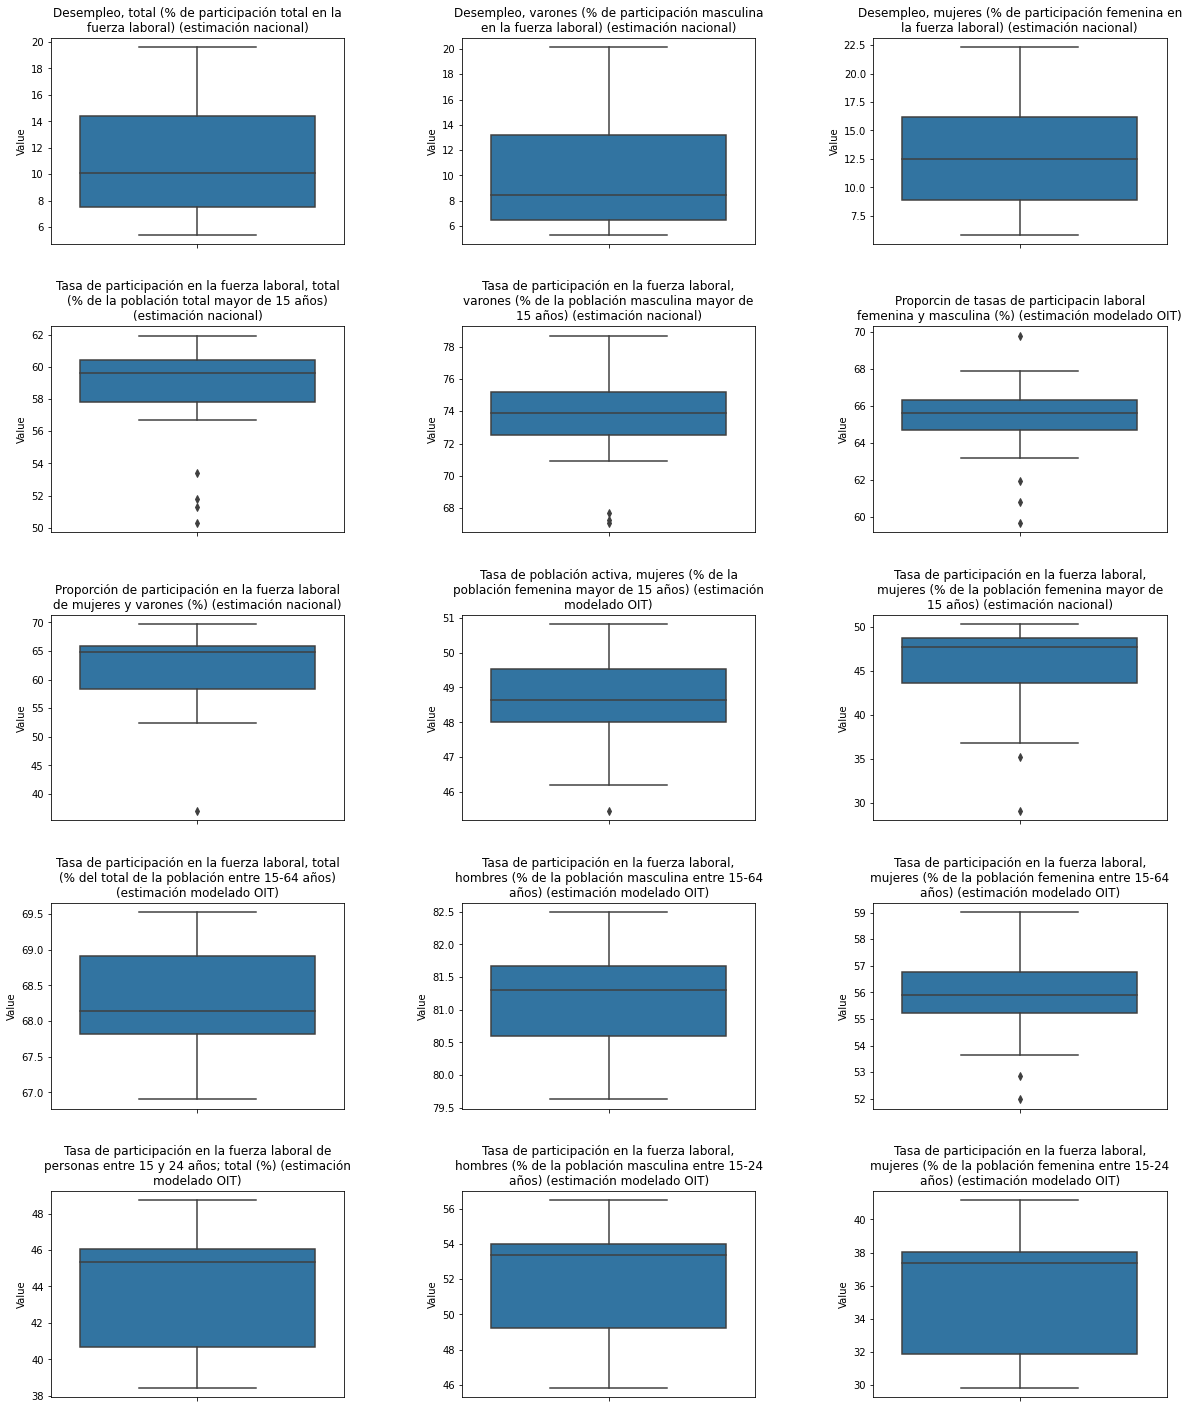

In [ ]:
plot_indi_15feat_boxplots("Social_protection")

#### c) Trazar los gráficos de línea de los 15 features en el intervalo considerado.

In [ ]:
def plot_indi_15feat_pointplot(indicator):
  fig = plt.figure(figsize=(20,25))
  fig.subplots_adjust(hspace=0.6, wspace=0.4)
  i = 1
  datos = data_ARG[data_ARG.Indi == indicator]
  for ii in datos.Feat.unique():
     cod = data_ARG[data_ARG.Feat == ii].ICod.unique()[0]
     ax = fig.add_subplot(5, 3, i)
     ax.title.set_text('\n'.join(wrap(ii, 50)) + "\n" + cod)
     sns.pointplot(x = "Year", y = "Value", data = datos[datos.Feat == ii])
     plt.xticks(rotation = 90)
     i = i + 1
  plt.show()

##### Género

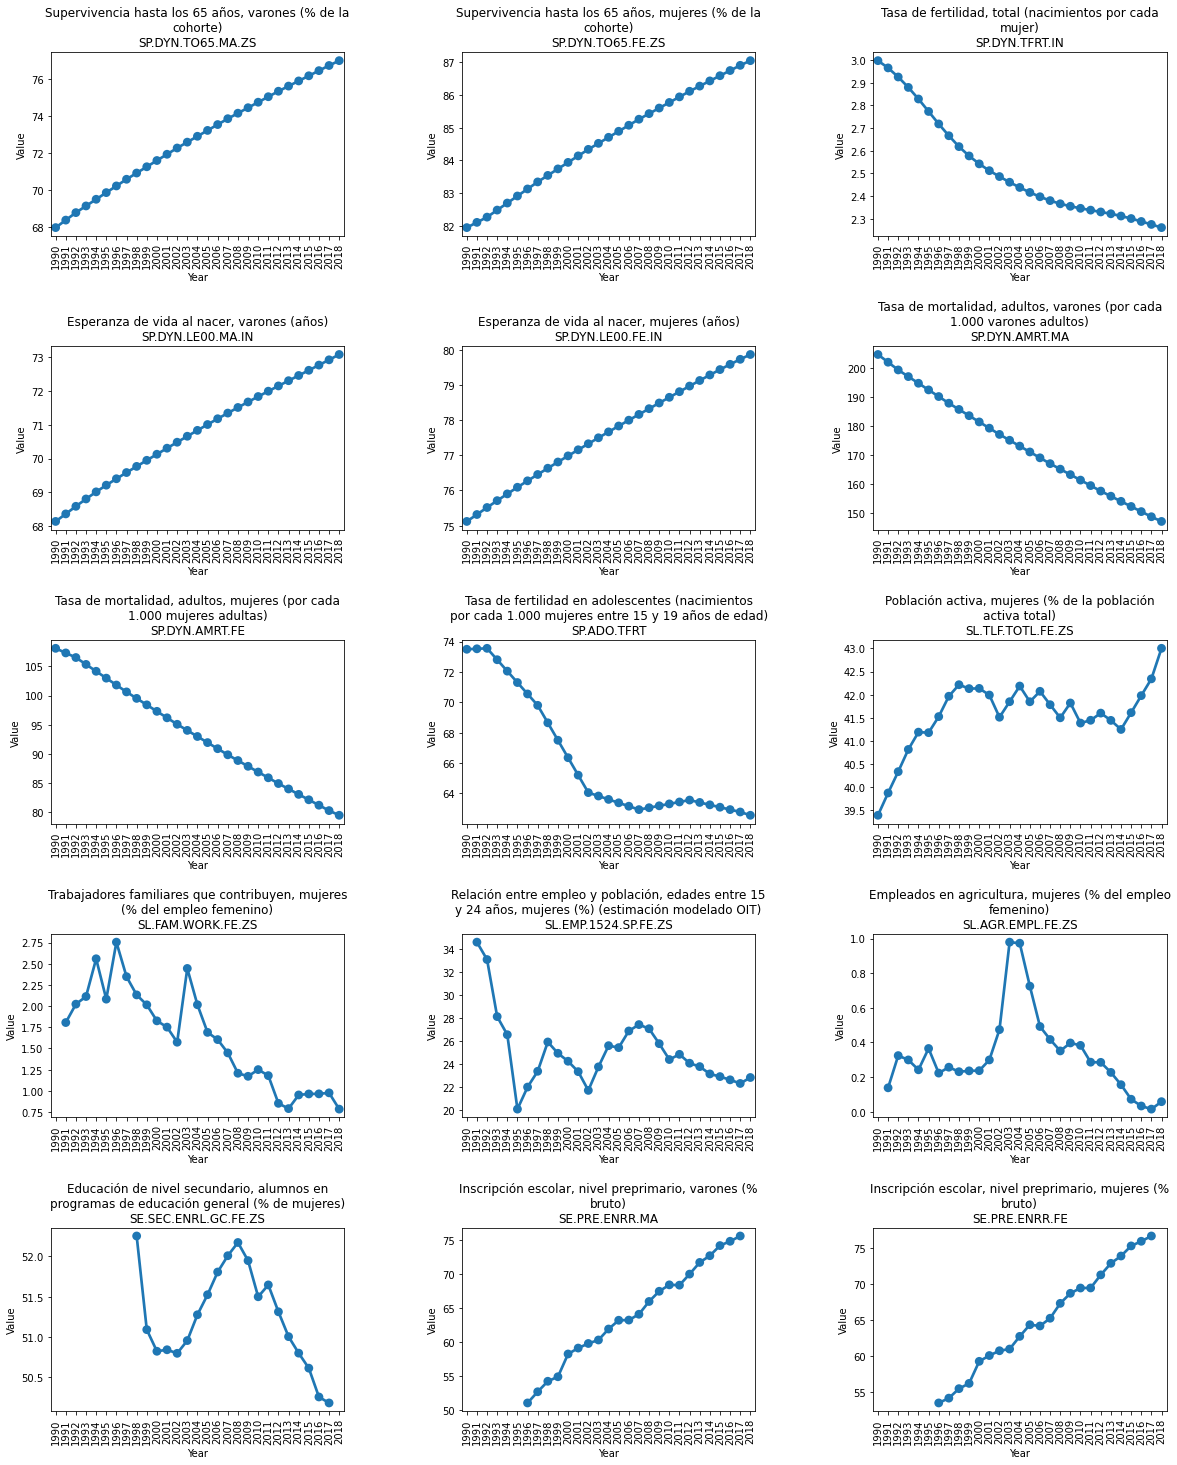

In [ ]:
plot_indi_15feat_pointplot("Gender")

##### Educación

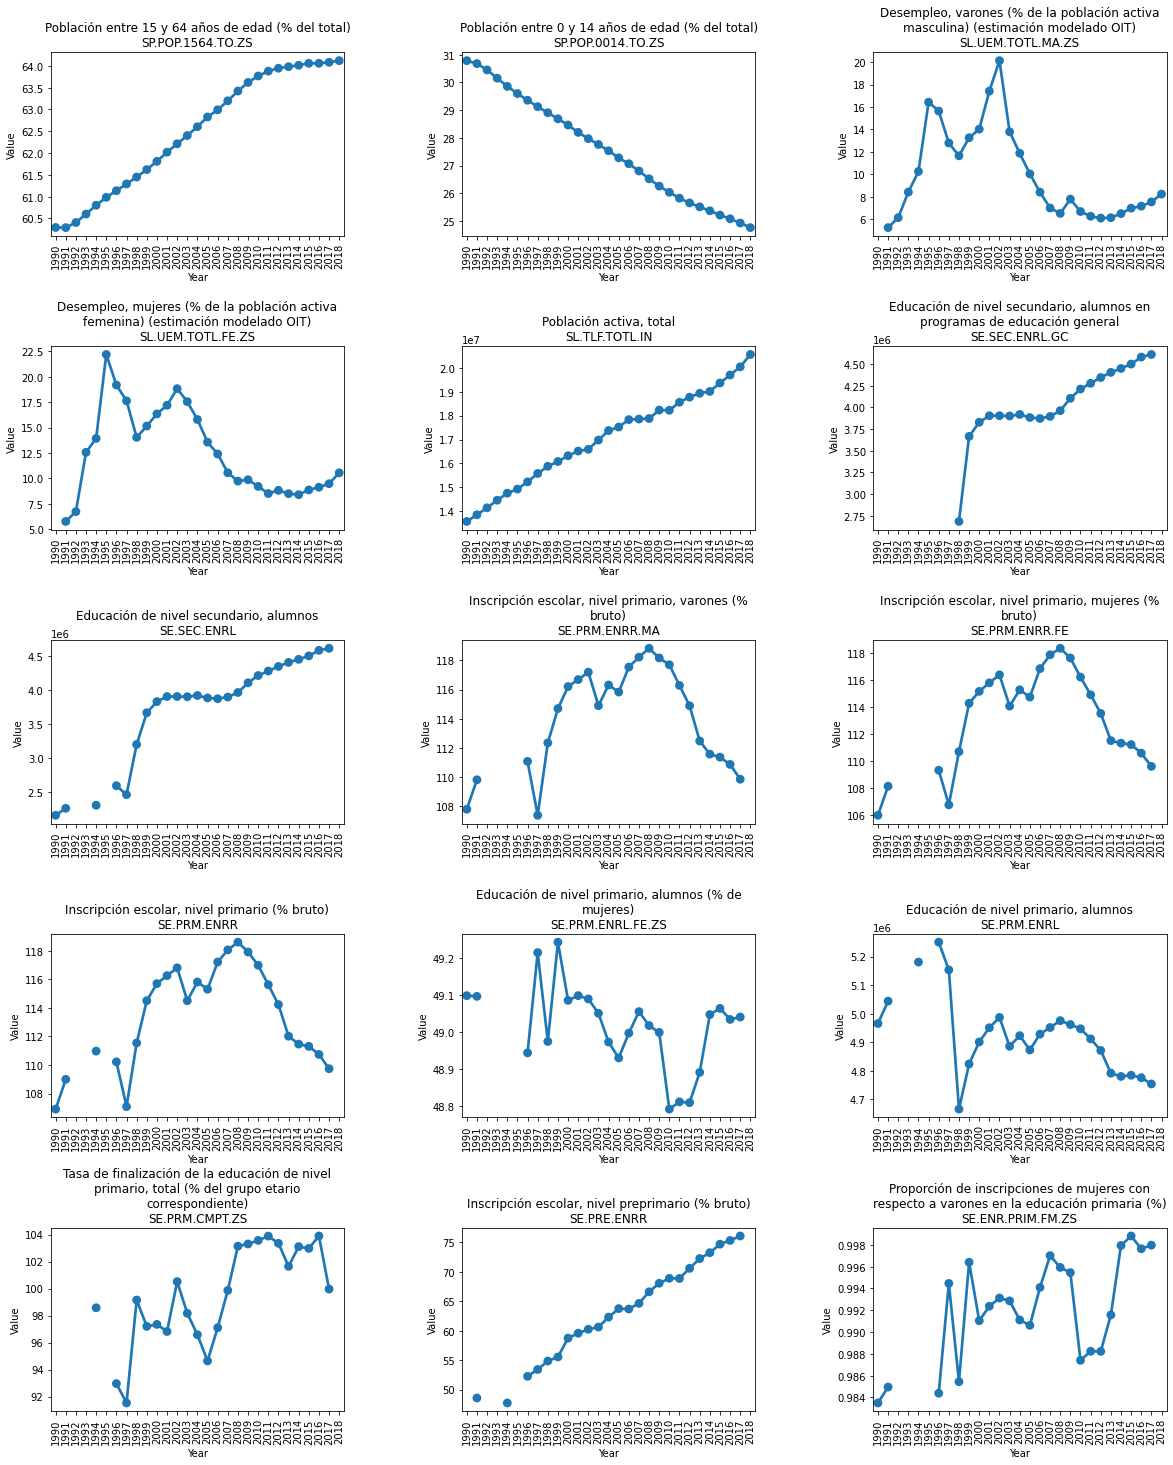

In [ ]:
plot_indi_15feat_pointplot("Education")

##### Pobreza

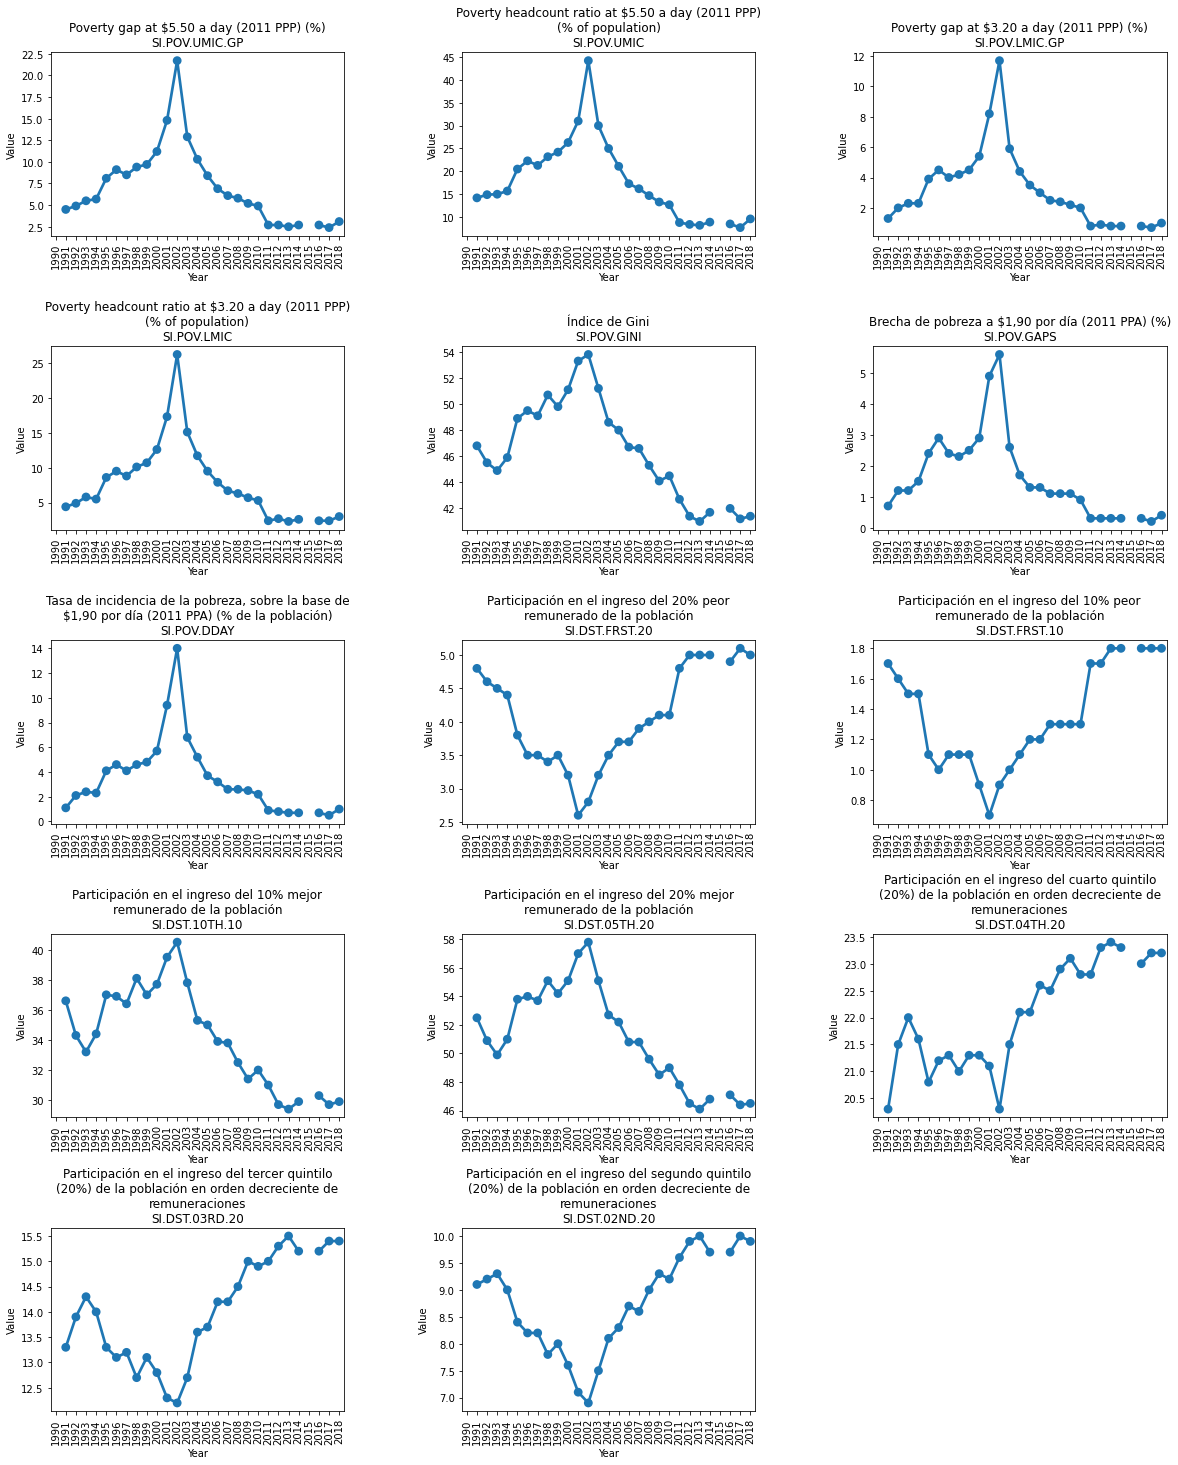

In [ ]:
plot_indi_15feat_pointplot("Poverty")

##### Ambiente

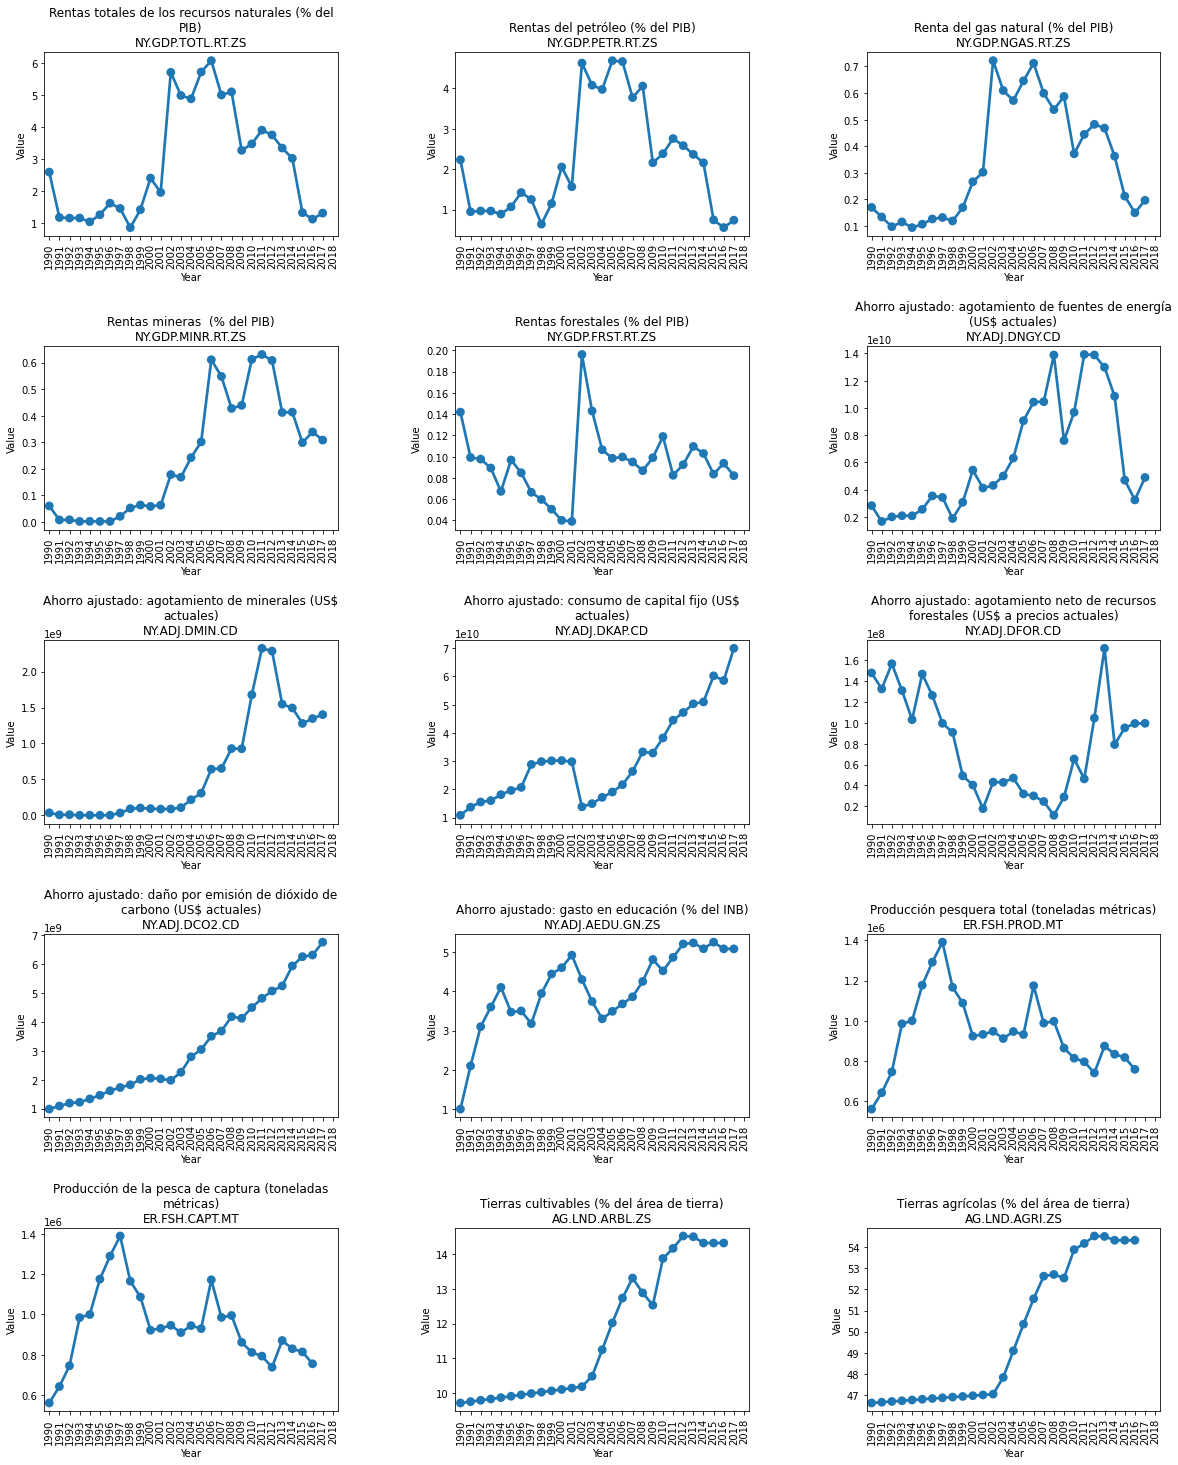

In [ ]:
plot_indi_15feat_pointplot("Environment")

##### Salud

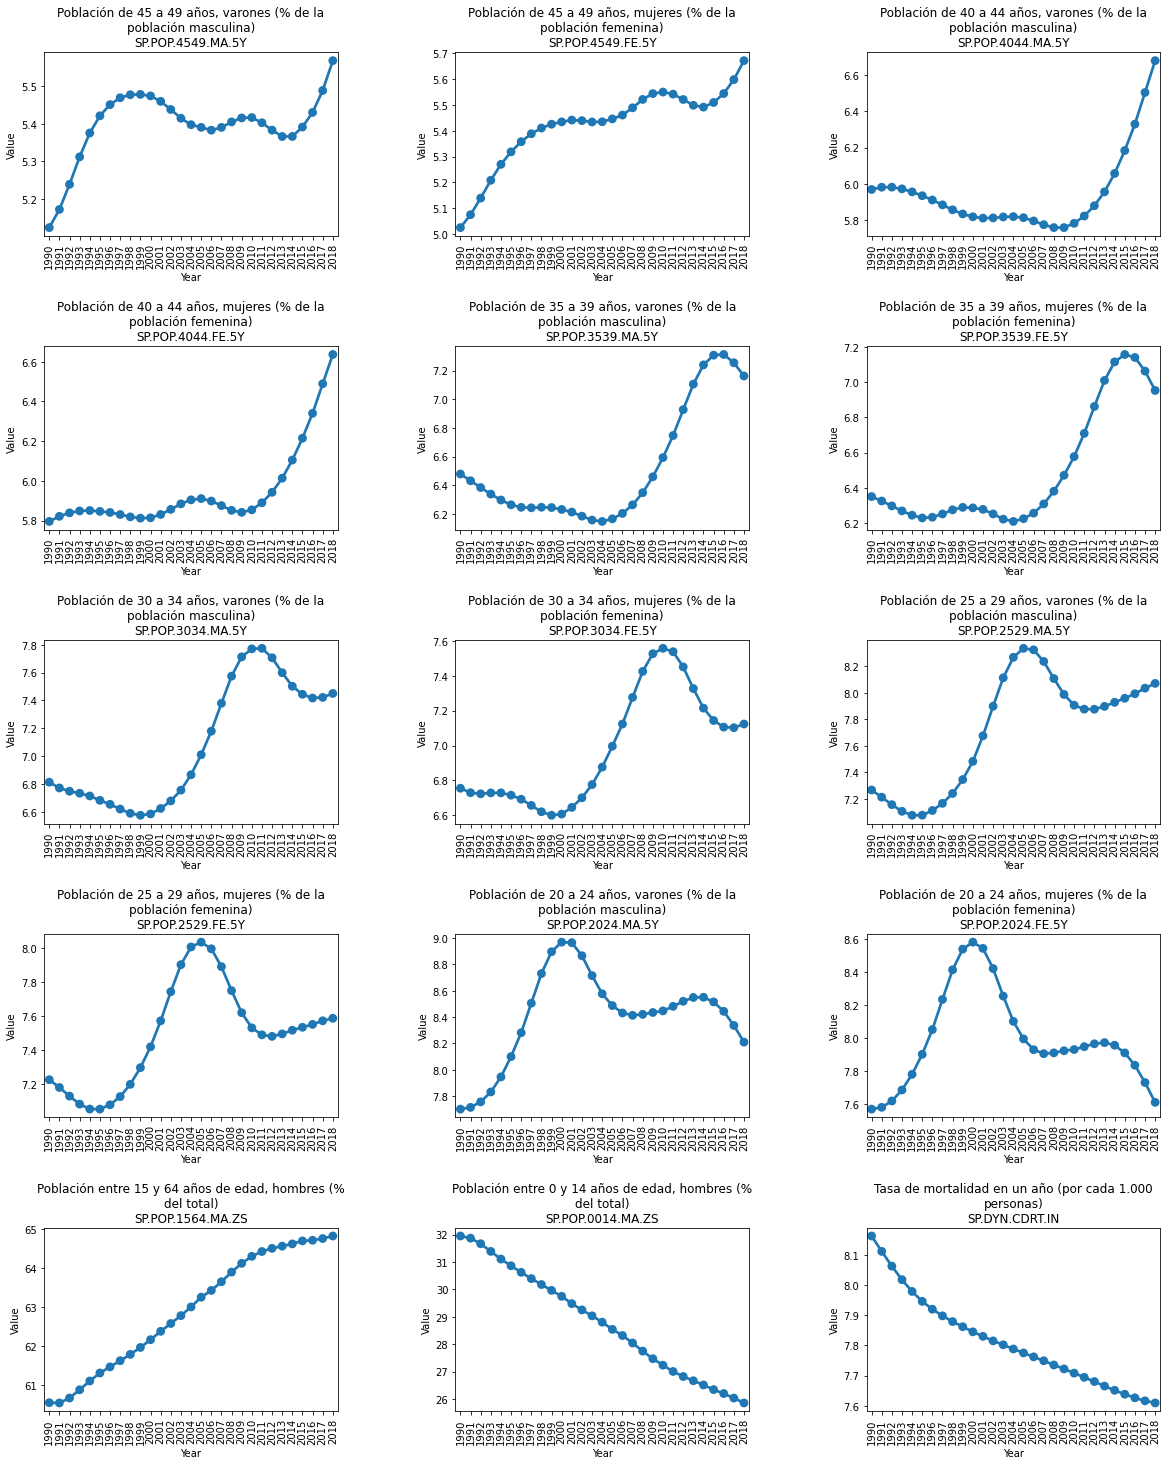

In [ ]:
plot_indi_15feat_pointplot("Health")

##### Social Protection

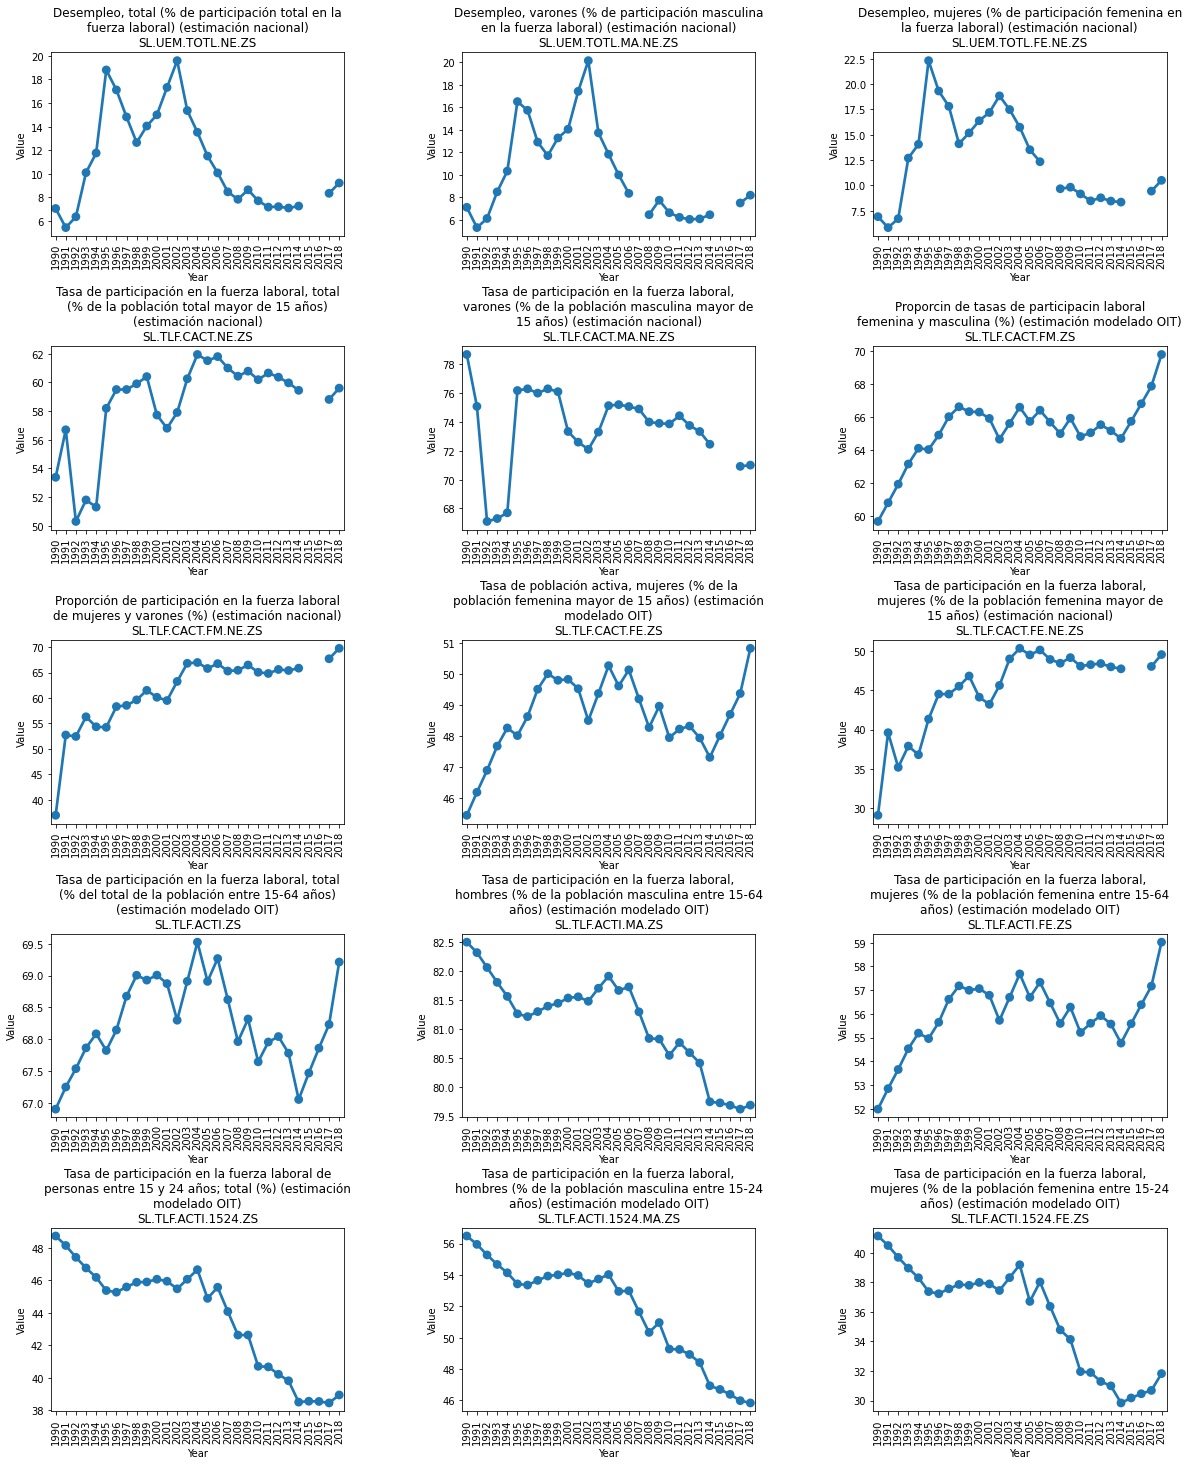

In [ ]:
plot_indi_15feat_pointplot("Social_protection")

#### d) Analizar en conjunto los resultados de los puntos a, b y c.

Pueden guiarse de las siguientes preguntas:

* ¿Las distribuciones presentan alguna forma conocida?
* ¿Qué sucede con los valores máximos y mínimos? ¿Existen outliers?
* ¿Detectan algún patrón o tendencia?
* ¿Cómo afecta la presencia de valores nulos o faltantes a la distribución de las variables?
* ¿Las variables o features de un mismo indicador presentan distribuciones similares?. OPCIONAL: Utilizar algún test estadístico (por ejemplo test de comparación de medias) para validar o rechazar hipótesis.

Visualmente se observan todo tipo de distribuciones, dependiendo del Feature que se esté analizando. En general, se observan pocos outliers. Se pueden observar ciertas tendencias temporales entre Features de un mismo indicador. Por ejemplo, varios Features de Pobreza y de Salud parecen seguir una misma tendencia temporal, con máximos y mínimos en aproximadamente los mismos rangos temporales. Los valores nulos para las Features analizadas son pocos, ya que fueron elegidos en función de minimizar la cantidad de valores nulos que contengan. Por lo tanto, no afectan en gran medida a la distribución de las variables.

## Análisis de posible imputación de valores faltantes


#### a. En base al estudio y análisis anterior, ¿Considera que se dispone de suficiente información para completar/rellenar los valores faltantes? ¿Cuáles reemplazaría y qué criterio/s usaría? Justifique sus respuestas.

#### b. Identificar los casos en los cuáles no se cuenta con información suficiente para compensar la falta de valores nulos y analizar dichos features valiendose del análisis y visualización realizada en el práctico anterior: 

* ¿Cómo es la distribución de este feature en los demás países?
* ¿Presentan la misma tendencia a lo largo del tiempo? ¿Presentan la misma cantidad de valores faltantes?
* ¿Es posible establecer alguna relación entre los países vecinos a Argentina o con algún país en particular?
* ¿De qué manera la posible correlación con otros países se encuentra limitada por el contexto local? Por ejemplo: La crisis del 2001 en Argentina es un evento totalmente local que probablemente no haya afectado a la región).

OPCIONAL: Aplicar test estadísticos para validar o rechazar hipótesis o cualquier herramienta estadística que considere pertinente.

#### c. Enumerar las conclusiones que se extrajeron a partir de los puntos a y b y tomar una decisión al respecto, es decir:

* Imputar valores nulos usando el criterio elegido.
* Eliminar aquellos features con valores nulos por carecer de información suficiente para tomar una decisión.


#### d. Dejar un registro en formato resumen, o el que consideren pertinente, de las decisiones tomadas junto con alguna breve explicación de las mismas. La idea es que sea lo más entendible posible para un lector técnico pero sin demasiado conocimiento del dataset.

#### e. A partir de los resultados del punto c, generar un nuevo dataset por Indicador para Argentina con un nombre adecuado y guardarlo en formato csv. El procedimiento puede realizarse con la función to_csv de pandas.

A continuación, generamos una copia del dataset data_ARG llamada data_ARG_imp. Reemplazaremos los valores nulos del dataset sobre data_ARG_imp. Se presentan los Features con valores nulos a imputar, ordenados por indicador. En cada caso se justifica la metodología utilizada para imputar los valores nulos.

In [ ]:
# Hacemos una copia del dataset para no modificar el original. En el nuevo dataset haremos las modificaciones
# correspondientes relacionadas a los valores nulos
data_ARG_imp = data_ARG.copy()

#### Género

In [ ]:
#Chequeo el dataset data_ARG por valores nulos
i=1
for ft in data_ARG[data_ARG.Indi == "Gender"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG[data_ARG.Feat == ft].Value.isna().any(), data_ARG[data_ARG.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: False ['SP.DYN.TO65.MA.ZS'] Supervivencia hasta los 65 años, varones (% de la cohorte)
2 ¿posee valores NA?: False ['SP.DYN.TO65.FE.ZS'] Supervivencia hasta los 65 años, mujeres (% de la cohorte)
3 ¿posee valores NA?: False ['SP.DYN.TFRT.IN'] Tasa de fertilidad, total (nacimientos por cada mujer)
4 ¿posee valores NA?: False ['SP.DYN.LE00.MA.IN'] Esperanza de vida al nacer, varones (años)
5 ¿posee valores NA?: False ['SP.DYN.LE00.FE.IN'] Esperanza de vida al nacer, mujeres (años)
6 ¿posee valores NA?: False ['SP.DYN.AMRT.MA'] Tasa de mortalidad, adultos, varones (por cada 1.000 varones adultos)
7 ¿posee valores NA?: False ['SP.DYN.AMRT.FE'] Tasa de mortalidad, adultos, mujeres (por cada 1.000 mujeres adultas)
8 ¿posee valores NA?: False ['SP.ADO.TFRT'] Tasa de fertilidad en adolescentes (nacimientos por cada 1.000 mujeres entre 15 y 19 años de edad)
9 ¿posee valores NA?: False ['SL.TLF.TOTL.FE.ZS'] Población activa, mujeres (% de la población activa total)
10 ¿pose

##### - Educación de nivel secundario, alumnos en programas de educación general (% de mujeres)

Para este Feature, faltan datos desde 1990 a 1997. Se analizaron los datos anteriores a 1990 para Argentina y para países de la región (gráficos no mostrados). Las tendencias para los países de la región son muy distintas a las de Argentina, o presentan muchos valores nulos. Por ello, se decidió rellenar los datos faltantes con la función `interpolate`, tomando toda la línea temporal.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

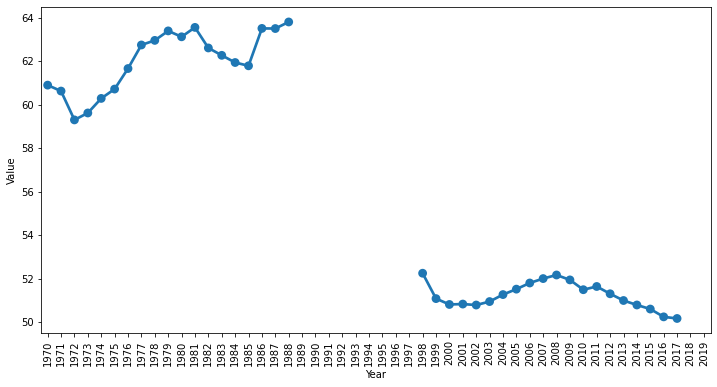

In [ ]:
# Educación de nivel secundario, alumnos en programas de educación general (% de mujeres)
# SE.SEC.ENRL.GC.FE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.SEC.ENRL.GC.FE.ZS")])
plt.xticks(rotation = 90)

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.SEC.ENRL.GC.FE.ZS")].interpolate(method = "quadratic").interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.SEC.ENRL.GC.FE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

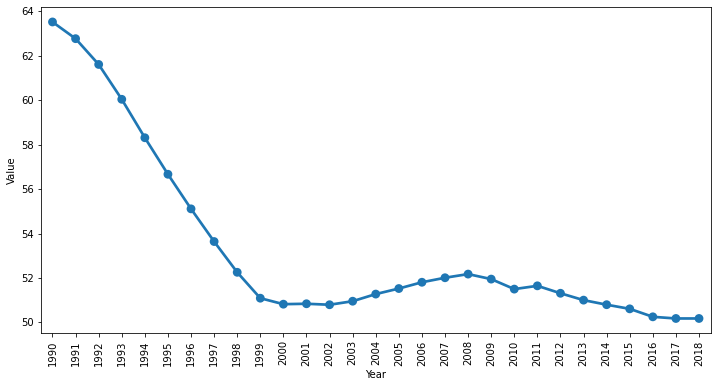

In [ ]:
# Graficamos el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = data_ARG_imp[data_ARG_imp.ICod == "SE.SEC.ENRL.GC.FE.ZS"])
plt.xticks(rotation = 90)

##### - Inscripción escolar, nivel preprimario, varones (% bruto)

Analizaremos la tendencia de este Feature para países limítrofes con Argentina.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

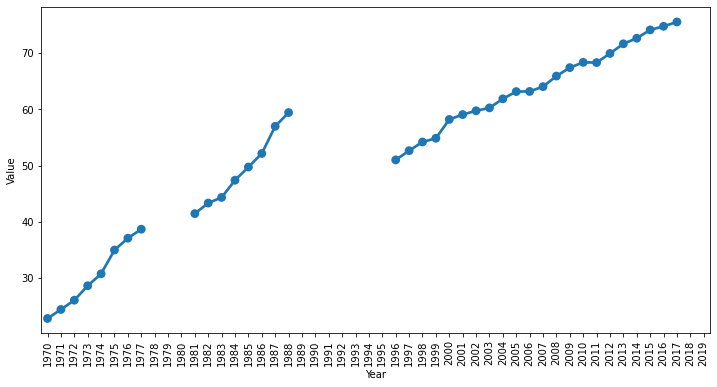

In [ ]:
# Graficamos el feature
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRE.ENRR.MA")])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

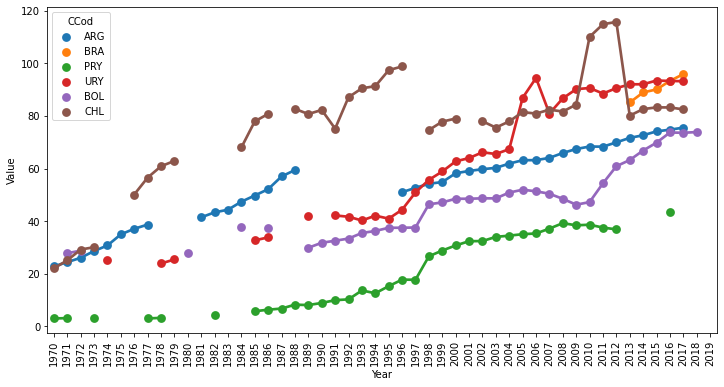

In [ ]:
# Inscripción escolar, nivel preprimario, varones (% bruto)
# SE.PRE.ENRR.MA

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod.isin(["ARG", "BRA", "URY", "PRY", "CHL", "BOL"])) & (dataset.ICod == "SE.PRE.ENRR.MA")], hue = "CCod")
plt.xticks(rotation = 90)

Se observa un corte en Argentina entre 1988 y 1995. La tendencia para los otros países analizados es ascendente. LLama la atención el patrón encontrado en Uruguay, cuya curva tiende a estabilizarse ntre 1988 y 1995. Utilizaremos la función `interpolate` para aplicar una regresión lineal y rellenar los datos faltantes para Argentina. Utilizaremos el método polinómico para que el descenso sea más suave. Además, rellenaremos el valor faltante en 2018 con el mismo valor de 2017.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRE.ENRR.MA")].interpolate(method = "polynomial", order = 3).interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRE.ENRR.MA"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

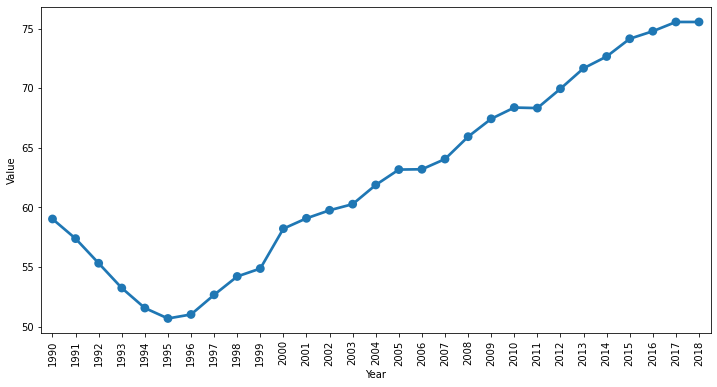

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRE.ENRR.MA"])
plt.xticks(rotation = 90)

##### - Inscripción escolar, nivel preprimario, mujeres (% bruto)

De manera similar que con el Feature anterior, analizaremos la tendencia de este Feature para países limítrofes con Argentina.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

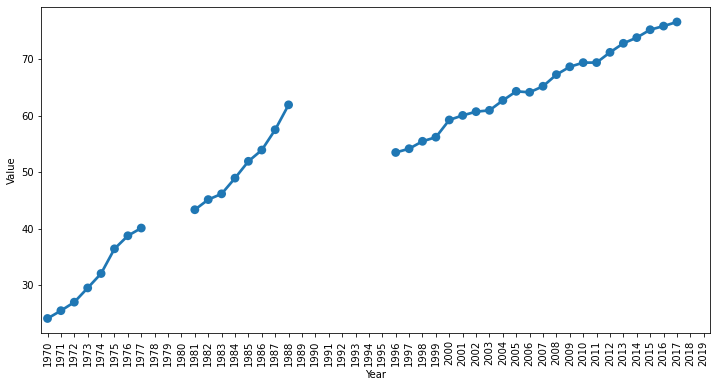

In [ ]:
# Graficamos el feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRE.ENRR.FE")])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

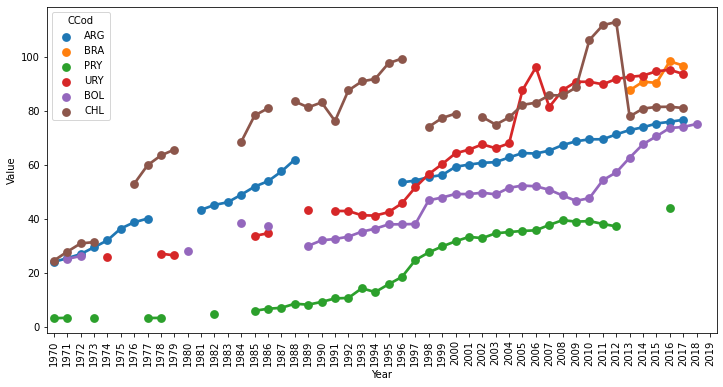

In [ ]:
# Inscripción escolar, nivel preprimario, mujeres (% bruto)
# SE.PRE.ENRR.FE

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod.isin(["ARG", "BRA", "URY", "PRY", "CHL", "BOL"])) & 
                                                      (dataset.ICod == "SE.PRE.ENRR.FE")], hue = "CCod")
plt.xticks(rotation = 90)

Se observan patrones similares a los del Feature anterior, por lo que aplicaremos los mísmos métodos para rellenar los valores faltantes.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRE.ENRR.FE")].interpolate(method = "polynomial", order = 3).interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRE.ENRR.FE"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

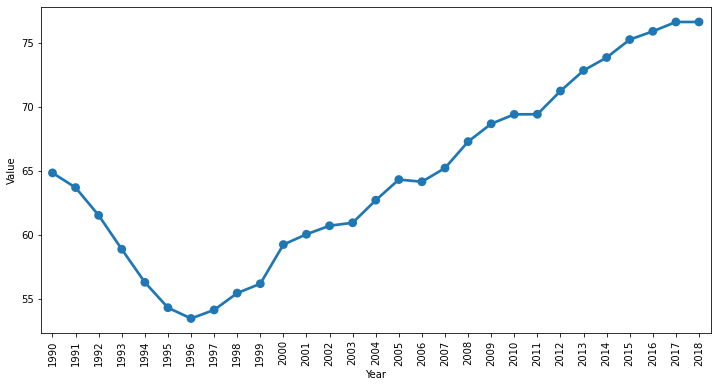

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRE.ENRR.FE"])
plt.xticks(rotation = 90)

##### - Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)

(0.98, 1.01)

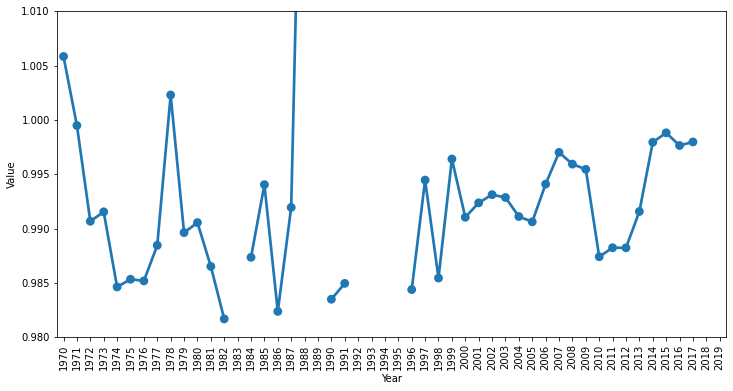

In [ ]:
# Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)
# SE.ENR.PRIM.FM.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.ENR.PRIM.FM.ZS")])
plt.xticks(rotation = 90)
plt.ylim((0.98, 1.01))

Se observa que, a pesar el pico (que se va de escala) en 1988, al analizar toda la línea temporal, no se observan tendencias ascendentes o descendentes. Si además analizamos el gráfico de caja y las medidas de resumen correspondientes con este Feature, se observa que la distribución de sus valores tiende a normal (la media y la mediana coinciden). Proponemos entonces, rellenar los valores faltantes entre 1992 y 1995 con el valor medio de toda la línea temporal (desde 1970 a 2019). Por otro lado, proponemos rellenar el valor faltante en 2018 repitiendo el valor obtenido en 2017.

In [ ]:
# Obtenemos la media
media = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.ENR.PRIM.FM.ZS")].Value.mean()
data_ARG_imp.loc[(data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS") & 
                 (data_ARG_imp.Indi == "Gender") &
                 (data_ARG_imp.Year > 1991) & 
                 (data_ARG_imp.Year < 1996), "Value"] = media
tmp_df = data_ARG_imp[(data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS") & (data_ARG_imp.Indi == "Gender")].interpolate()
data_ARG_imp[(data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS") & (data_ARG_imp.Indi == "Gender")] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

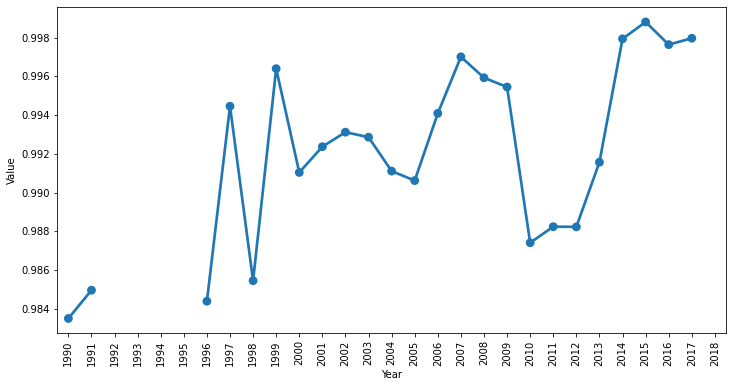

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS"])
plt.xticks(rotation = 90)

##### Trabajadores familiares que contribuyen, mujeres (% del empleo femenino)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

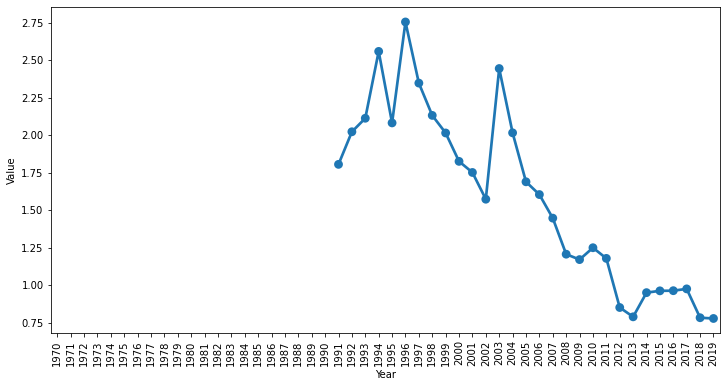

In [ ]:
# Trabajadores familiares que contribuyen, mujeres (% del empleo femenino)
# SL.FAM.WORK.FE.ZS

# Graficamos el feature
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.FAM.WORK.FE.ZS")])
plt.xticks(rotation = 90)

Se observa que los registros comienzan en el año 1991. Entonces, se rellena el valor faltante en 1990 con el registrado en 1991.

In [ ]:
new_val = data_ARG.loc[(data_ARG.ICod == "SL.FAM.WORK.FE.ZS") & (data_ARG.Year == 1991), "Value"].unique()
data_ARG_imp.at[(data_ARG_imp.ICod == "SL.FAM.WORK.FE.ZS") & (data_ARG_imp.Year == 1990), "Value"] = new_val

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

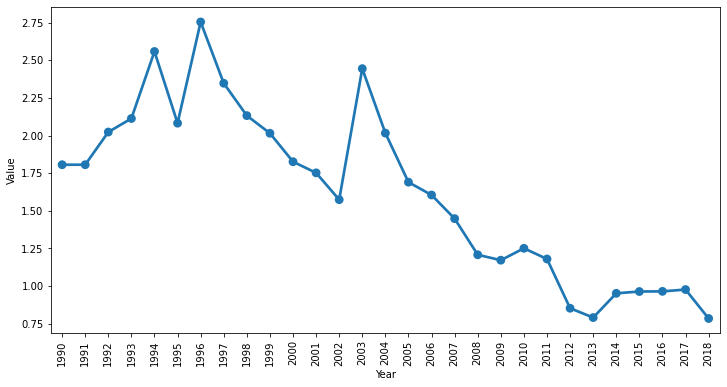

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.FAM.WORK.FE.ZS"])
plt.xticks(rotation = 90)

##### Relación entre empleo y población, edades entre 15 y 24 años, mujeres (%) (estimación modelado OIT)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

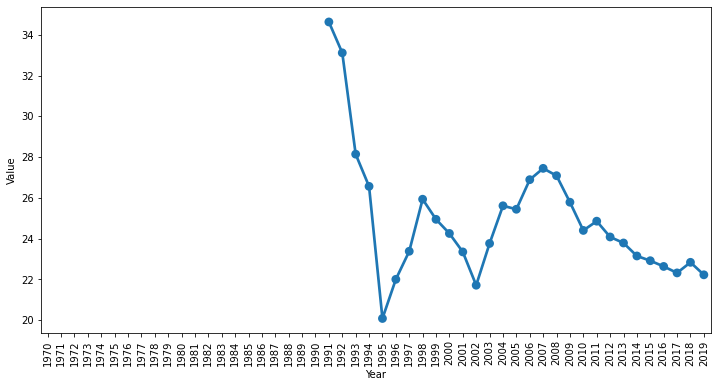

In [ ]:
# Relación entre empleo y población, edades entre 15 y 24 años, mujeres (%) (estimación modelado OIT)
# SL.EMP.1524.SP.FE.ZS

# Graficamos el feature
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.EMP.1524.SP.FE.ZS")])
plt.xticks(rotation = 90)

Se observa que los registros comienzan en el año 1991. Entonces, se rellena el valor faltante en 1990 con el registrado en 1991.

In [ ]:
new_val = data_ARG.loc[(data_ARG.ICod == "SL.EMP.1524.SP.FE.ZS") & (data_ARG.Year == 1991), "Value"].unique()
data_ARG_imp.at[(data_ARG_imp.ICod == "SL.EMP.1524.SP.FE.ZS") & (data_ARG_imp.Year == 1990), "Value"] = new_val

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

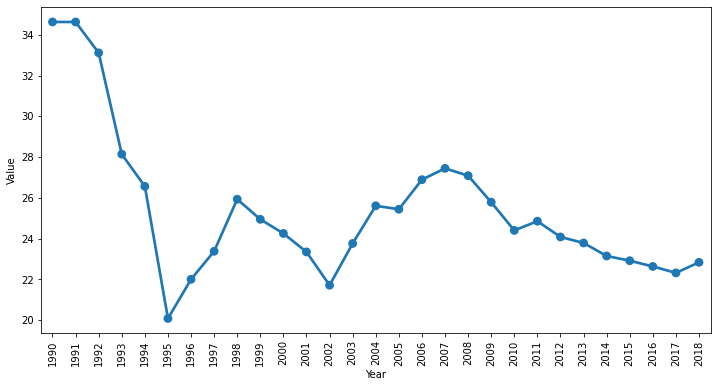

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.EMP.1524.SP.FE.ZS"])
plt.xticks(rotation = 90)

##### Empleados en agricultura, mujeres (% del empleo femenino)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

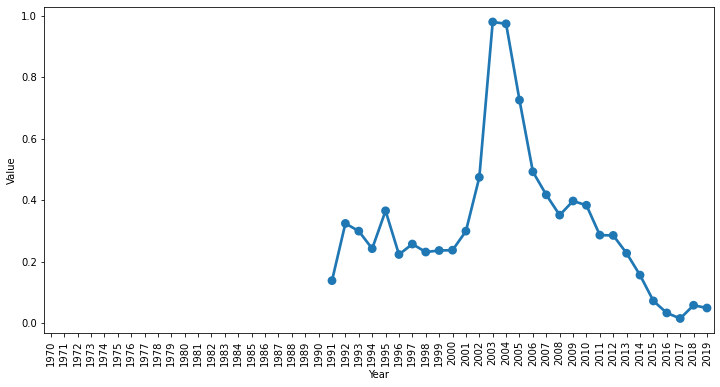

In [ ]:
# Empleados en agricultura, mujeres (% del empleo femenino)
# SL.AGR.EMPL.FE.ZS

# Graficamos el feature
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.AGR.EMPL.FE.ZS")])
plt.xticks(rotation = 90)

Se observa que los registros comienzan en el año 1991. Entonces, se rellena el valor faltante en 1990 con el registrado en 1991.

In [ ]:
new_val = data_ARG.loc[(data_ARG.ICod == "SL.AGR.EMPL.FE.ZS") & (data_ARG.Year == 1991), "Value"].unique()
data_ARG_imp.at[(data_ARG_imp.ICod == "SL.AGR.EMPL.FE.ZS") & (data_ARG_imp.Year == 1990), "Value"] = new_val

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

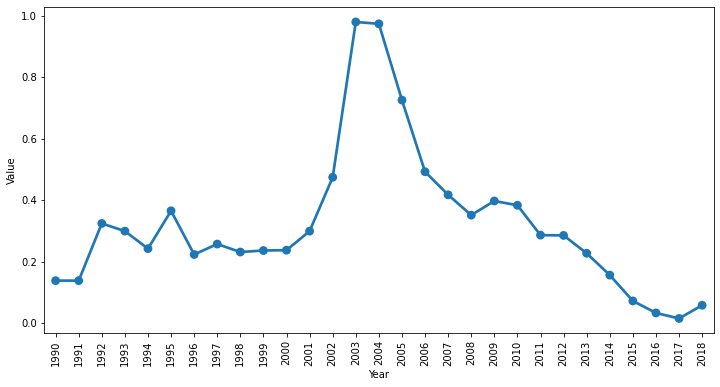

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.AGR.EMPL.FE.ZS"])
plt.xticks(rotation = 90)

In [ ]:
#Chequeo el dataset data_ARG_imp por valores nulos
i=1
for ft in data_ARG_imp[data_ARG_imp.Indi == "Gender"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG_imp[data_ARG_imp.Feat == ft].Value.isna().any(), data_ARG_imp[data_ARG_imp.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: False ['SP.DYN.TO65.MA.ZS'] Supervivencia hasta los 65 años, varones (% de la cohorte)
2 ¿posee valores NA?: False ['SP.DYN.TO65.FE.ZS'] Supervivencia hasta los 65 años, mujeres (% de la cohorte)
3 ¿posee valores NA?: False ['SP.DYN.TFRT.IN'] Tasa de fertilidad, total (nacimientos por cada mujer)
4 ¿posee valores NA?: False ['SP.DYN.LE00.MA.IN'] Esperanza de vida al nacer, varones (años)
5 ¿posee valores NA?: False ['SP.DYN.LE00.FE.IN'] Esperanza de vida al nacer, mujeres (años)
6 ¿posee valores NA?: False ['SP.DYN.AMRT.MA'] Tasa de mortalidad, adultos, varones (por cada 1.000 varones adultos)
7 ¿posee valores NA?: False ['SP.DYN.AMRT.FE'] Tasa de mortalidad, adultos, mujeres (por cada 1.000 mujeres adultas)
8 ¿posee valores NA?: False ['SP.ADO.TFRT'] Tasa de fertilidad en adolescentes (nacimientos por cada 1.000 mujeres entre 15 y 19 años de edad)
9 ¿posee valores NA?: False ['SL.TLF.TOTL.FE.ZS'] Población activa, mujeres (% de la población activa total)
10 ¿pose

#### Educación

In [ ]:
#Chequeo el dataset data_ARG por valores nulos
i=1
for ft in data_ARG[data_ARG.Indi == "Education"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG[data_ARG.Feat == ft].Value.isna().any(), data_ARG[data_ARG.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: False ['SP.POP.1564.TO.ZS'] Población entre 15 y 64 años de edad (% del total)
2 ¿posee valores NA?: False ['SP.POP.0014.TO.ZS'] Población entre 0 y 14 años de edad (% del total)
3 ¿posee valores NA?: True ['SL.UEM.TOTL.MA.ZS'] Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)
4 ¿posee valores NA?: True ['SL.UEM.TOTL.FE.ZS'] Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)
5 ¿posee valores NA?: False ['SL.TLF.TOTL.IN'] Población activa, total
6 ¿posee valores NA?: True ['SE.SEC.ENRL.GC'] Educación de nivel secundario, alumnos en programas de educación general
7 ¿posee valores NA?: True ['SE.SEC.ENRL'] Educación de nivel secundario, alumnos
8 ¿posee valores NA?: True ['SE.PRM.ENRR.MA'] Inscripción escolar, nivel primario, varones (% bruto)
9 ¿posee valores NA?: True ['SE.PRM.ENRR.FE'] Inscripción escolar, nivel primario, mujeres (% bruto)
10 ¿posee valores NA?: True ['SE.PRM.ENRR'] Inscripción escolar,

##### Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

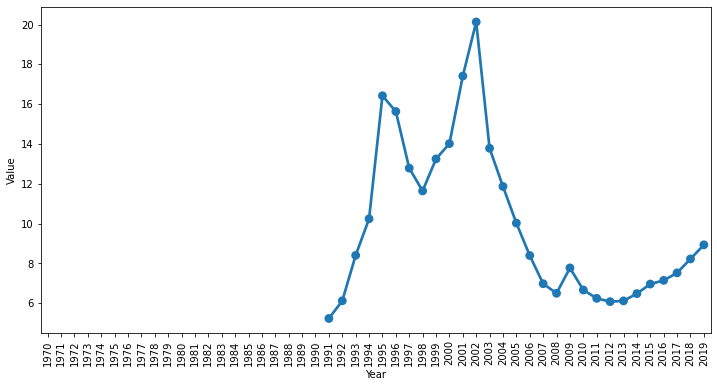

In [ ]:
# Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)
# SL.UEM.TOTL.MA.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.MA.ZS")])
plt.xticks(rotation = 90)

Se observa que para este Feature, los registros comienzan en el año 1991. Rellenaremos el año 1990 que falta, con el mismo valor que el registrado al año siguiente.

In [ ]:
new_val = data_ARG.loc[(data_ARG.ICod == "SL.UEM.TOTL.MA.ZS") & (data_ARG.Year == 1991), "Value"].unique()
data_ARG_imp.at[(data_ARG_imp.ICod == "SL.UEM.TOTL.MA.ZS") & (data_ARG_imp.Year == 1990), "Value"] = new_val

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

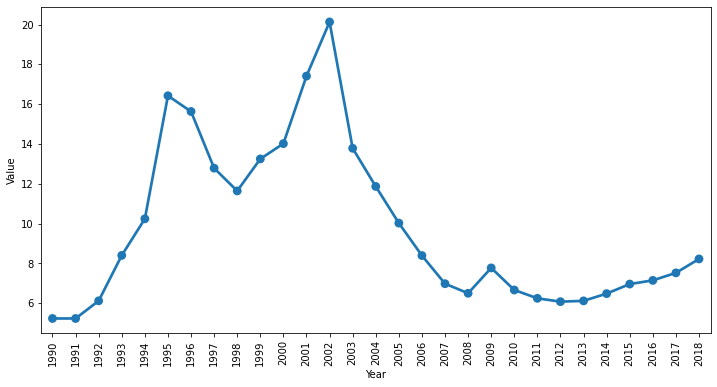

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.MA.ZS"])
plt.xticks(rotation = 90)

##### Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

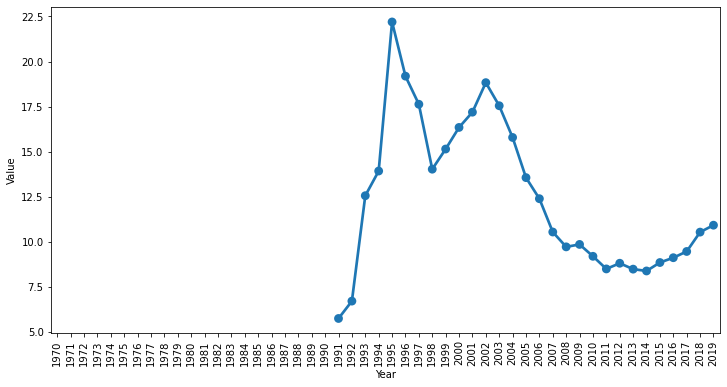

In [ ]:
# Desempleo, mujeres (% de la población activa masculina) (estimación modelado OIT)
# SL.UEM.TOTL.FE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.FE.ZS")])
plt.xticks(rotation = 90)

Se observa que para este Feature, los registros comienzan en el año 1991. Rellenaremos el año 1990 que falta, con el mismo valor que el registrado al año siguiente.

In [ ]:
new_val = data_ARG.loc[(data_ARG.ICod == "SL.UEM.TOTL.FE.ZS") & (data_ARG.Year == 1991), "Value"].unique()
data_ARG_imp.at[(data_ARG_imp.ICod == "SL.UEM.TOTL.FE.ZS") & (data_ARG_imp.Year == 1990), "Value"] = new_val

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

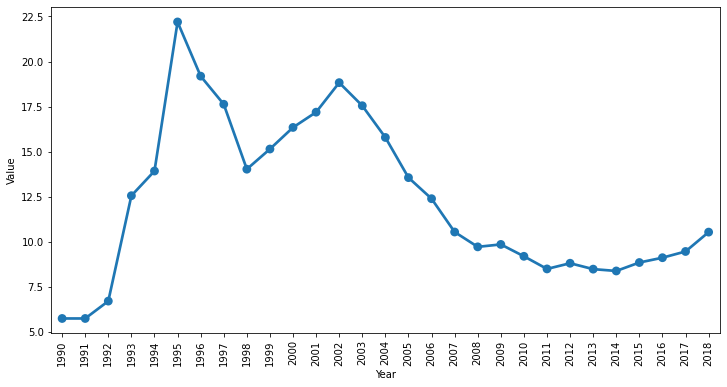

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.FE.ZS"])
plt.xticks(rotation = 90)

##### - Inscripción escolar, nivel primario (% bruto)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

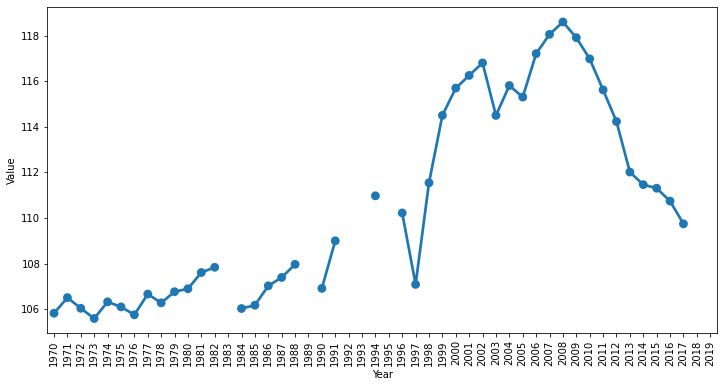

In [ ]:
# Inscripción escolar, nivel primario (% bruto)
# SE.PRM.ENRR

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRR")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos e intermitentes. Los rellenaremos con la función `interpolate`, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRR")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRR"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

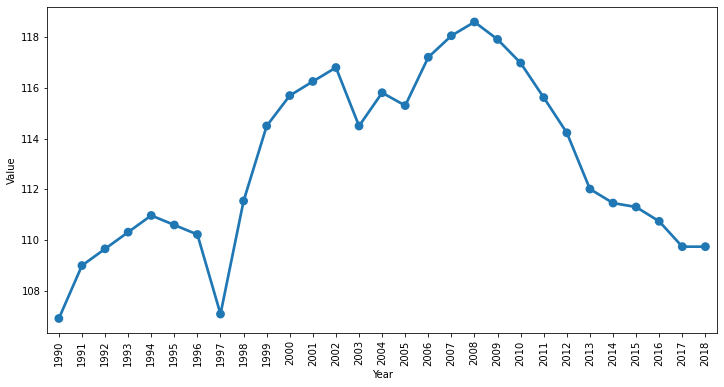

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRR"])
plt.xticks(rotation = 90)

##### - Inscripción escolar, nivel primario, varones (% bruto)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

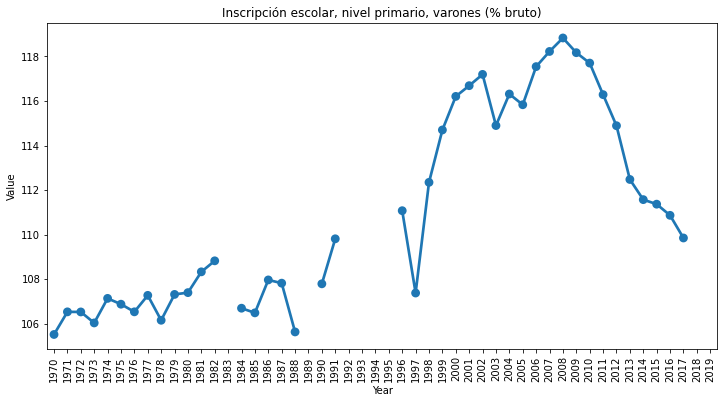

In [ ]:
# Inscripción escolar, nivel primario, varones (% bruto)
# SE.PRM.ENRR.MA

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRR.MA")])
plt.title(dataset[dataset.ICod == "SE.PRM.ENRR.MA"].Feat.unique()[0])
plt.xticks(rotation = 90)

Se observa que la variable posee una tendencia ascendente desde 1970. Bajo ese criterio, imputamos con la función `interpolate`  con método cuadrático para rellenar los datos faltantes desde 1990.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRR.MA")].interpolate(method = "quadratic").interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRR.MA"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

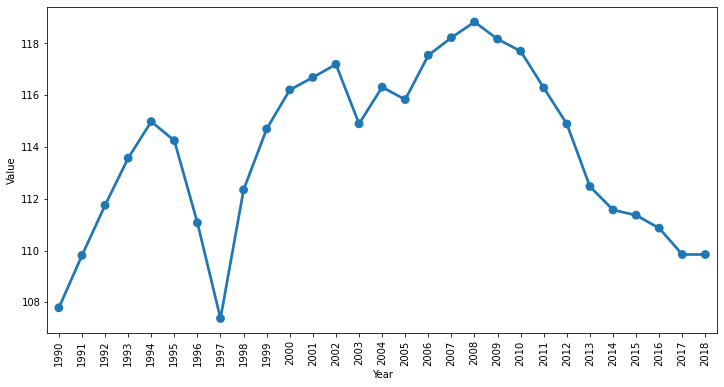

In [ ]:
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRR.MA"])
plt.xticks(rotation = 90)

##### - Inscripción escolar, nivel primario, mujeres (% bruto)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

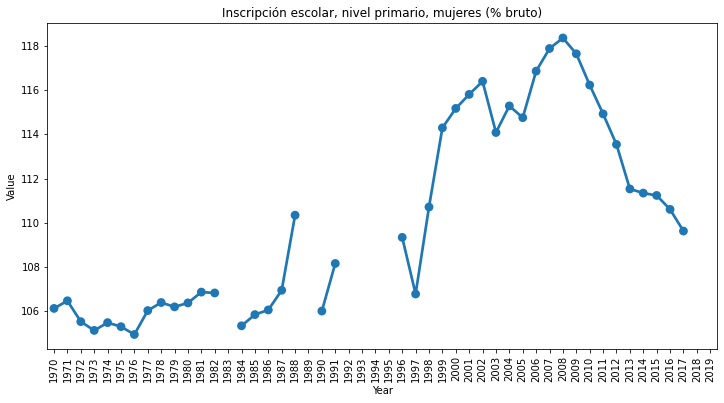

In [ ]:
# Inscripción escolar, nivel primario, mujeres (% bruto)
# SE.PRM.ENRR.FE

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRR.FE")])
plt.title(dataset[dataset.ICod == "SE.PRM.ENRR.FE"].Feat.unique()[0])
plt.xticks(rotation = 90)

Se observa que la variable posee una tendencia ascendente desde 1970. Bajo ese criterio, imputamos con la función `interpolate` con método cuadrático para rellenar los datos faltantes desde 1990

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRR.FE")].interpolate(method = "quadratic").interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRR.FE"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

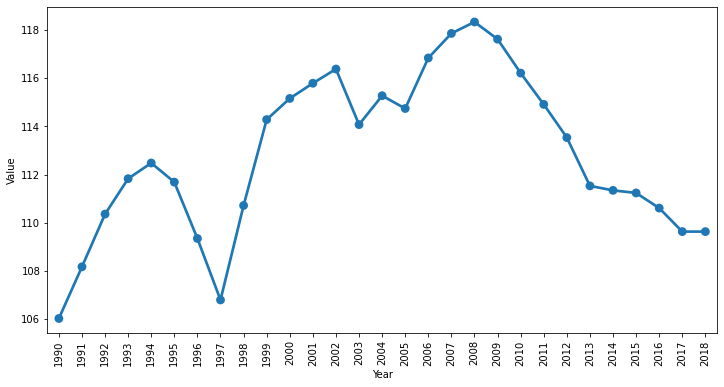

In [ ]:
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRR.FE"])
plt.xticks(rotation = 90)

##### - Educación de nivel secundario, alumnos en programas de educación general

Dado que para este Feature los datos faltantes son de varios años seguidos, analizaremos sus valores antes de 1990 y para los países limítrofes con Argentina.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

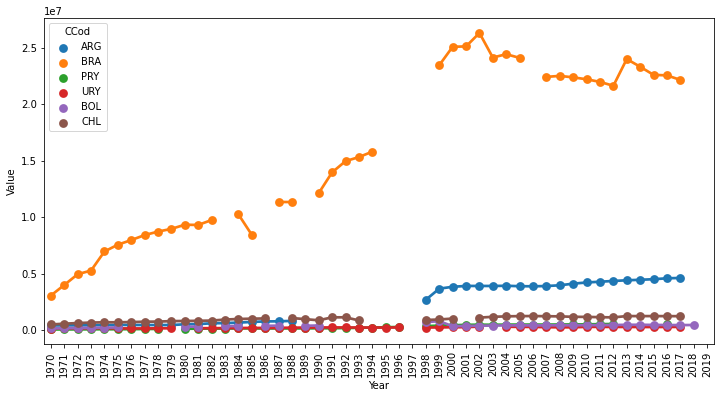

In [ ]:
# Educación de nivel secundario, alumnos en programas de educación general
# SE.SEC.ENRL.GC

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod.isin(["ARG", "URY", "PRY", "CHL", "BRA", "BOL"])) & (dataset.ICod == "SE.SEC.ENRL.GC")], hue = "CCod")
plt.xticks(rotation = 90)

Las curvas entre países no son comparables, porque el Feature describe valores absolutos propios de cada país ("número de alumnos"). Sólo para poder comparar tendencias, graficaremos las mismas curvas para cada país, pero a cada valor lo dividiremos por el valor medio del Feature de ese país en toda la línea temporal. De esta forma, se "estandarizan" los valores, y las curvas son comparables entre países.

In [ ]:
# Creamos una copia temporal ad-hoc del dataset
temporal_df = dataset.copy()

# Dividimos cada valor por la media de cada país de toda la línea temporal
for cc in dataset.CCod.unique():
  val = temporal_df.loc[(dataset.ICod == "SE.SEC.ENRL.GC") & (dataset.CCod == cc), "Value"]
  mean_val = temporal_df.loc[(dataset.ICod == "SE.SEC.ENRL.GC") & (dataset.CCod == cc), "Value"].mean()
  temporal_df.loc[(dataset.ICod == "SE.SEC.ENRL.GC") & (dataset.CCod == cc), "Value"] = val / mean_val

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

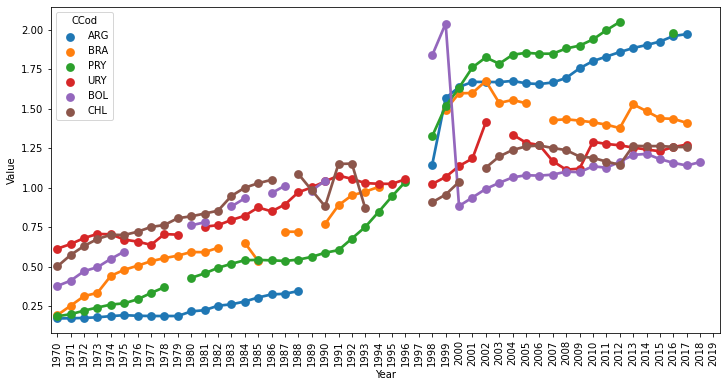

In [ ]:
# Graficamos las curvas estandarizadas

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = temporal_df[(temporal_df.CCod.isin(["ARG", "URY", "PRY", "CHL", "BRA", "BOL"])) & (temporal_df.ICod == "SE.SEC.ENRL.GC")], hue = "CCod")
plt.xticks(rotation = 90)

Al analizar los gráficos para este Feature para otros países de la región, como Brasil, Perú, Chile, Paraguay y Uruguay, se observa una tendencia ascendente (aunque variable por país) en los años en los que hay valores faltantes para Argentina (1989-1997). Llama la atención la curva para Paraguay (curva verde), la cual es muy similar a la de Argentina. Por lo tanto, siguiendo este criterio, rellenaremos los datos faltantes con la función `interpolate`, aplicando una regresión lineal, lo cual debería rellenar los valores faltantes con valores cada vez más altos, hasta llegar a 1998. Además, rellenaremos el valor faltante en 2018, repitiendo el valor obtenido en 2017.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.SEC.ENRL.GC")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.SEC.ENRL.GC"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

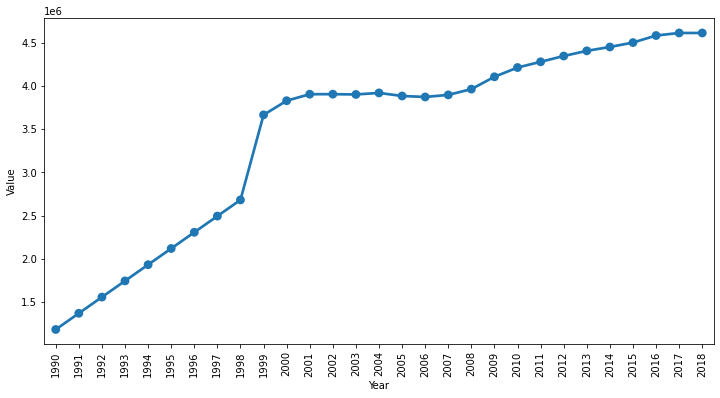

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.SEC.ENRL.GC"])
plt.xticks(rotation = 90)

##### Educación de nivel secundario, alumnos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

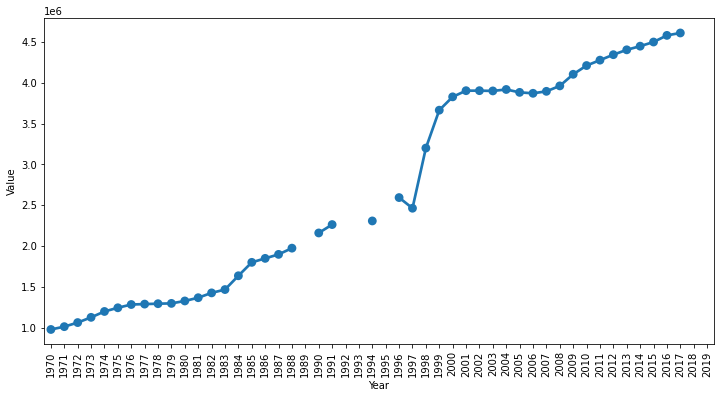

In [ ]:
# Educación de nivel secundario, alumnos
# SE.SEC.ENRL

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.SEC.ENRL")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos e intermitentes. Los rellenaremos con la función `interpolate`, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.SEC.ENRL")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.SEC.ENRL"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

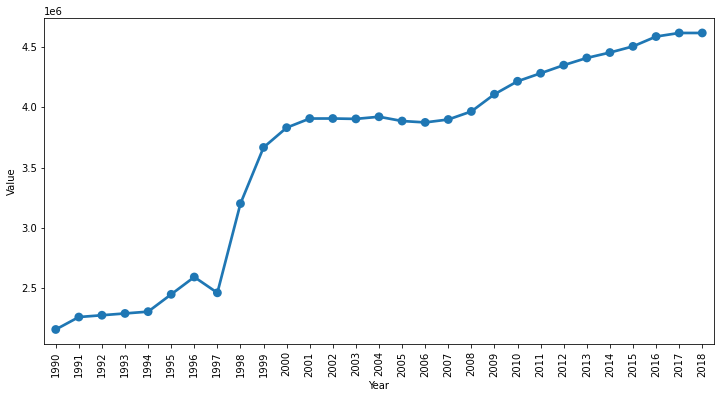

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.SEC.ENRL"])
plt.xticks(rotation = 90)

##### - Educación de nivel primario, alumnos

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

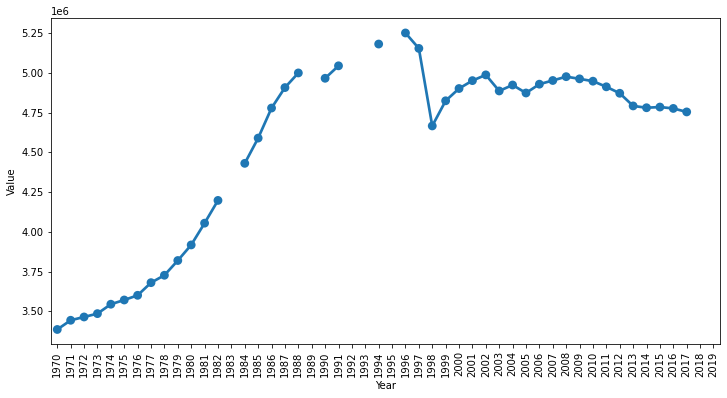

In [ ]:
# Educación de nivel primario, alumnos
# SE.PRM.ENRL

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRL")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos e intermitentes. Los rellenaremos con la función `interpolate`, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRL")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRL"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

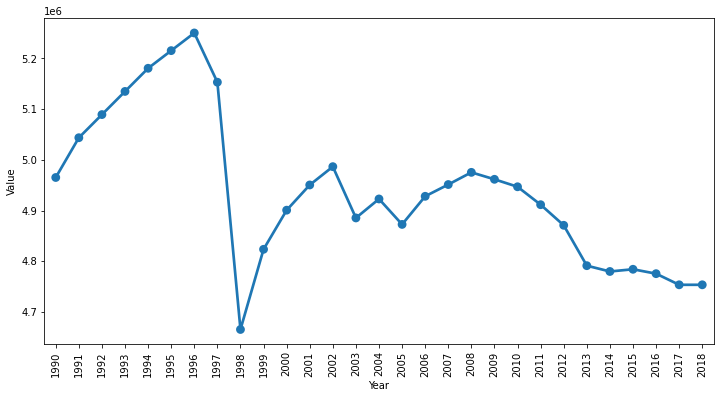

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRL"])
plt.xticks(rotation = 90)

##### Educación de nivel primario, alumnos (% de mujeres)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

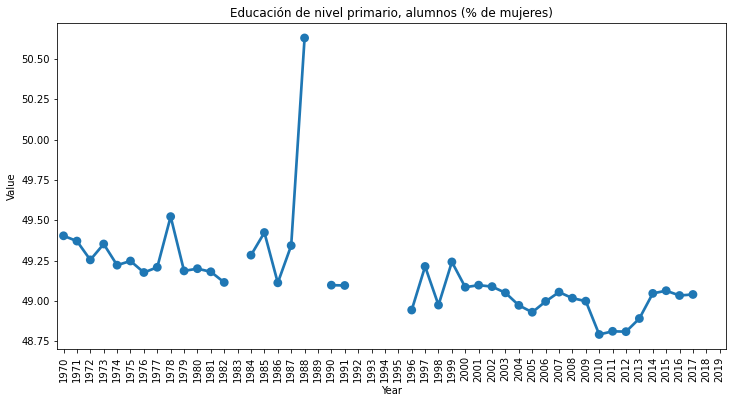

In [ ]:
# Educación de nivel primario, alumnos (% de mujeres)
# SE.PRM.ENRL.FE.ZS
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRL.FE.ZS")])
plt.title(dataset[dataset.ICod == "SE.PRM.ENRL.FE.ZS"].Feat.unique()[0])
plt.xticks(rotation = 90)

Se observa que, con excepción del pico observado en el año 1988, la tendencia es levemente descendente. Entonces, utilizaremos la función `interpolate` para aplicar una regresión lineal, y rellenar los datos faltantes entre 1992 y 1995.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.ENRL.FE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRL.FE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

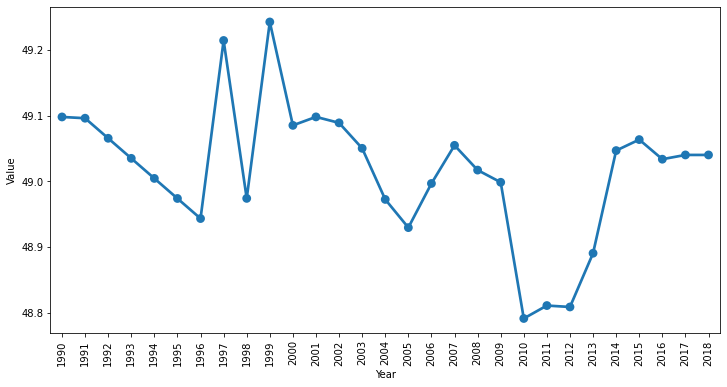

In [ ]:
# Graficamos el feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.ENRL.FE.ZS"])
plt.xticks(rotation = 90)

##### - Inscripción escolar, nivel preprimario (% bruto)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

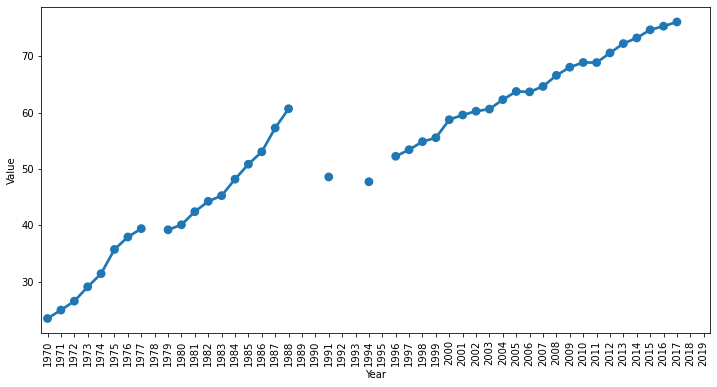

In [ ]:
# Inscripción escolar, nivel preprimario (% bruto)
# SE.PRE.ENRR

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRE.ENRR")])
plt.xticks(rotation = 90)

Si bien hay una franja tempioral considerable con valores nulos, hay 2 años (1991 y 1994) con dato. A partir de estos puede utilizarse la función `interpolate` para rellenar los datos faltantes a partir de 1990. 

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRE.ENRR")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SE.PRE.ENRR"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

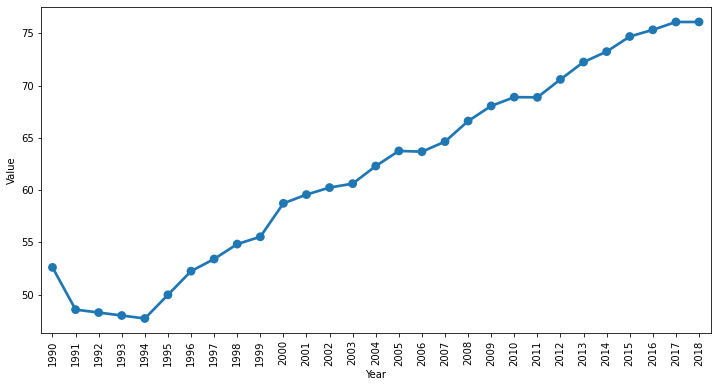

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRE.ENRR"])
plt.xticks(rotation = 90)

##### - Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)

(0.98, 1.01)

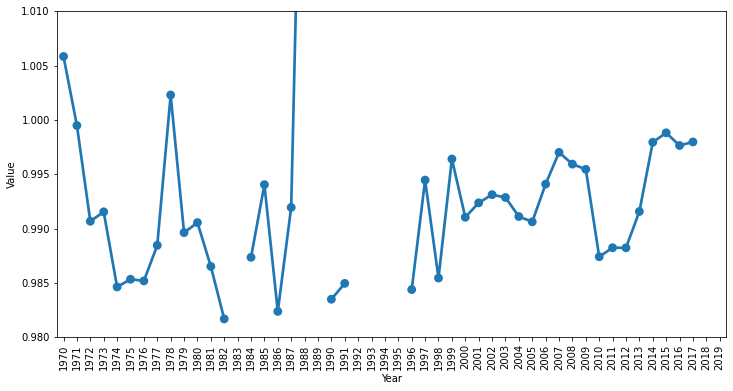

In [ ]:
# Proporción de inscripciones de mujeres con respecto a varones en la educación primaria (%)
# SE.ENR.PRIM.FM.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.ENR.PRIM.FM.ZS")])
plt.xticks(rotation = 90)
plt.ylim((0.98, 1.01))

Se observa que, a pesar el pico (que se va de escala) en 1988, al analizar toda la línea temporal, no se observan tendencias ascendentes o descendentes. Si además analizamos el gráfico de caja y las medidas de resumen correspondientes con este Feature, se observa que la distribución de sus valores tiende a normal (la media y la mediana coinciden). Proponemos entonces, rellenar los valores faltantes entre 1992 y 1995 con el valor medio de toda la línea temporal (desde 1970 a 2019). Por otro lado, proponemos rellenar el valor faltante en 2018 repitiendo el valor obtenido en 2017.

In [ ]:
# Obtenemos la media
media = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.ENR.PRIM.FM.ZS")].Value.mean()
data_ARG_imp.loc[(data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS") & 
                 (data_ARG_imp.Indi == "Education") &
                 (data_ARG_imp.Year > 1991) & 
                 (data_ARG_imp.Year < 1996), "Value"] = media
tmp_df = data_ARG_imp[(data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS") & (data_ARG_imp.Indi == "Education")].interpolate()
data_ARG_imp[(data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS") & (data_ARG_imp.Indi == "Education")] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

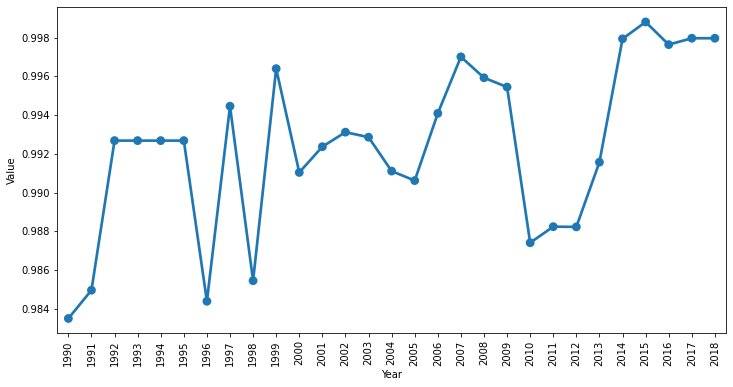

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.ENR.PRIM.FM.ZS"])
plt.xticks(rotation = 90)

##### Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

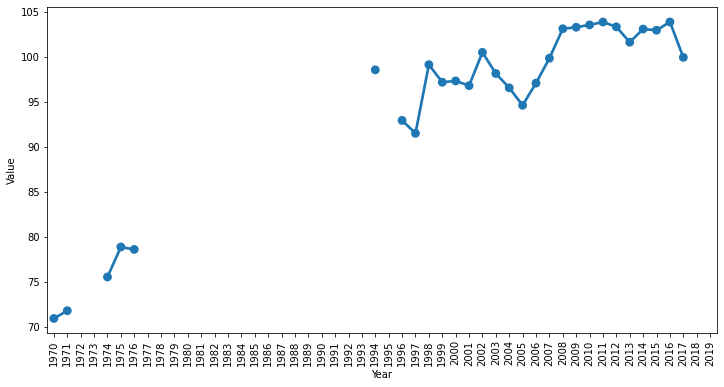

In [ ]:
# Tasa de finalización de la educación de nivel primario, total (% del grupo etario correspondiente)
# SE.PRM.CMPT.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SE.PRM.CMPT.ZS")])
plt.xticks(rotation = 90)

A continuación, observamos las tendencias para esta Feature en los países limítrofes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

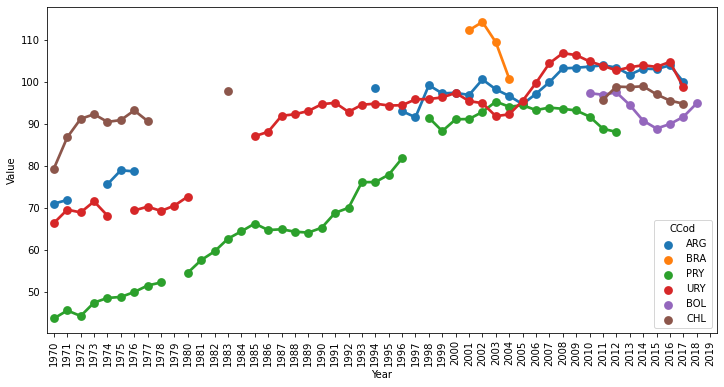

In [ ]:
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod.isin(["ARG", "URY", "PRY", "CHL", "BRA", "BOL"])) & 
                                                      (dataset.ICod == "SE.PRM.CMPT.ZS")], hue = "CCod")
plt.xticks(rotation = 90)

Llama la atención la similitud en las tendencias entre Argentina y Uruguay a partir del año 1995/1996. Siguiendo esta lógica, rellenaremos los datos faltantes de Argentina para los años 1990, 1991, 1992, 1993 y 1995 con los valores encontrados para Uruguay.

> Bloque con sangría



In [ ]:
for ii in [1990, 1991, 1992, 1993, 1995]:
  new_val = dataset.loc[(dataset.ICod == "SE.PRM.CMPT.ZS") & 
                      (dataset.Year == ii) & 
                      (dataset.CCod == "URY"), "Value"].unique()
  data_ARG_imp.loc[(data_ARG_imp.ICod == "SE.PRM.CMPT.ZS") & (data_ARG_imp.Year == ii), "Value"] = new_val

tmp_df = data_ARG_imp.loc[data_ARG_imp.ICod == "SE.PRM.CMPT.ZS", "Value"].interpolate()
data_ARG_imp.loc[data_ARG_imp.ICod == "SE.PRM.CMPT.ZS", "Value"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

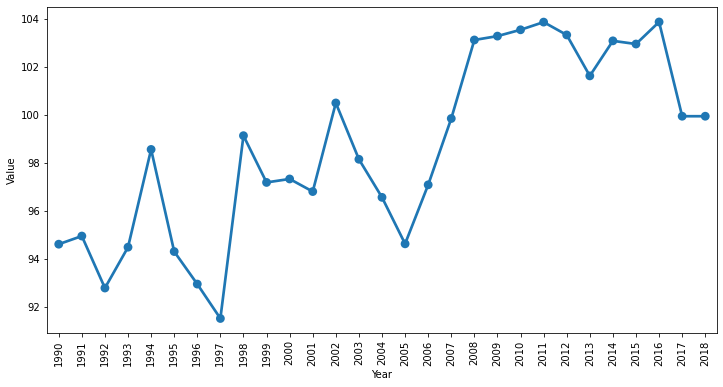

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SE.PRM.CMPT.ZS"])
plt.xticks(rotation = 90)

In [ ]:
#Chequeo el dataset data_ARG por valores nulos
i=1
for ft in data_ARG_imp[data_ARG_imp.Indi == "Education"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG_imp[data_ARG_imp.Feat == ft].Value.isna().any(), data_ARG_imp[data_ARG_imp.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: False ['SP.POP.1564.TO.ZS'] Población entre 15 y 64 años de edad (% del total)
2 ¿posee valores NA?: False ['SP.POP.0014.TO.ZS'] Población entre 0 y 14 años de edad (% del total)
3 ¿posee valores NA?: False ['SL.UEM.TOTL.MA.ZS'] Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)
4 ¿posee valores NA?: False ['SL.UEM.TOTL.FE.ZS'] Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)
5 ¿posee valores NA?: False ['SL.TLF.TOTL.IN'] Población activa, total
6 ¿posee valores NA?: False ['SE.SEC.ENRL.GC'] Educación de nivel secundario, alumnos en programas de educación general
7 ¿posee valores NA?: False ['SE.SEC.ENRL'] Educación de nivel secundario, alumnos
8 ¿posee valores NA?: False ['SE.PRM.ENRR.MA'] Inscripción escolar, nivel primario, varones (% bruto)
9 ¿posee valores NA?: False ['SE.PRM.ENRR.FE'] Inscripción escolar, nivel primario, mujeres (% bruto)
10 ¿posee valores NA?: False ['SE.PRM.ENRR'] Inscripción e

#### Protección social

##### Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

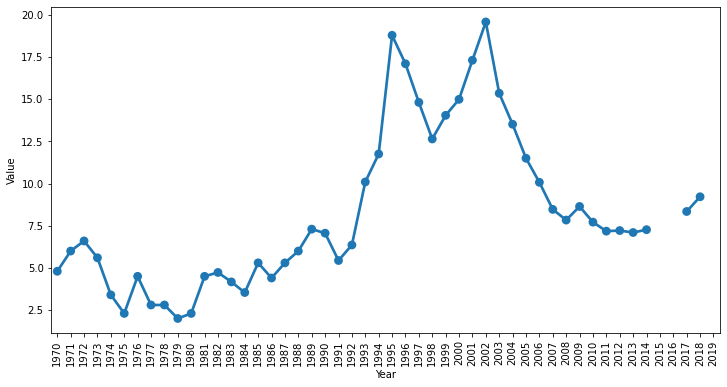

In [ ]:
# Desempleo, total (% de participación total en la fuerza laboral) (estimación nacional)
# SL.UEM.TOTL.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos, correspondientes a los años 2015 y 2016. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

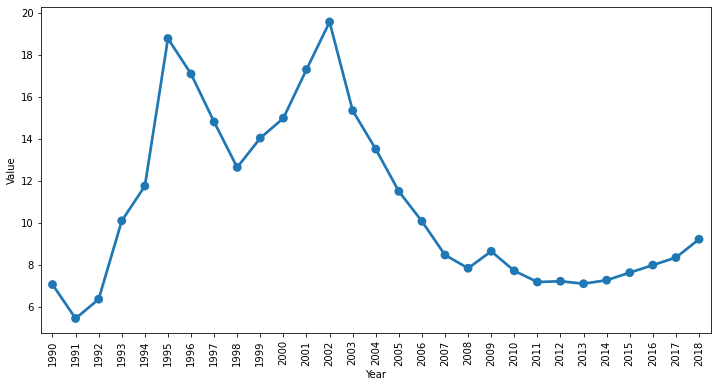

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.NE.ZS"])
plt.xticks(rotation = 90)

##### Desempleo, varones (% de participación masculina en la fuerza laboral) (estimación nacional)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

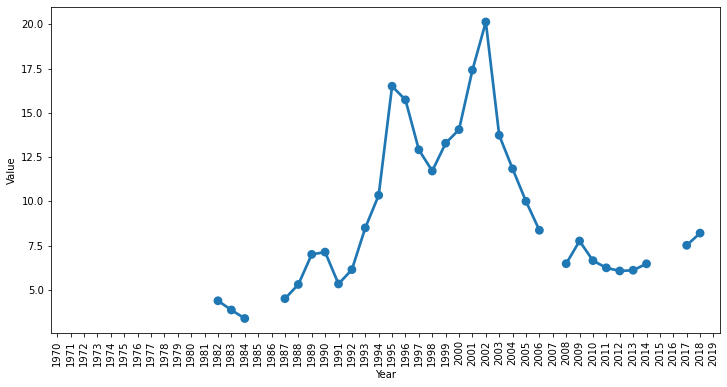

In [ ]:
# Desempleo, varones (% de participación masculina en la fuerza laboral) (estimación nacional)
# SL.UEM.TOTL.MA.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.MA.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos e intermitentes para el intervalo de tiempo de interés. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.MA.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.MA.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

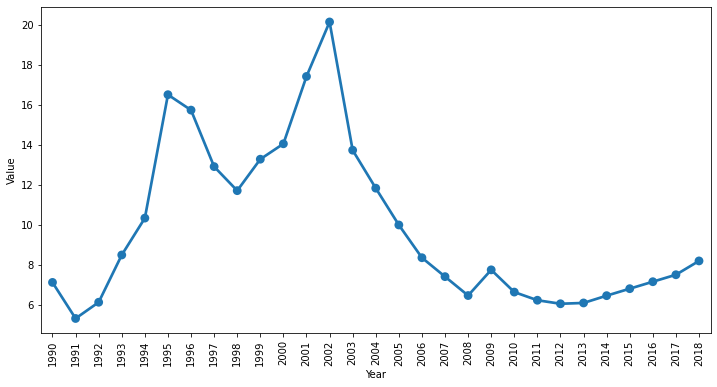

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.MA.NE.ZS"])
plt.xticks(rotation = 90)

##### Desempleo, mujeres (% de participación femenina en la fuerza laboral) (estimación nacional)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

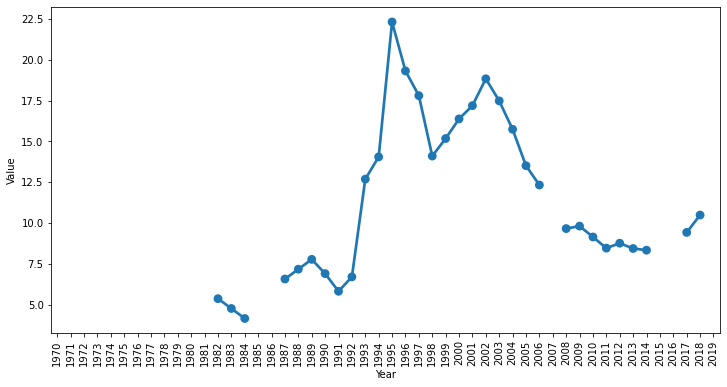

In [ ]:
# Desempleo, mujeres (% de participación femenina en la fuerza laboral) (estimación nacional)
# SL.UEM.TOTL.FE.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.FE.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos e intermitentes, para el intervalo de tiempo de interés. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.UEM.TOTL.FE.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.FE.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

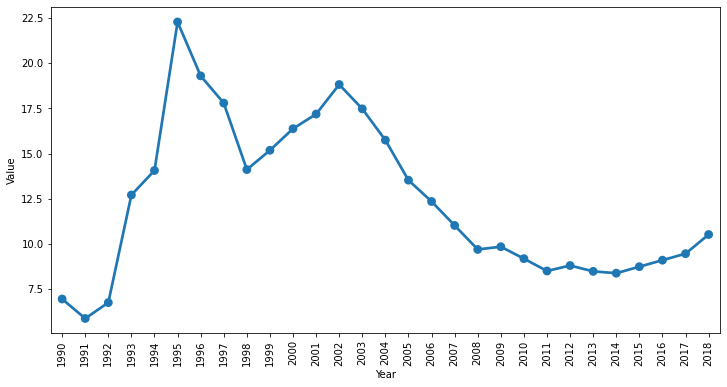

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.UEM.TOTL.FE.NE.ZS"])
plt.xticks(rotation = 90)

##### Tasa de participación en la fuerza laboral, total (% de la población total mayor de 15 años) (estimación nacional)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

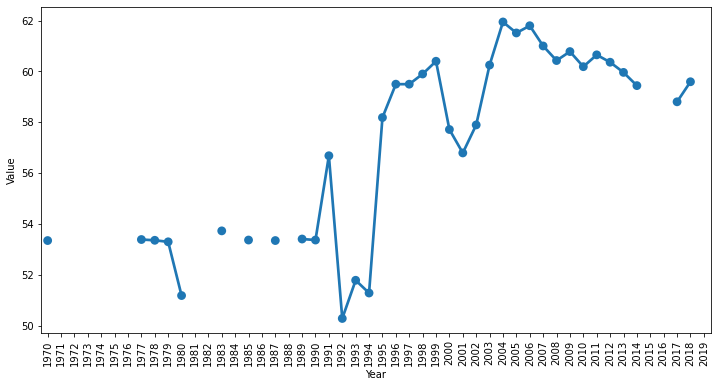

In [ ]:
# Tasa de participación en la fuerza laboral, total (% de la población total mayor de 15\xa0años) (estimación nacional)
# SL.TLF.CACT.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos para el intervalo de tiempo de interés, presentandose en 2015 y 2016. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

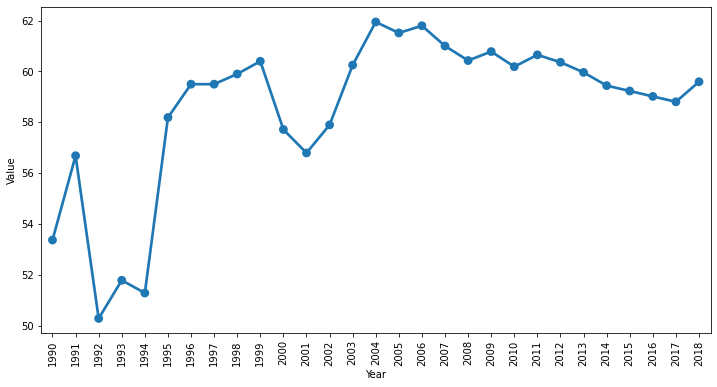

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.NE.ZS"])
plt.xticks(rotation = 90)

##### Tasa de participación en la fuerza laboral, varones (% de la población masculina mayor de 15 años)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

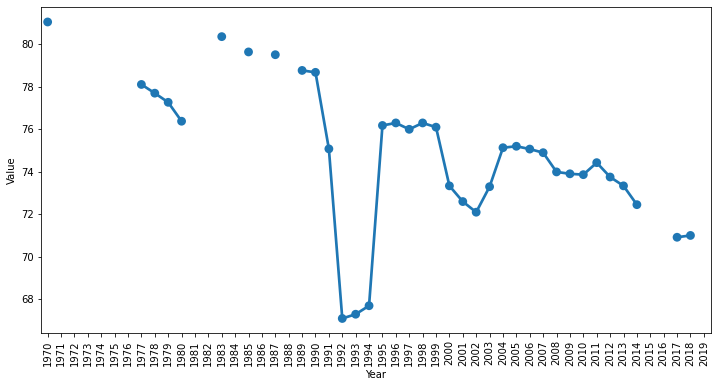

In [ ]:
# Tasa de participación en la fuerza laboral, varones (% de la población masculina mayor de 15\xa0años) (estimación nacional)
# SL.TLF.CACT.MA.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.MA.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos para el intervalo de tiempo de interés, presentandose en 2015 y 2016. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.MA.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.MA.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

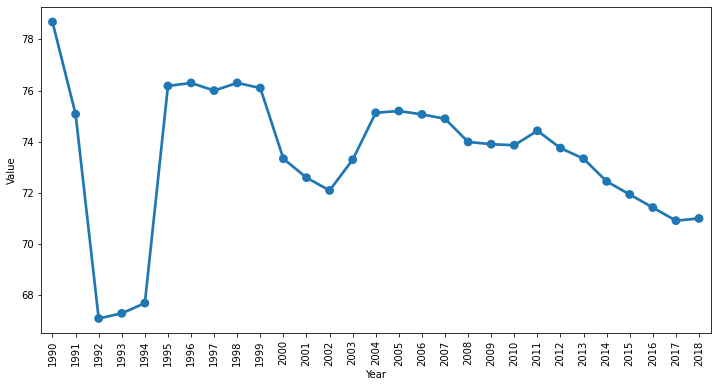

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.MA.NE.ZS"])
plt.xticks(rotation = 90)

##### Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

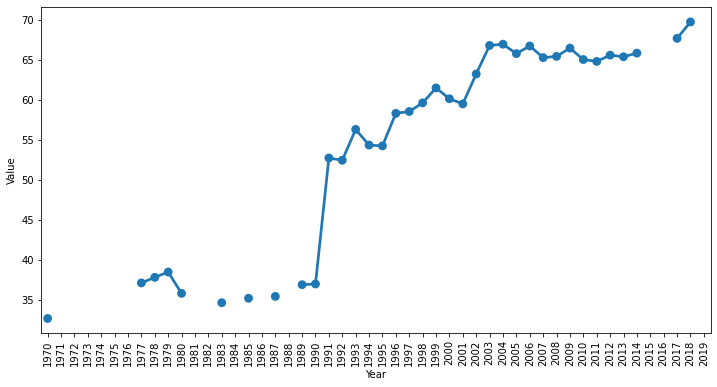

In [ ]:
# Proporción de participación en la fuerza laboral de mujeres y varones (%) (estimación nacional)
# SL.TLF.CACT.FM.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.FM.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos para el intervalo de tiempo de interés, presentandose en 2015 y 2016. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.FM.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.FM.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

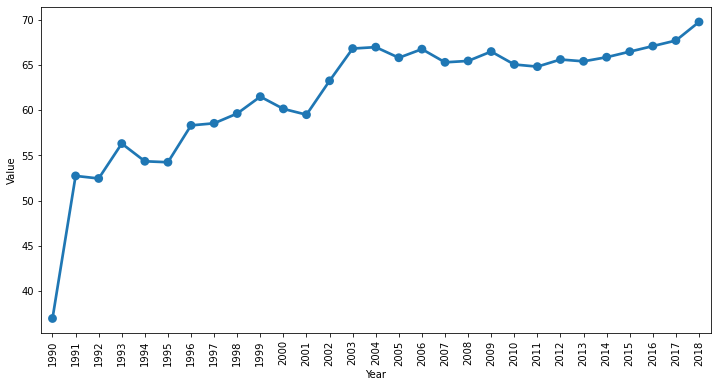

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.FM.NE.ZS"])
plt.xticks(rotation = 90)

##### Tasa de participación en la fuerza laboral, mujeres (% de la población femenina mayor de 15 años) (estimación nacional)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

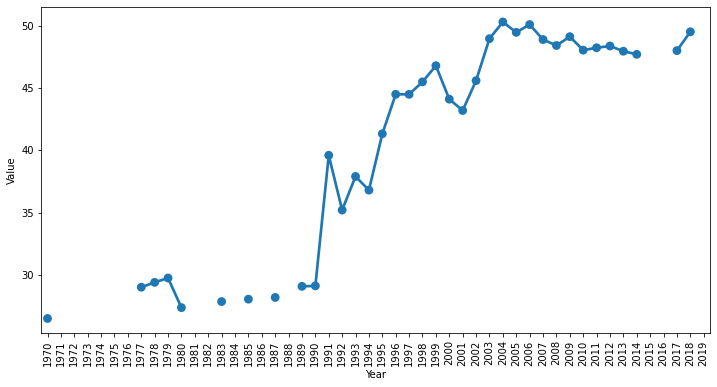

In [ ]:
# Tasa de participación en la fuerza laboral, mujeres (% de la población femenina mayor de 15\xa0años) (estimación nacional)
# SL.TLF.CACT.FE.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.FE.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos para el intervalo de tiempo de interés, presentandose en 2015 y 2016. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.FE.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.FE.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

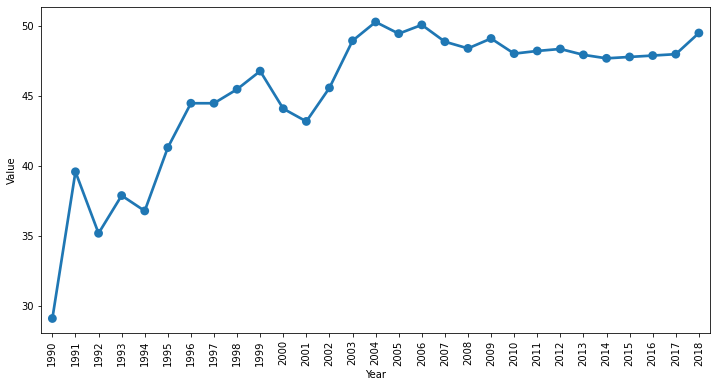

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.FE.NE.ZS"])
plt.xticks(rotation = 90)

##### Tasa de participación en la fuerza laboral, mujeres (% de la población femenina mayor de 15 años) (estimación nacional)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

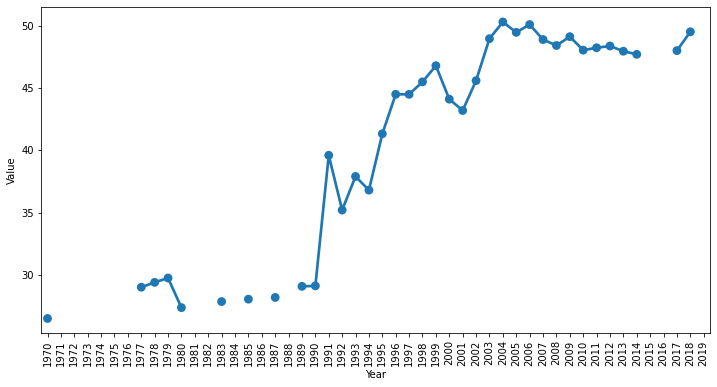

In [ ]:
# Tasa de participación en la fuerza laboral, mujeres (% de la población femenina mayor de 15\xa0años) (estimación nacional)
# SL.TLF.CACT.FE.NE.ZS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.FE.NE.ZS")])
plt.xticks(rotation = 90)

Los valores faltantes son pocos para el intervalo de tiempo de interés, presentandose en 2015 y 2016. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SL.TLF.CACT.FE.NE.ZS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.FE.NE.ZS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

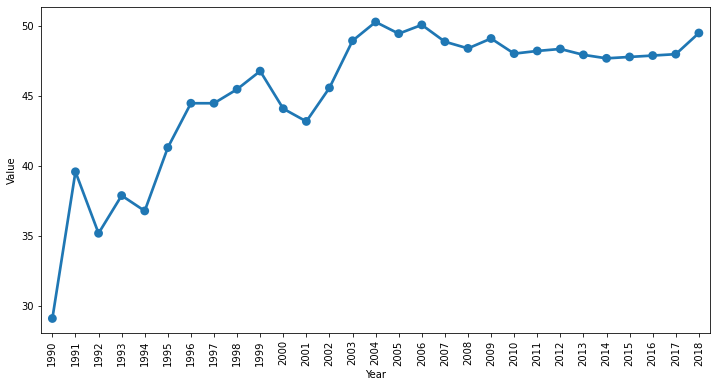

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SL.TLF.CACT.FE.NE.ZS"])
plt.xticks(rotation = 90)

Para el resto de los Features de este indicador, no hay presencia de valores nulos para el período de interés.

In [ ]:
#Chequeo el dataset data_ARG_imp por valores nulos
i=1
for cod in data_ARG_imp[data_ARG_imp.Indi == "Social_protection"].ICod.unique():
 print(i,"¿posee valores NA?:",data_ARG_imp[data_ARG_imp.ICod == cod].Value.isna().any(), cod)
 i=i+1

1 ¿posee valores NA?: False SL.UEM.TOTL.NE.ZS
2 ¿posee valores NA?: False SL.UEM.TOTL.MA.NE.ZS
3 ¿posee valores NA?: False SL.UEM.TOTL.FE.NE.ZS
4 ¿posee valores NA?: False SL.TLF.CACT.NE.ZS
5 ¿posee valores NA?: False SL.TLF.CACT.MA.NE.ZS
6 ¿posee valores NA?: False SL.TLF.CACT.FM.ZS
7 ¿posee valores NA?: False SL.TLF.CACT.FM.NE.ZS
8 ¿posee valores NA?: False SL.TLF.CACT.FE.ZS
9 ¿posee valores NA?: False SL.TLF.CACT.FE.NE.ZS
10 ¿posee valores NA?: False SL.TLF.ACTI.ZS
11 ¿posee valores NA?: False SL.TLF.ACTI.MA.ZS
12 ¿posee valores NA?: False SL.TLF.ACTI.FE.ZS
13 ¿posee valores NA?: False SL.TLF.ACTI.1524.ZS
14 ¿posee valores NA?: False SL.TLF.ACTI.1524.MA.ZS
15 ¿posee valores NA?: False SL.TLF.ACTI.1524.FE.ZS


#### Pobreza

In [ ]:
#Chequeo el dataset data_ARG_imp por valores nulos
i=1
for ft in data_ARG_imp[data_ARG_imp.Indi == "Poverty"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG_imp[data_ARG_imp.Feat == ft].Value.isna().any(), data_ARG_imp[data_ARG_imp.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: True ['SI.POV.UMIC.GP'] Poverty gap at $5.50 a day (2011 PPP) (%)
2 ¿posee valores NA?: True ['SI.POV.UMIC'] Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
3 ¿posee valores NA?: True ['SI.POV.LMIC.GP'] Poverty gap at $3.20 a day (2011 PPP) (%)
4 ¿posee valores NA?: True ['SI.POV.LMIC'] Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)
5 ¿posee valores NA?: True ['SI.POV.GINI'] Índice de Gini
6 ¿posee valores NA?: True ['SI.POV.GAPS'] Brecha de pobreza a $1,90 por día (2011 PPA) (%)
7 ¿posee valores NA?: True ['SI.POV.DDAY'] Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)
8 ¿posee valores NA?: True ['SI.DST.FRST.20'] Participación en el ingreso del 20% peor remunerado de la población
9 ¿posee valores NA?: True ['SI.DST.FRST.10'] Participación en el ingreso del 10% peor remunerado de la población
10 ¿posee valores NA?: True ['SI.DST.10TH.10'] Participación en el ingreso del 10% me

##### Poverty gap at $5.50 a day (2011 PPP) (%)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

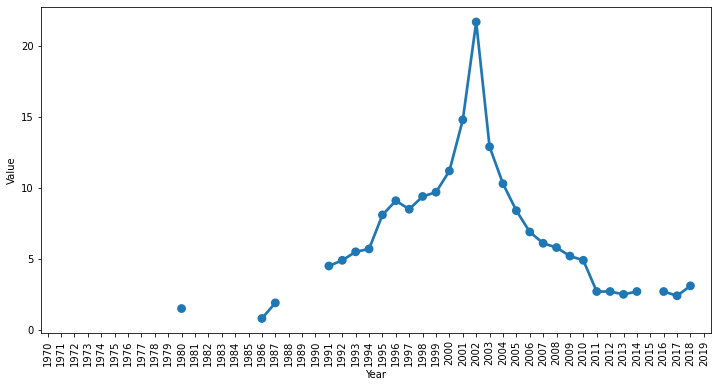

In [ ]:
# Poverty gap at $5.50 a day (2011 PPP) (%)
# SI.POV.UMIC.GP

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.UMIC.GP")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.UMIC.GP")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.POV.UMIC.GP"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

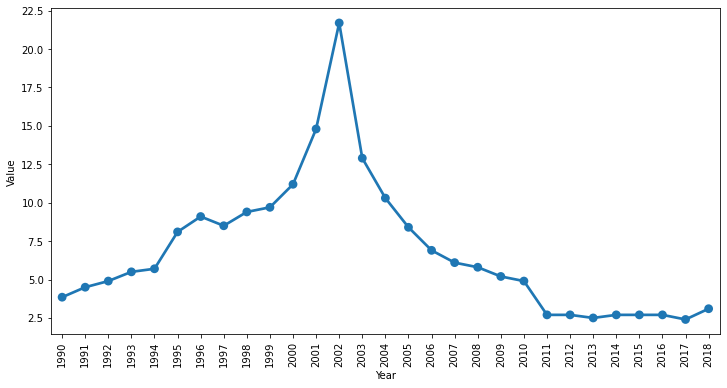

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.POV.UMIC.GP"])
plt.xticks(rotation = 90)

##### Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

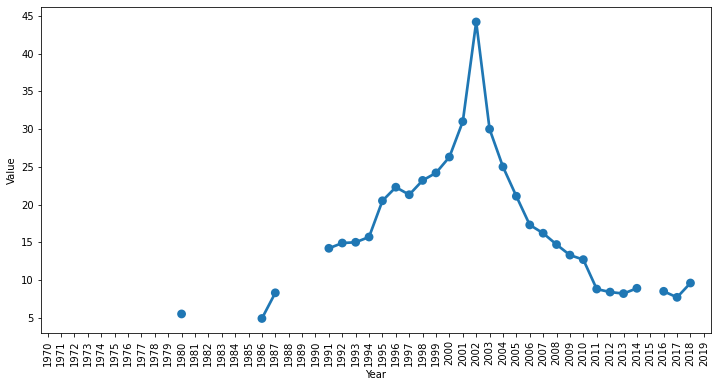

In [ ]:
# Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
# SI.POV.UMIC

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.UMIC")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.UMIC")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.POV.UMIC"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

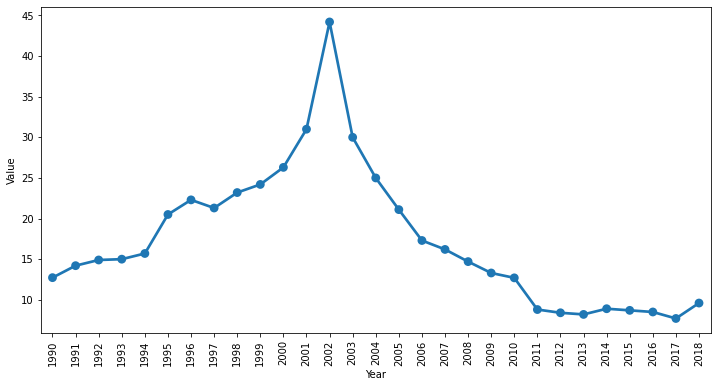

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.POV.UMIC"])
plt.xticks(rotation = 90)

##### Poverty gap at $3.20 a day (2011 PPP) (%)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

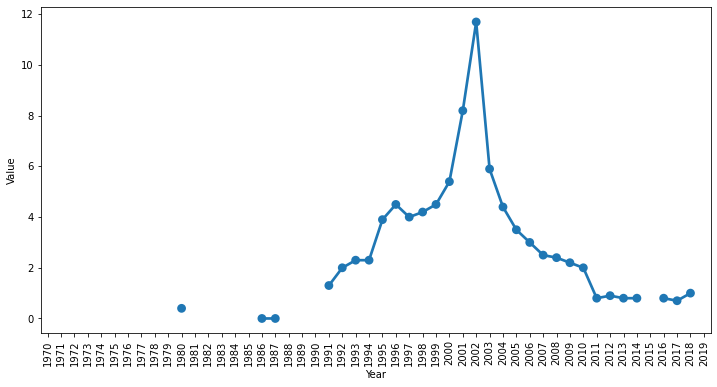

In [ ]:
# Poverty gap at $3.20 a day (2011 PPP) (%)
# SI.POV.LMIC.GP

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.LMIC.GP")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.LMIC.GP")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.POV.LMIC.GP"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

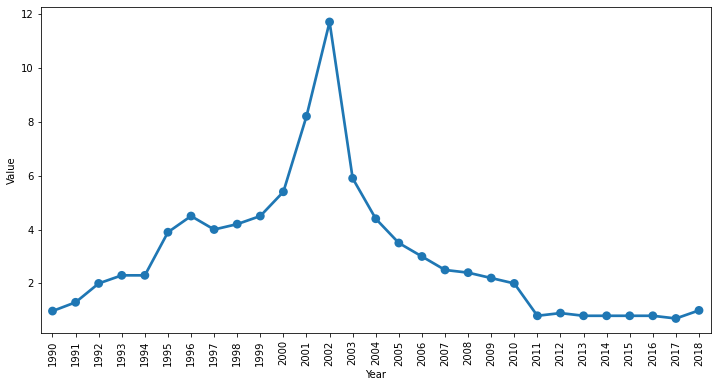

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.POV.LMIC.GP"])
plt.xticks(rotation = 90)

##### Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

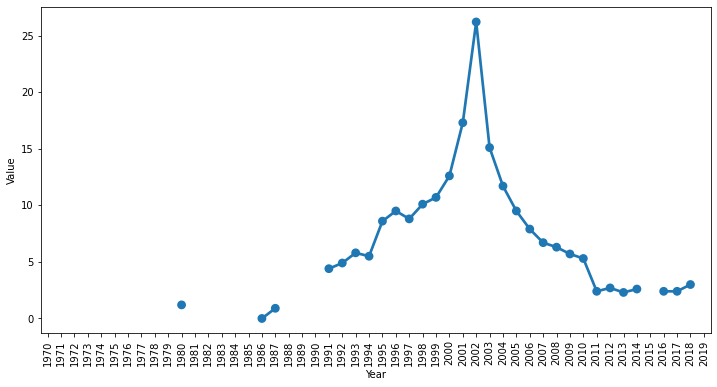

In [ ]:
# Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)
# SI.POV.LMIC

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.LMIC")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.LMIC")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.POV.LMIC"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

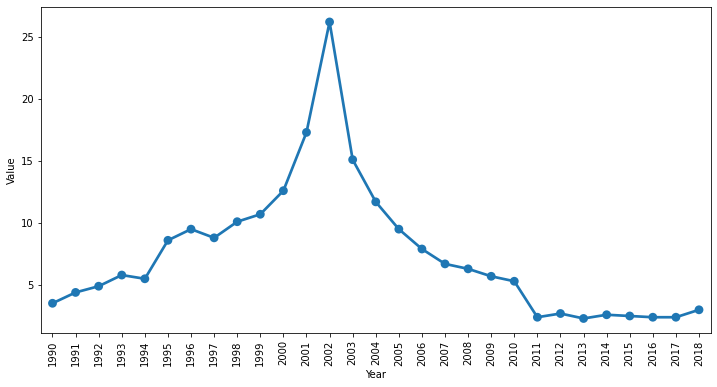

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.POV.LMIC"])
plt.xticks(rotation = 90)

##### Índice de Gini

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

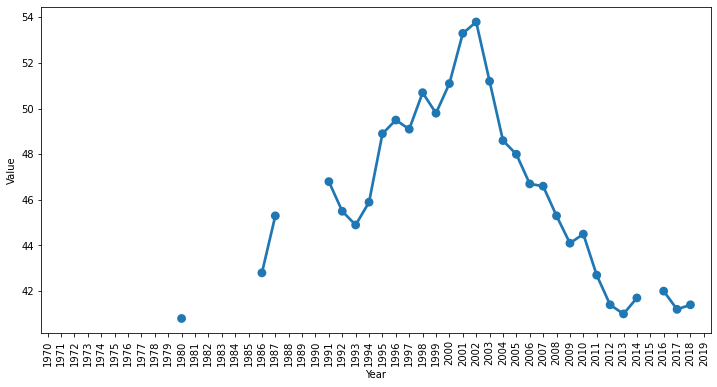

In [ ]:
# Índice de Gini
# SI.POV.GINI

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.GINI")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.GINI")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.POV.GINI"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

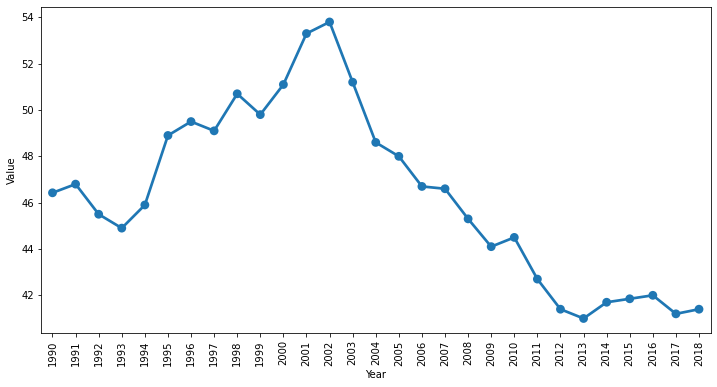

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.POV.GINI"])
plt.xticks(rotation = 90)

##### Brecha de pobreza a $1,90 por día (2011 PPA) (%)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

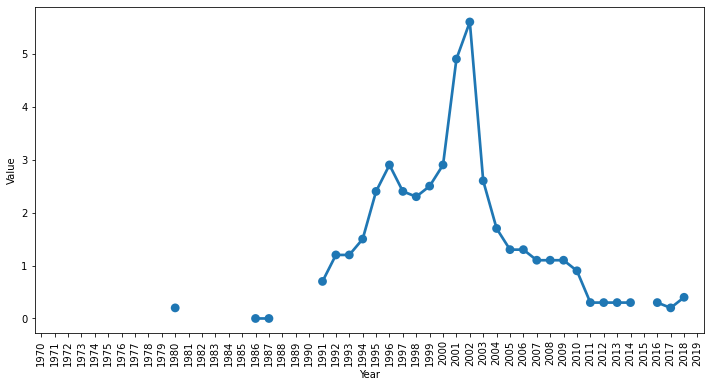

In [ ]:
# Brecha de pobreza a $1,90 por día (2011 PPA) (%)
# SI.POV.GAPS

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.GAPS")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.GAPS")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.POV.GAPS"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

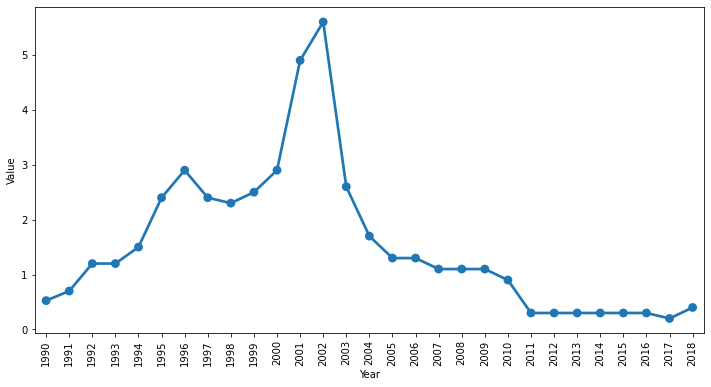

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.POV.GAPS"])
plt.xticks(rotation = 90)

##### Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

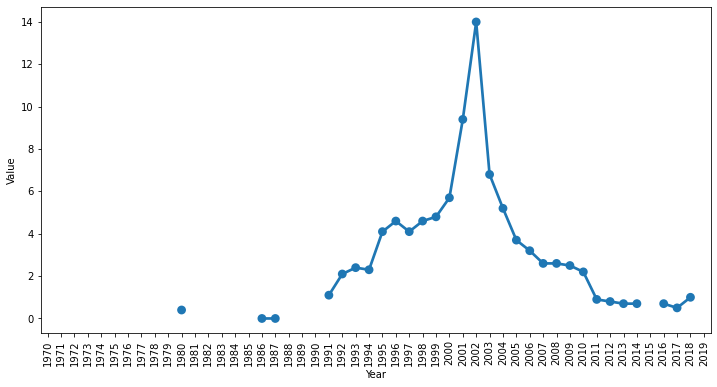

In [ ]:
# Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)
# SI.POV.DDAY

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.DDAY")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.POV.DDAY")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.POV.DDAY"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

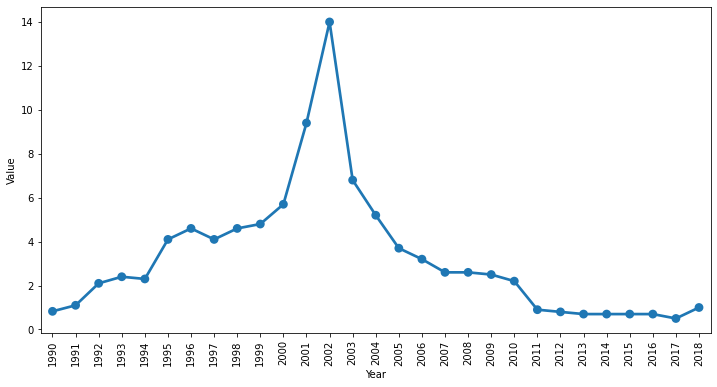

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.POV.DDAY"])
plt.xticks(rotation = 90)

##### Participación en el ingreso del 20% peor remunerado de la población

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

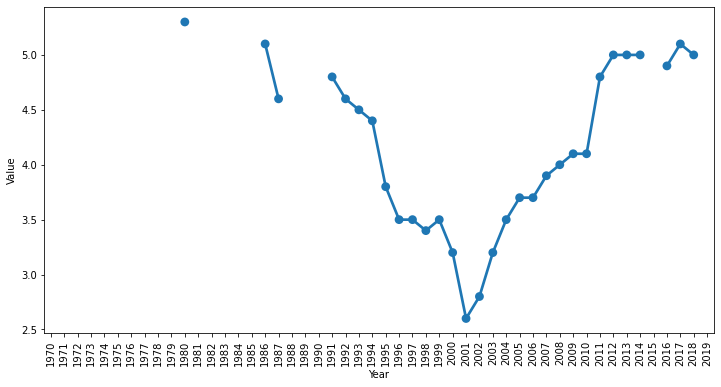

In [ ]:
# Participación en el ingreso del 20% peor remunerado de la población
# SI.DST.FRST.20

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.FRST.20")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.FRST.20")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.DST.FRST.20"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

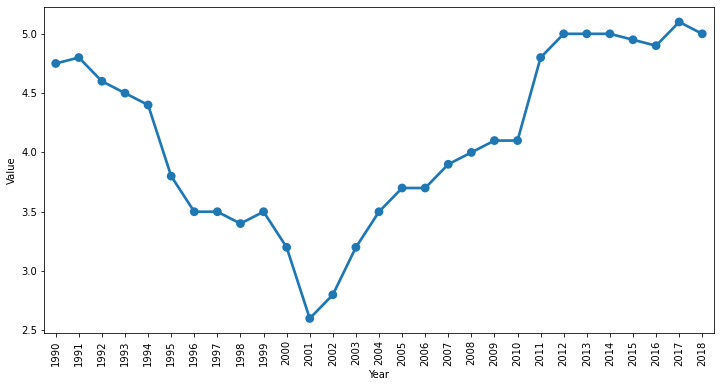

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.DST.FRST.20"])
plt.xticks(rotation = 90)

##### Participación en el ingreso del 10% peor remunerado de la población

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

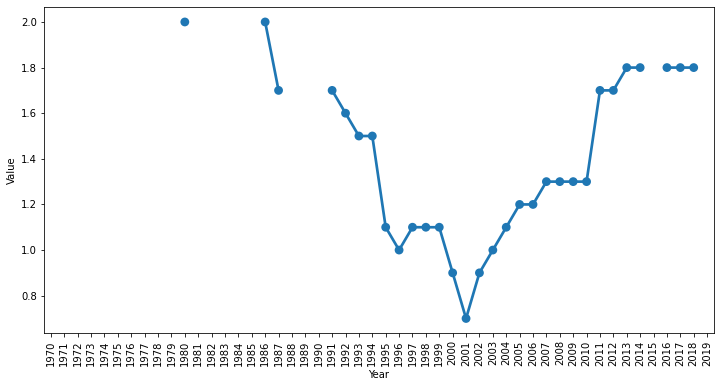

In [ ]:
# Participación en el ingreso del 10% peor remunerado de la población
# SI.DST.FRST.10

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.FRST.10")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.FRST.10")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.DST.FRST.10"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

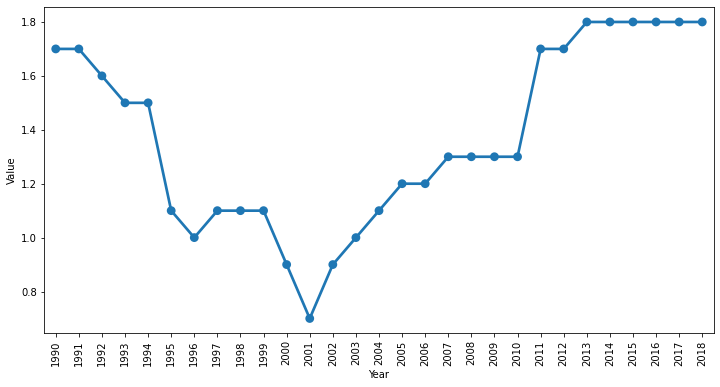

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.DST.FRST.10"])
plt.xticks(rotation = 90)

##### Participación en el ingreso del 10% mejor remunerado de la población

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

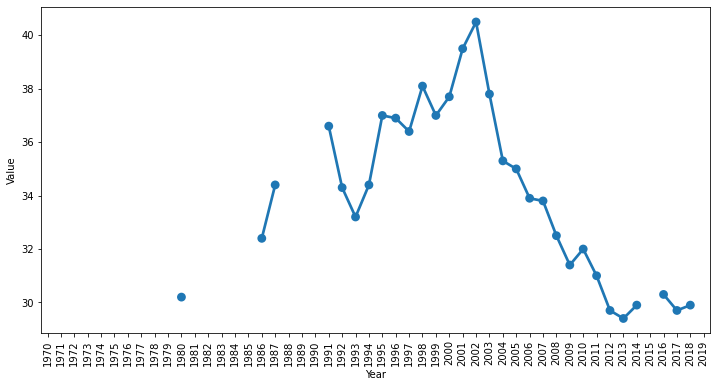

In [ ]:
# Participación en el ingreso del 10% mejor remunerado de la población
# SI.DST.10TH.10

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.10TH.10")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.10TH.10")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.DST.10TH.10"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

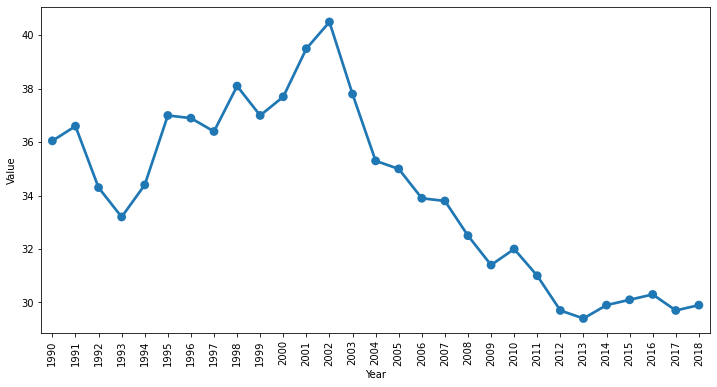

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.DST.10TH.10"])
plt.xticks(rotation = 90)

##### Participación en el ingreso del 20% mejor remunerado de la población

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

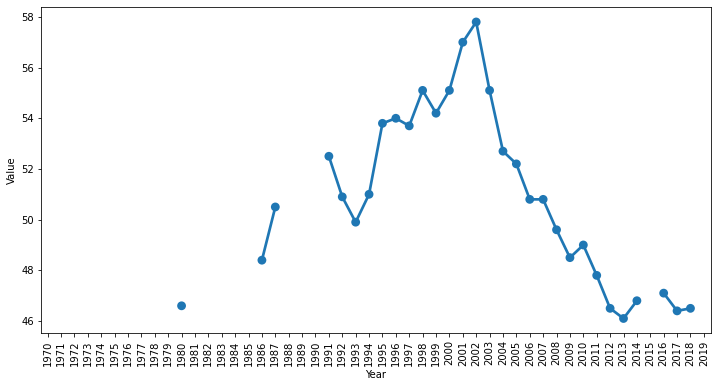

In [ ]:
# Participación en el ingreso del 20% mejor remunerado de la población
# SI.DST.05TH.20

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.05TH.20")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.05TH.20")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.DST.05TH.20"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

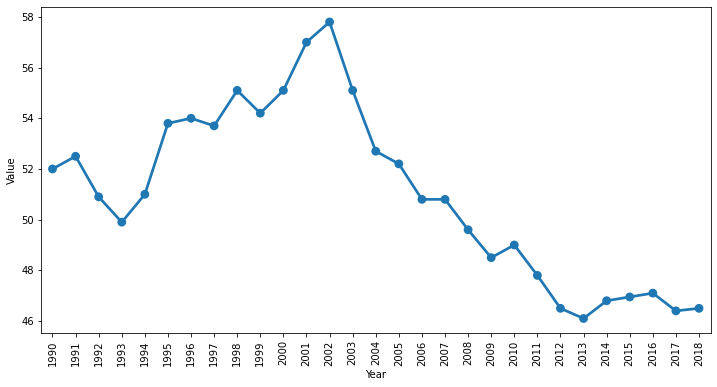

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.DST.05TH.20"])
plt.xticks(rotation = 90)

##### Participación en el ingreso del cuarto quintilo (20%) de la población en orden decreciente de remuneraciones

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

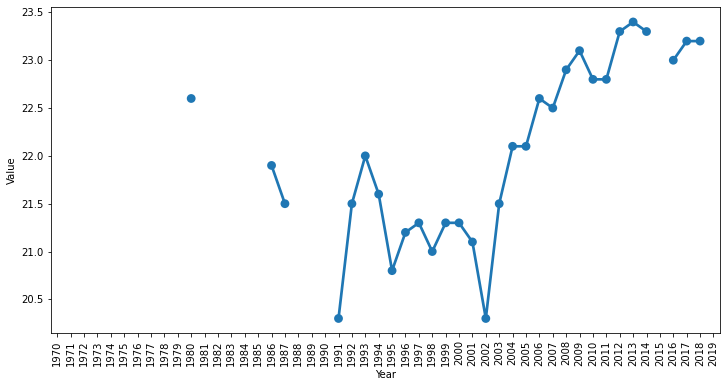

In [ ]:
# Participación en el ingreso del cuarto quintilo (20%) de la población en orden decreciente de remuneraciones
# SI.DST.04TH.20

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.04TH.20")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.04TH.20")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.DST.04TH.20"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

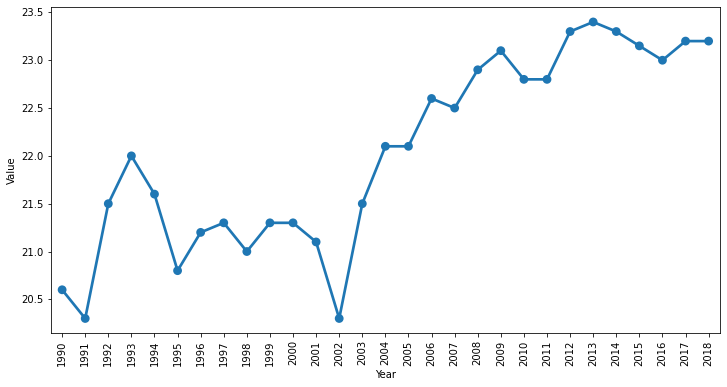

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.DST.04TH.20"])
plt.xticks(rotation = 90)

##### Participación en el ingreso del tercer quintilo (20%) de la población en orden decreciente de remuneraciones

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

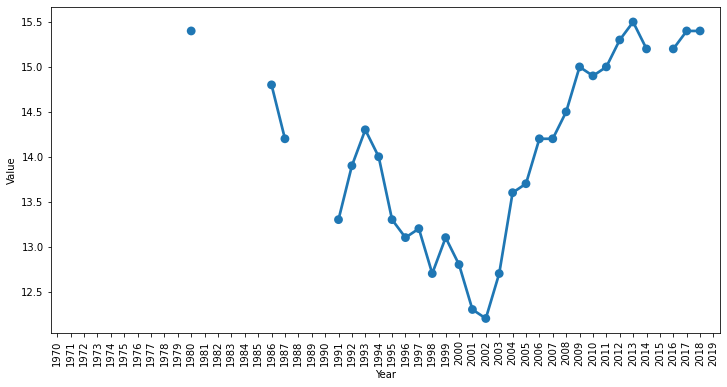

In [ ]:
# Participación en el ingreso del tercer quintilo (20%) de la población en orden decreciente de remuneraciones
# SI.DST.03RD.20

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.03RD.20")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.03RD.20")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.DST.03RD.20"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

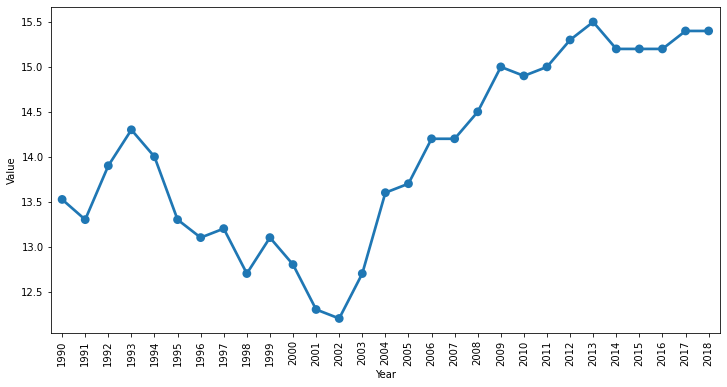

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.DST.03RD.20"])
plt.xticks(rotation = 90)

##### Participación en el ingreso del segundo quintilo (20%) de la población en orden decreciente de remuneraciones

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

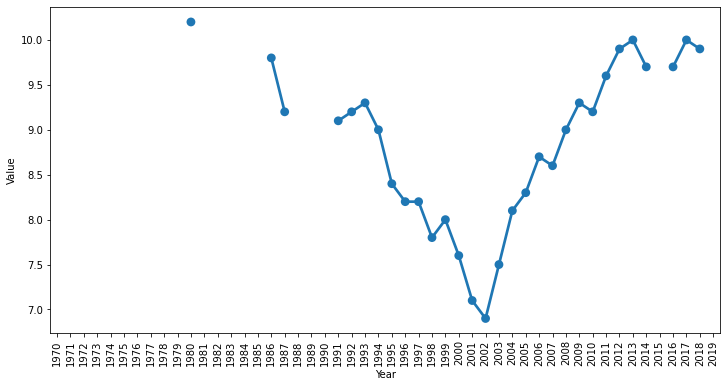

In [ ]:
# Participación en el ingreso del segundo quintilo (20%) de la población en orden decreciente de remuneraciones
# SI.DST.02ND.20

plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", data = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.02ND.20")])
plt.xticks(rotation = 90)

Faltan valores solo en 1990 y 2015. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
# Imputamos valores nulos
tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == "SI.DST.02ND.20")].interpolate()
tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
data_ARG_imp[data_ARG_imp.ICod == "SI.DST.02ND.20"] = tmp_df

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

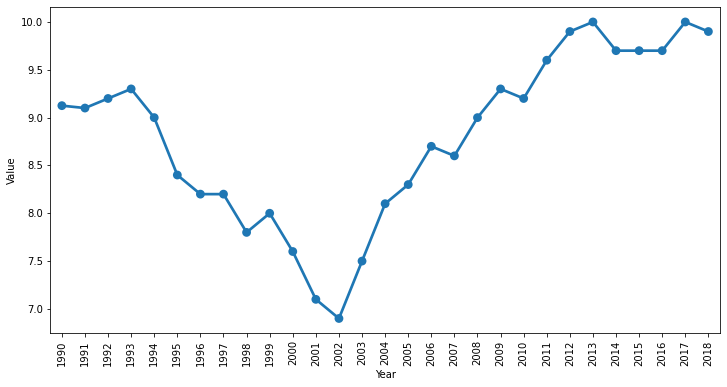

In [ ]:
# Graficamos nuevamente el Feature con los nuevos valores
plt.figure(figsize = (12, 6))
sns.pointplot(x = "Year", y = "Value", 
              data = data_ARG_imp[data_ARG_imp.ICod == "SI.DST.02ND.20"])
plt.xticks(rotation = 90)

In [ ]:
#Chequeo nuevamente el dataset data_ARG_imp por valores nulos
i=1
for ft in data_ARG_imp[data_ARG_imp.Indi == "Poverty"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG_imp[data_ARG_imp.Feat == ft].Value.isna().any(), data_ARG_imp[data_ARG_imp.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: False ['SI.POV.UMIC.GP'] Poverty gap at $5.50 a day (2011 PPP) (%)
2 ¿posee valores NA?: False ['SI.POV.UMIC'] Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)
3 ¿posee valores NA?: False ['SI.POV.LMIC.GP'] Poverty gap at $3.20 a day (2011 PPP) (%)
4 ¿posee valores NA?: False ['SI.POV.LMIC'] Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)
5 ¿posee valores NA?: False ['SI.POV.GINI'] Índice de Gini
6 ¿posee valores NA?: False ['SI.POV.GAPS'] Brecha de pobreza a $1,90 por día (2011 PPA) (%)
7 ¿posee valores NA?: False ['SI.POV.DDAY'] Tasa de incidencia de la pobreza, sobre la base de $1,90 por día (2011 PPA) (% de la población)
8 ¿posee valores NA?: False ['SI.DST.FRST.20'] Participación en el ingreso del 20% peor remunerado de la población
9 ¿posee valores NA?: False ['SI.DST.FRST.10'] Participación en el ingreso del 10% peor remunerado de la población
10 ¿posee valores NA?: False ['SI.DST.10TH.10'] Participación en el ingreso 

#### Ambiente

In [ ]:
#Chequeo el dataset data_ARG_imp por valores nulos
i=1
for ft in data_ARG_imp[data_ARG.Indi == "Environment"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG[data_ARG.Feat == ft].Value.isna().any(), data_ARG[data_ARG.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: True ['NY.GDP.TOTL.RT.ZS'] Rentas totales de los recursos naturales (% del PIB)
2 ¿posee valores NA?: True ['NY.GDP.PETR.RT.ZS'] Rentas del petróleo (% del PIB)
3 ¿posee valores NA?: True ['NY.GDP.NGAS.RT.ZS'] Renta del gas natural (% del PIB)
4 ¿posee valores NA?: True ['NY.GDP.MINR.RT.ZS'] Rentas mineras  (% del PIB)
5 ¿posee valores NA?: True ['NY.GDP.FRST.RT.ZS'] Rentas forestales (% del PIB)
6 ¿posee valores NA?: True ['NY.ADJ.DNGY.CD'] Ahorro ajustado: agotamiento de fuentes de energía (US$ actuales)
7 ¿posee valores NA?: True ['NY.ADJ.DMIN.CD'] Ahorro ajustado: agotamiento de minerales (US$ actuales)
8 ¿posee valores NA?: True ['NY.ADJ.DKAP.CD'] Ahorro ajustado: consumo de capital fijo (US$ actuales)
9 ¿posee valores NA?: True ['NY.ADJ.DFOR.CD'] Ahorro ajustado: agotamiento neto de recursos forestales (US$ a precios actuales)
10 ¿posee valores NA?: True ['NY.ADJ.DCO2.CD'] Ahorro ajustado: daño por emisión de dióxido de carbono (US$ actuales)
11 ¿posee valor

En caso del indicador Ambiente a las 15 features solo les faltan valores en los últimos 3 años como máximo. Los rellenaremos con la función interpolate, mediante una regresión lineal.

In [ ]:
pd.set_option('display.max_columns', None, "display.max_rows", 10)

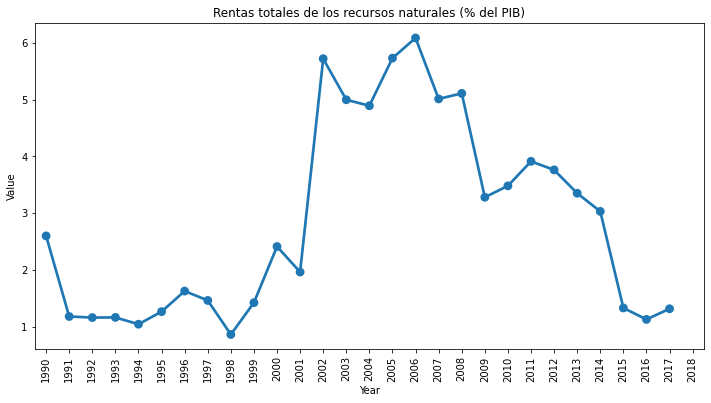

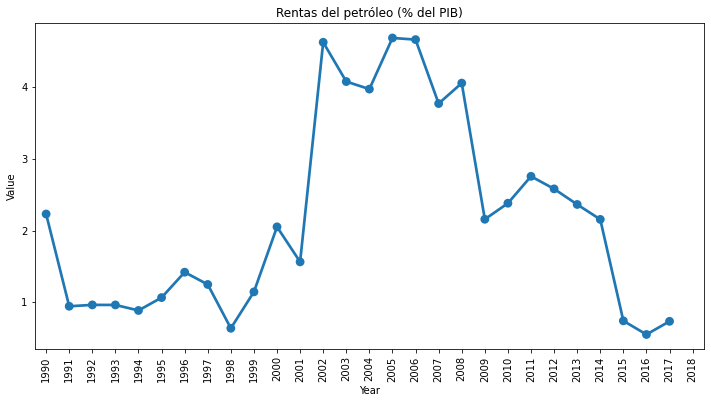

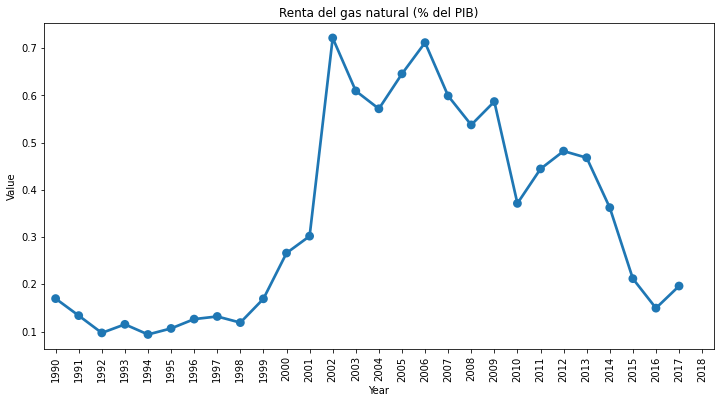

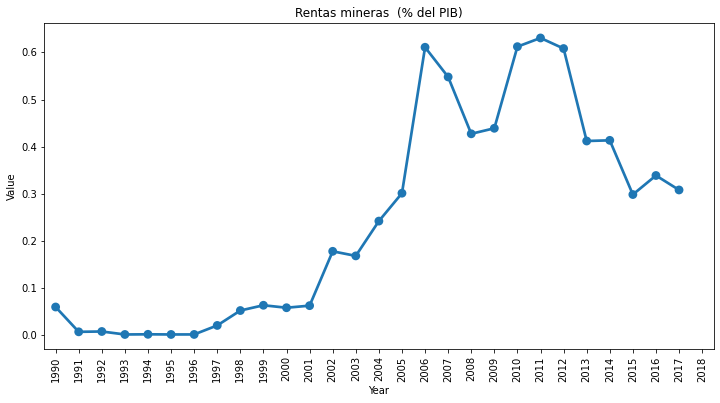

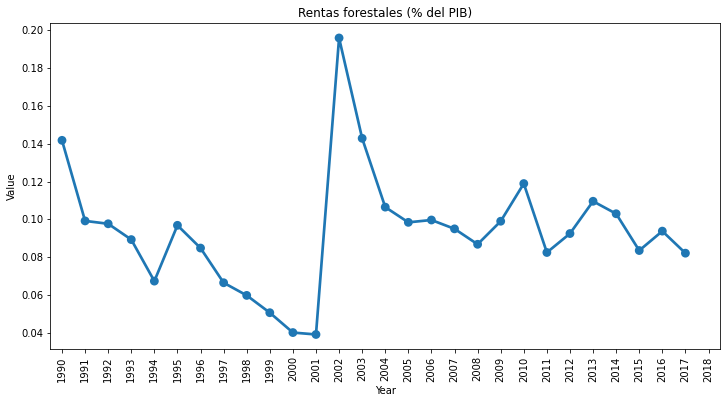

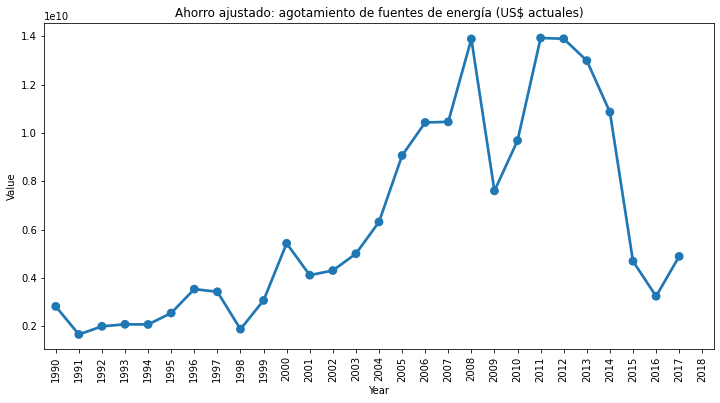

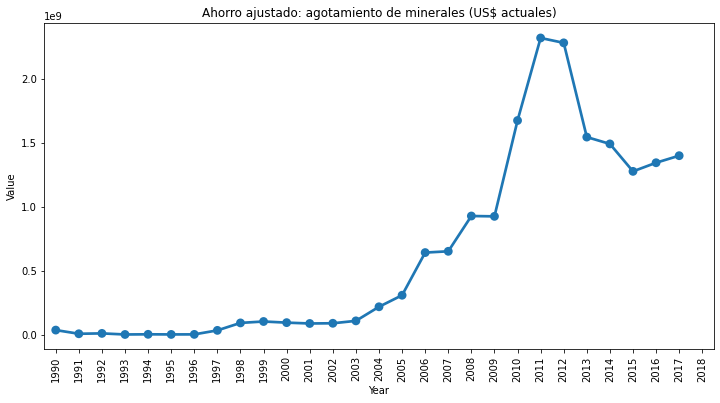

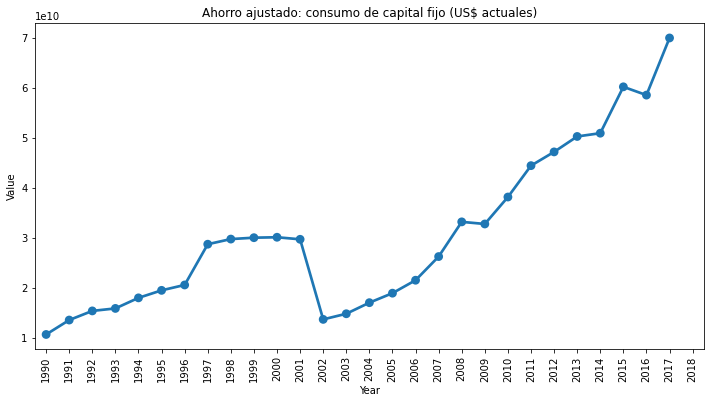

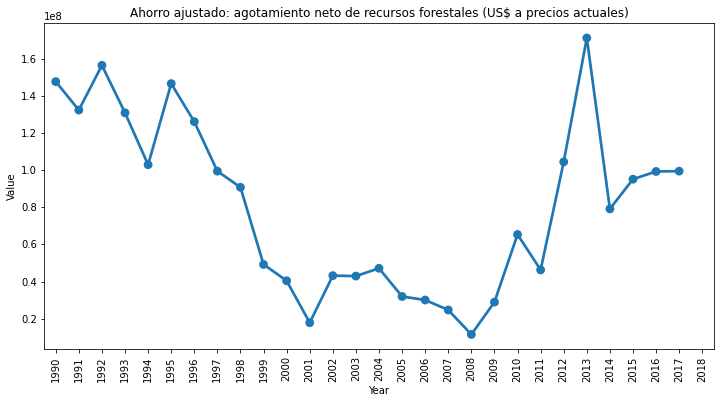

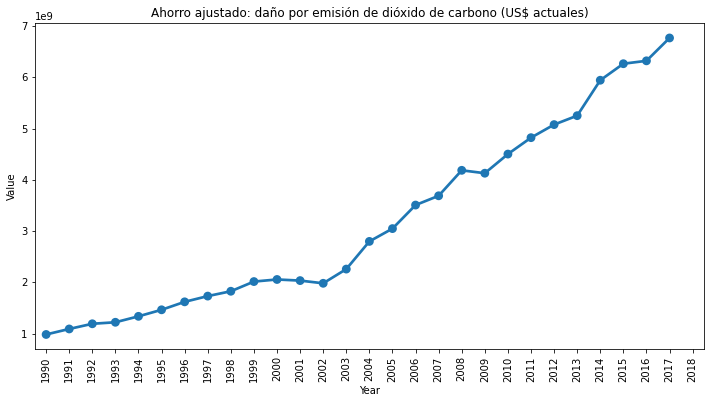

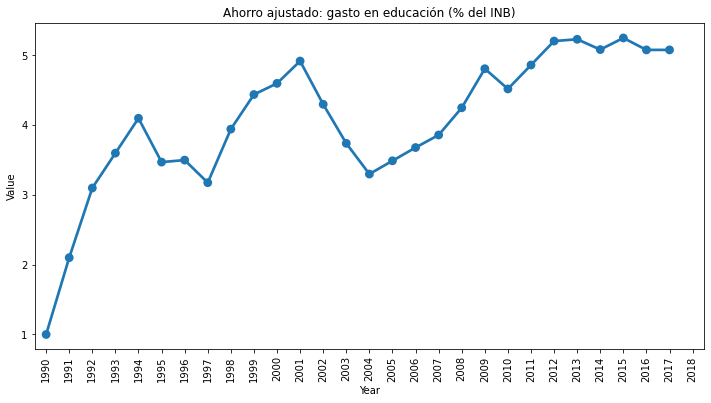

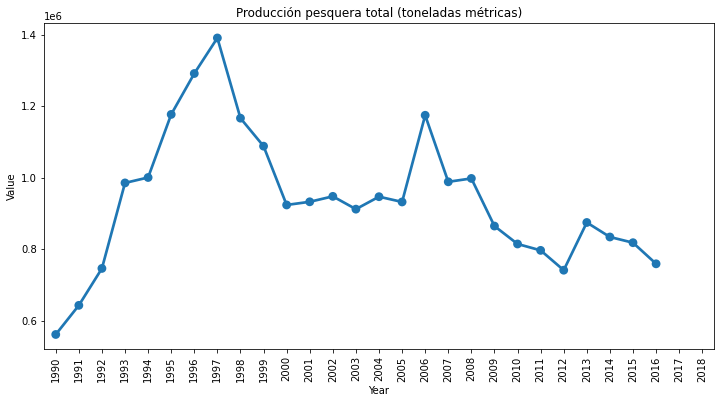

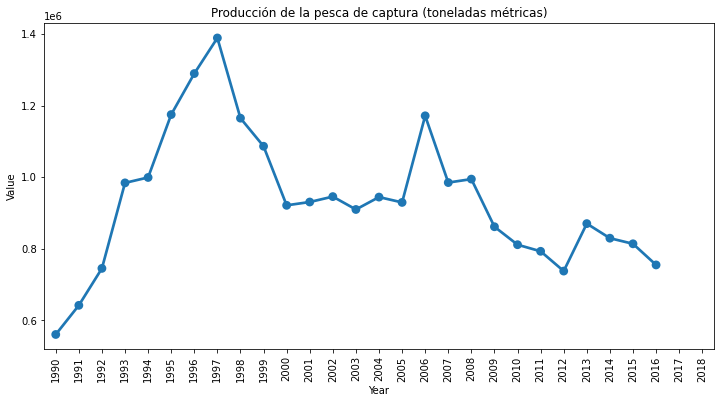

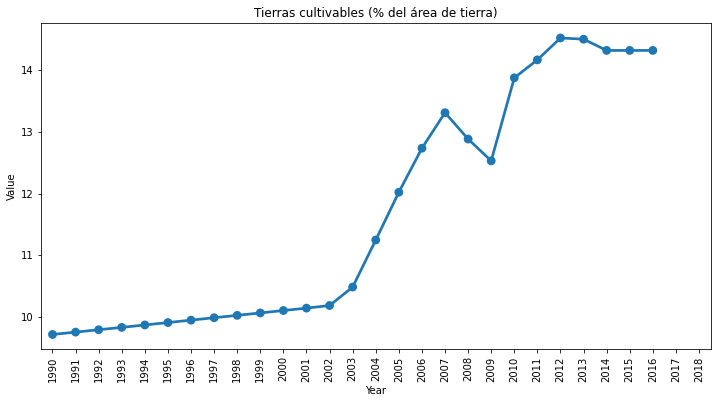

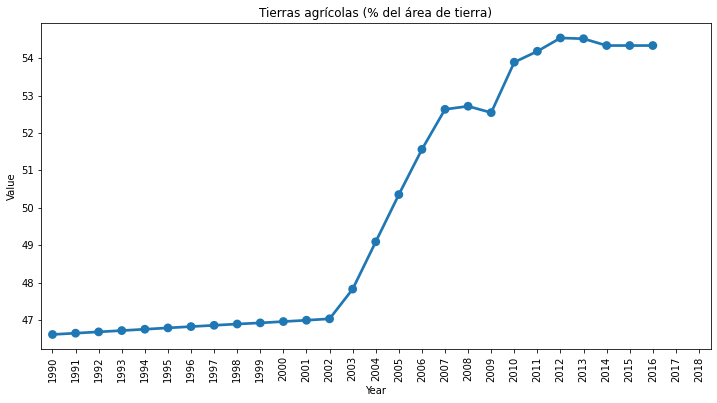

In [ ]:
for ii in dataset[dataset.Indi == 'Environment'].ICod.unique():
    ii_desc = dataset[dataset.ICod == ii].Feat.unique()[0]
    plt.figure(figsize = (12, 6))
    plt.title(ii_desc)
    sns.pointplot(x = "Year", y = "Value", data = data_ARG[(data_ARG.CCod == "ARG") & (data_ARG.ICod == ii)])
    plt.xticks(rotation = 90)
    plt.show()

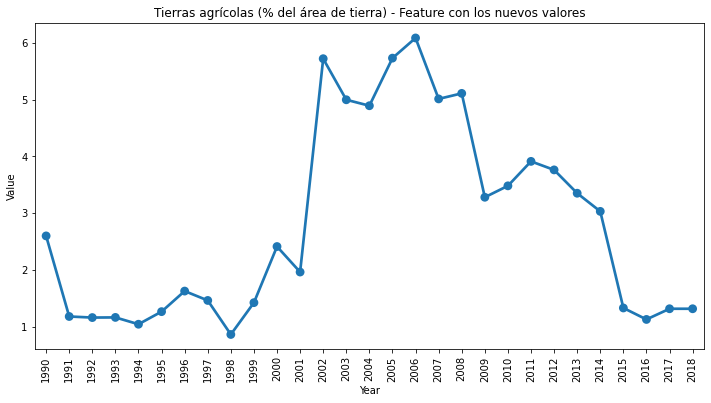

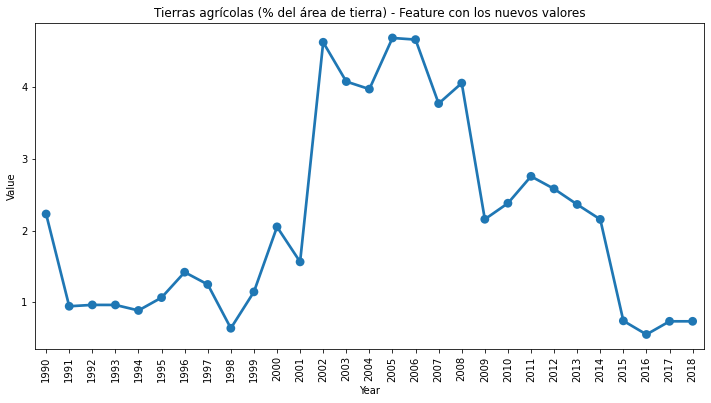

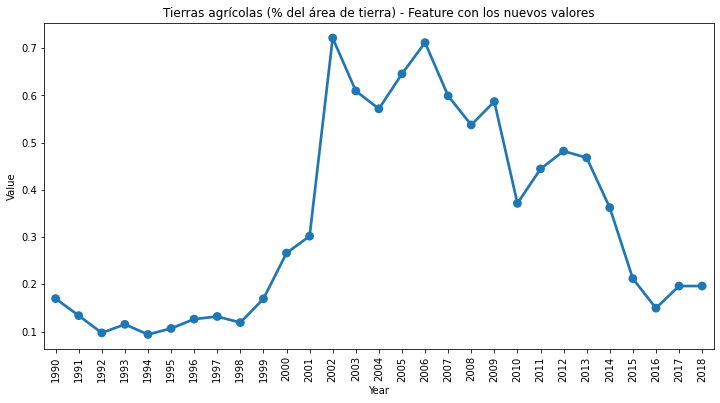

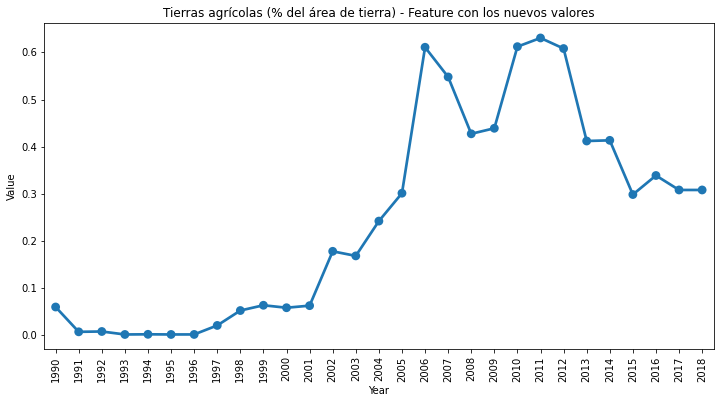

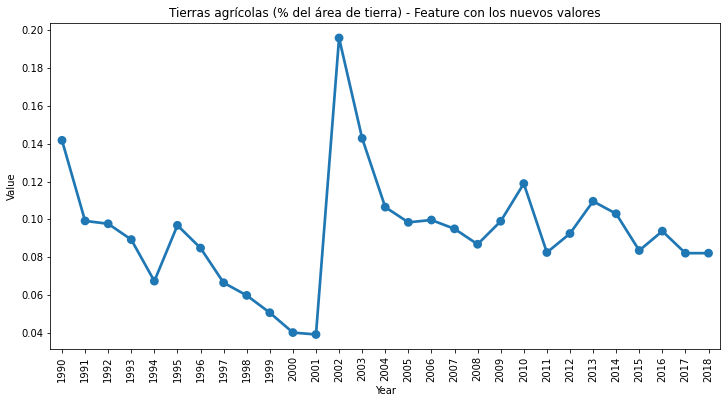

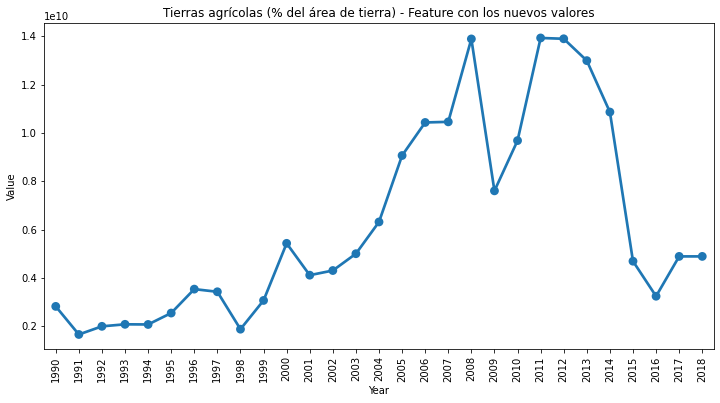

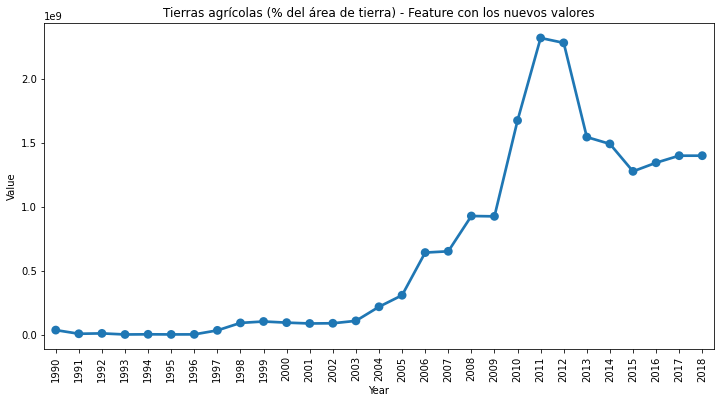

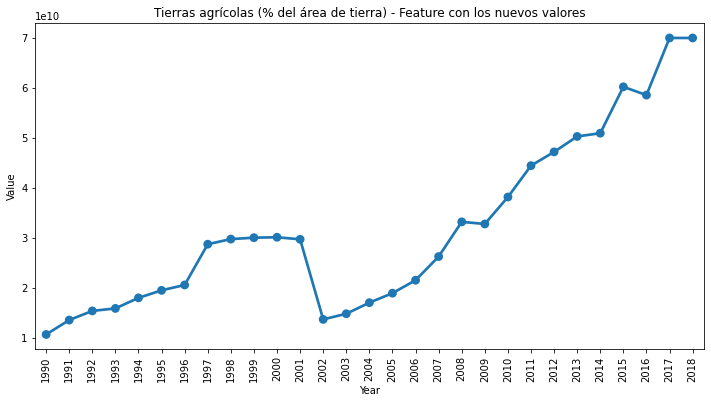

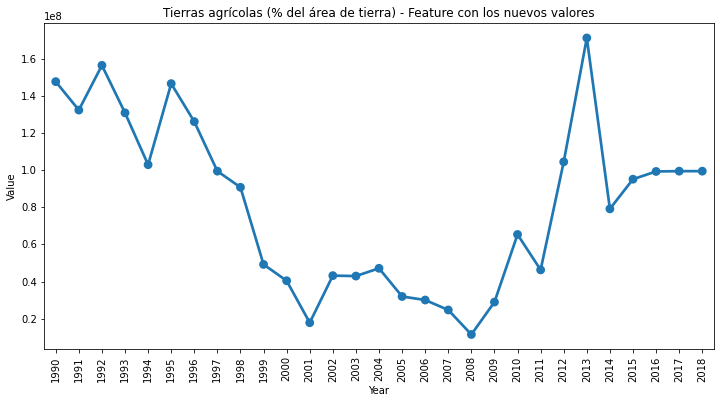

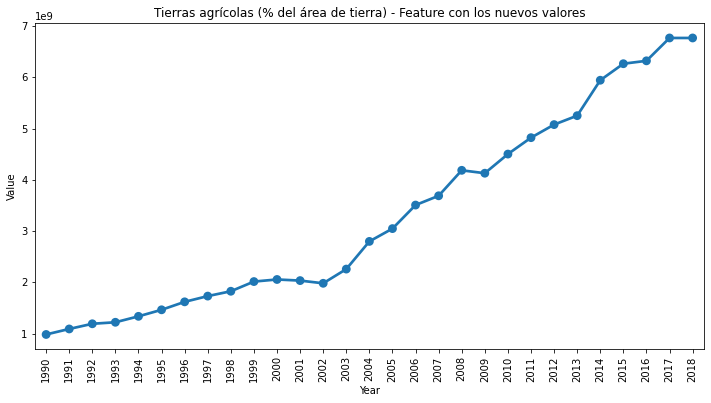

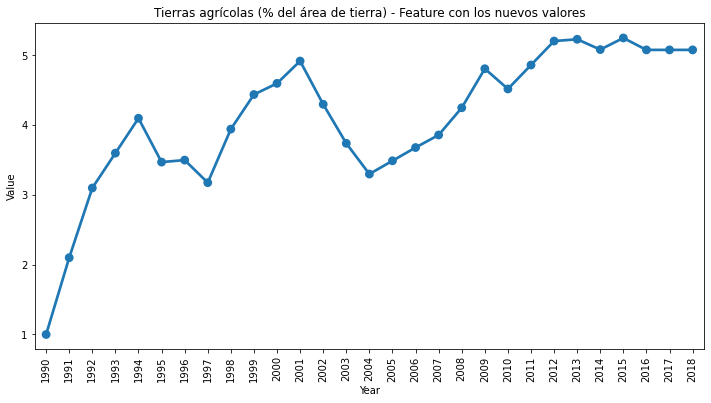

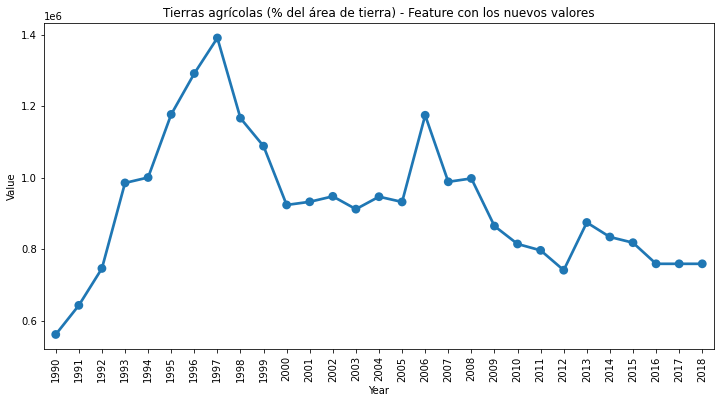

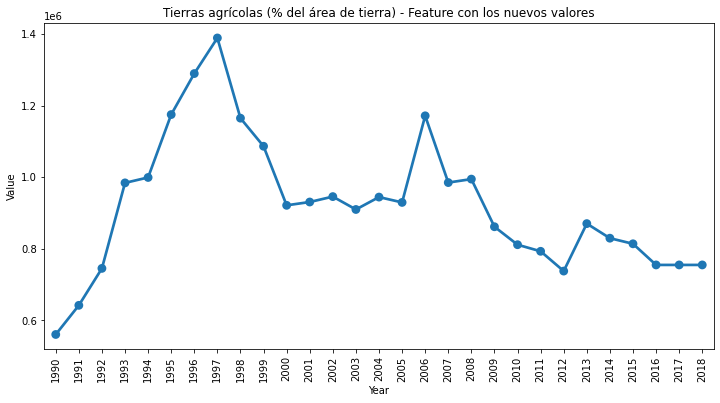

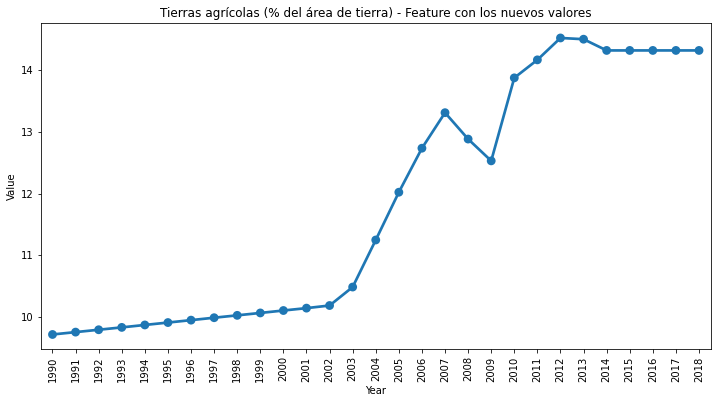

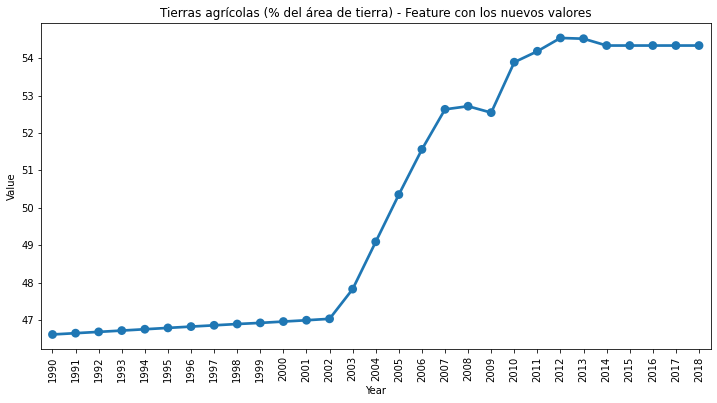

In [ ]:
for ii in dataset[dataset.Indi == 'Environment'].ICod.unique():
  # Imputamos valores nulos
    tmp_df = dataset[(dataset.CCod == "ARG") & (dataset.ICod == ii)].interpolate()
    tmp_df = tmp_df[(tmp_df.Year > 1989) & (tmp_df.Year < 2019)]
    data_ARG_imp[data_ARG_imp.ICod == ii] = tmp_df   
  # Graficamos nuevamente el Feature con los nuevos valores
    plt.figure(figsize = (12, 6))
    plt.title(ii_desc + ' - Feature con los nuevos valores')
    sns.pointplot(x = "Year", y = "Value", data = data_ARG_imp[data_ARG_imp.ICod == ii])
    plt.xticks(rotation = 90)

In [ ]:
#Chequeo el dataset data_ARG_imp por valores nulos
i=1
for ft in data_ARG_imp[data_ARG_imp.Indi == "Environment"].Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG_imp[data_ARG_imp.Feat == ft].Value.isna().any(), data_ARG_imp[data_ARG_imp.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: False ['NY.GDP.TOTL.RT.ZS'] Rentas totales de los recursos naturales (% del PIB)
2 ¿posee valores NA?: False ['NY.GDP.PETR.RT.ZS'] Rentas del petróleo (% del PIB)
3 ¿posee valores NA?: False ['NY.GDP.NGAS.RT.ZS'] Renta del gas natural (% del PIB)
4 ¿posee valores NA?: False ['NY.GDP.MINR.RT.ZS'] Rentas mineras  (% del PIB)
5 ¿posee valores NA?: False ['NY.GDP.FRST.RT.ZS'] Rentas forestales (% del PIB)
6 ¿posee valores NA?: False ['NY.ADJ.DNGY.CD'] Ahorro ajustado: agotamiento de fuentes de energía (US$ actuales)
7 ¿posee valores NA?: False ['NY.ADJ.DMIN.CD'] Ahorro ajustado: agotamiento de minerales (US$ actuales)
8 ¿posee valores NA?: False ['NY.ADJ.DKAP.CD'] Ahorro ajustado: consumo de capital fijo (US$ actuales)
9 ¿posee valores NA?: False ['NY.ADJ.DFOR.CD'] Ahorro ajustado: agotamiento neto de recursos forestales (US$ a precios actuales)
10 ¿posee valores NA?: False ['NY.ADJ.DCO2.CD'] Ahorro ajustado: daño por emisión de dióxido de carbono (US$ actuales)
11 ¿p

#### Chequeo final y exportación del dataset

In [ ]:
#Chequeo el dataset data_ARG_imp por valores nulos
i=1
for ft in data_ARG_imp.Feat.unique():
 print(i,"¿posee valores NA?:", data_ARG_imp[data_ARG_imp.Feat == ft].Value.isna().any(), data_ARG_imp[data_ARG_imp.Feat == ft].ICod.unique(),ft)
 i=i+1

1 ¿posee valores NA?: False ['SP.POP.1564.TO.ZS'] Población entre 15 y 64 años de edad (% del total)
2 ¿posee valores NA?: False ['SP.POP.0014.TO.ZS'] Población entre 0 y 14 años de edad (% del total)
3 ¿posee valores NA?: False ['SL.UEM.TOTL.MA.ZS'] Desempleo, varones (% de la población activa masculina) (estimación modelado OIT)
4 ¿posee valores NA?: False ['SL.UEM.TOTL.FE.ZS'] Desempleo, mujeres (% de la población activa femenina) (estimación modelado OIT)
5 ¿posee valores NA?: False ['SL.TLF.TOTL.IN'] Población activa, total
6 ¿posee valores NA?: False ['SE.SEC.ENRL.GC'] Educación de nivel secundario, alumnos en programas de educación general
7 ¿posee valores NA?: False ['SE.SEC.ENRL'] Educación de nivel secundario, alumnos
8 ¿posee valores NA?: False ['SE.PRM.ENRR.MA'] Inscripción escolar, nivel primario, varones (% bruto)
9 ¿posee valores NA?: False ['SE.PRM.ENRR.FE'] Inscripción escolar, nivel primario, mujeres (% bruto)
10 ¿posee valores NA?: False ['SE.PRM.ENRR'] Inscripción e

Se observa que no hay valores nulos en el nuevo dataset, por lo que la tarea está finalizada. Finalmente, exportamos el dataset en cuestión a formato .csv:

In [ ]:
data_ARG_imp

Feat               Indi  \
21360  Población entre 15 y 64 años de edad (% del to...          Education   
21361  Población entre 0 y 14 años de edad (% del total)          Education   
21362  Desempleo, varones (% de la población activa m...          Education   
21363  Desempleo, mujeres (% de la población activa f...          Education   
21364                            Población activa, total          Education   
...                                                  ...                ...   
52162  Tasa de participación en la fuerza laboral, ho...  Social_protection   
52163  Tasa de participación en la fuerza laboral, mu...  Social_protection   
52164  Tasa de participación en la fuerza laboral de ...  Social_protection   
52165  Tasa de participación en la fuerza laboral, ho...  Social_protection   
52166  Tasa de participación en la fuerza laboral, mu...  Social_protection   

            Pais CCod                    ICod  Year         Value  
21360  Argentina  ARG       SP.POP.1564.TO.ZS  1990  6.029160e+01  
21361  Argentina  ARG       SP.POP.0014.TO.ZS  1990  3.078601e+01  
21362  Argentina  ARG       SL.UEM.TOTL.MA.ZS  1990  5.236000e+00  
21363  Argentina  ARG       SL.UEM.TOTL.FE.ZS  1990  5.747000e+00  
21364  Argentina  ARG          SL.TLF.TOTL.IN  1990  1.358077e+07  
...          ...  ...                     ...   ...           ...  
52162  Argentina  ARG       SL.TLF.ACTI.MA.ZS  2018  7.969600e+01  
52163  Argentina  ARG       SL.TLF.ACTI.FE.ZS  2018  5.901900e+01  
52164  Argentina  ARG     SL.TLF.ACTI.1524.ZS  2018  3.893800e+01  
52165  Argentina  ARG  SL.TLF.ACTI.1524.MA.ZS  2018  4.584200e+01  
52166  Argentina  ARG  SL.TLF.ACTI.1524.FE.ZS  2018  3.182500e+01  

[2581 rows x 7 columns]

In [ ]:
data_ARG_imp.to_csv("/content/drive/My Drive/Mentoria/datasets/dataset_ARG_1990_2018.csv", index = False)

In [ ]:
# Wide format
data_ARG_imp_wide = data_ARG_imp.pivot_table(index = ['Feat', 'Indi', 'ICod'], columns = 'Year', values='Value')

In [ ]:
data_ARG_imp_wide.to_csv("/content/drive/My Drive/Mentoria/datasets/dataset_ARG_1990_2018_wide.csv", index = True)

# Conclusiones

En general, el dataset presentóó muchos valores nulos que debieron ser imputados de diferentes maneras. Esto requirió un trabajo muy fino sobre la lectura de cada Feature (su tendencia temporal, en Argentina y en países limítrofes) con el objetivo de imputar dichos valores con valores que tengan sentido. Mayoritariamente, se utilizó la función interpolate(), en donde se aplican regresiones lineales de orden 1 o mayor, dependiendo el caso. En algunos casos particulares, ante la falta de valores durante muchos años seguidos, se utilizaron los valores encontrados para países limítrofes con comportamiento similar para el Feature en cuestión.

Particularmente, llamaron la atención ciertos intervalos de tiempo o años específicos con valores nulos para varios Features. Por ejemplo, los Features de pobreza tenían valores nulos en los años 2014-2015, y en 1990. Esto puede indicar ciertas condiciones político-sociales-económicas que llevaron a no cuantificar dichos Features de manera generalizada.

Finalmente, se obtuvo un dataset curado, sin valores nulos. Este contiene a todos los indicadores y entre 14 y 15 Features por indicador, para los años comprendidos entre 1990 y 2018, para Argentina. El mismo será utilizado para la construcción de modelos de aprendizaje supervisado y no supervisado.